# Data Analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import dataframe_image as dfi
from src.util import plot_confusion_matrix, plot_train_line, load_train_data, load_train_data_error, cm_score, plot_violin

### EX1: Single Effect Classification

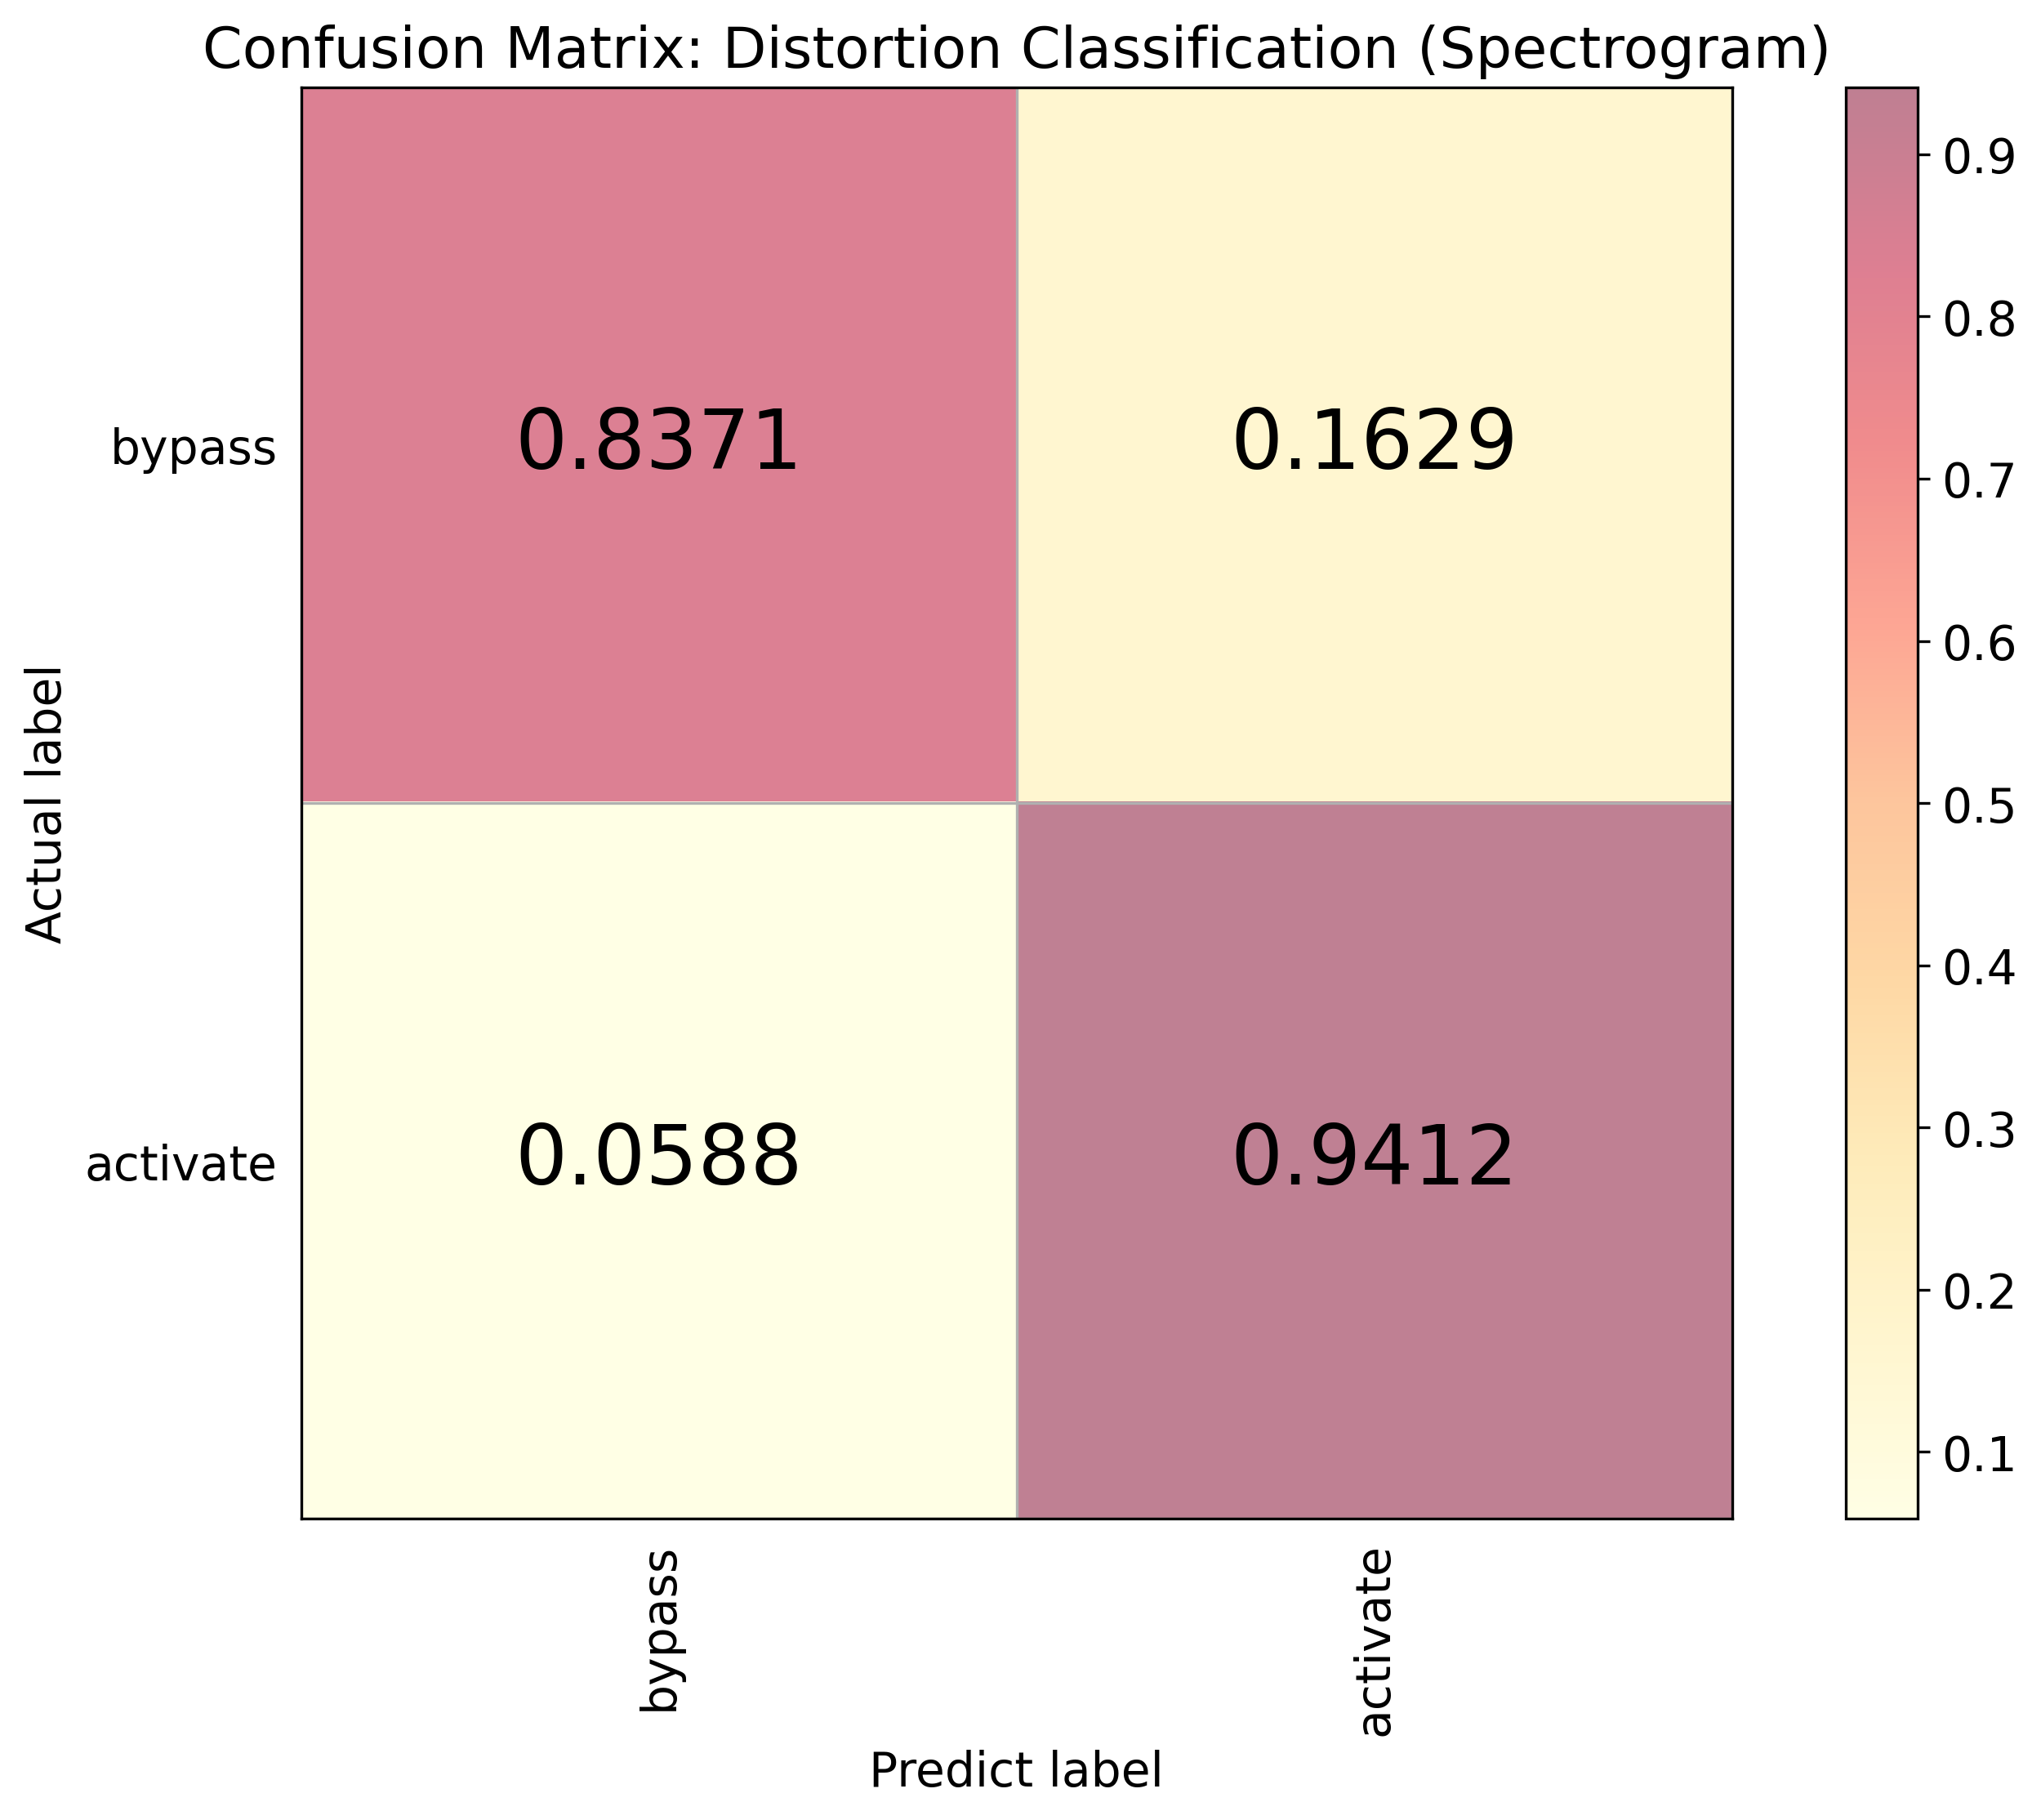

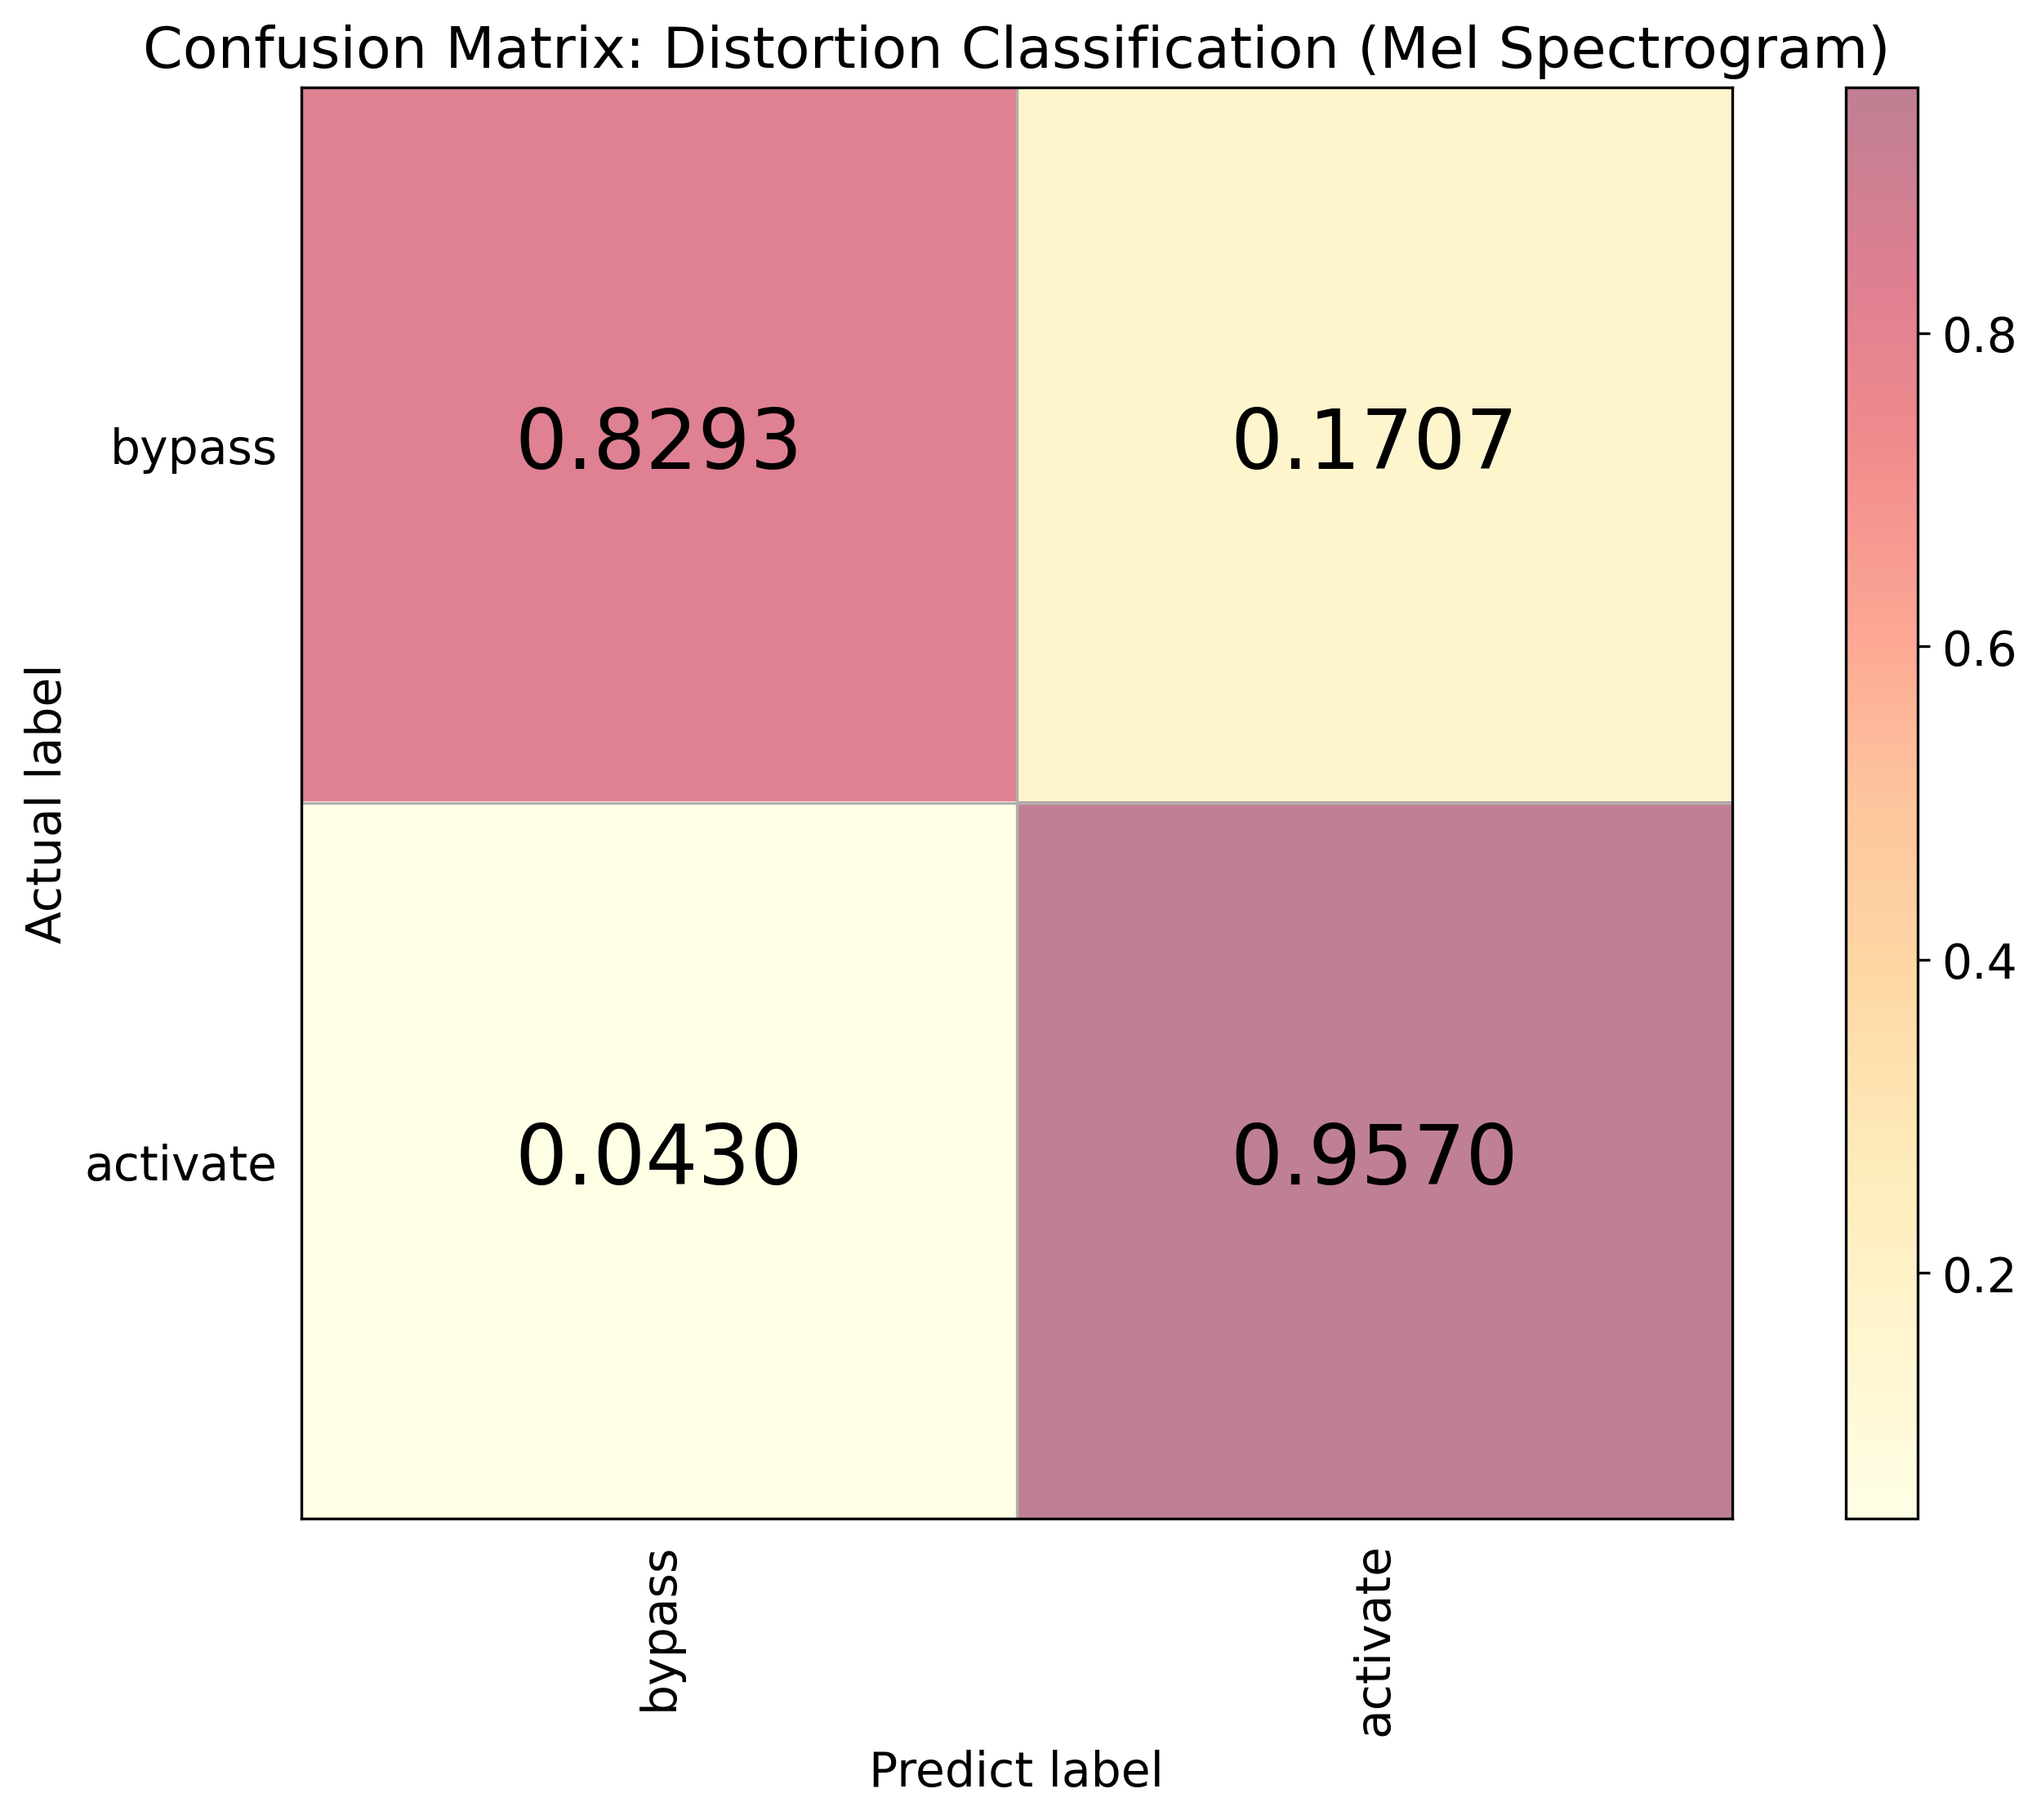

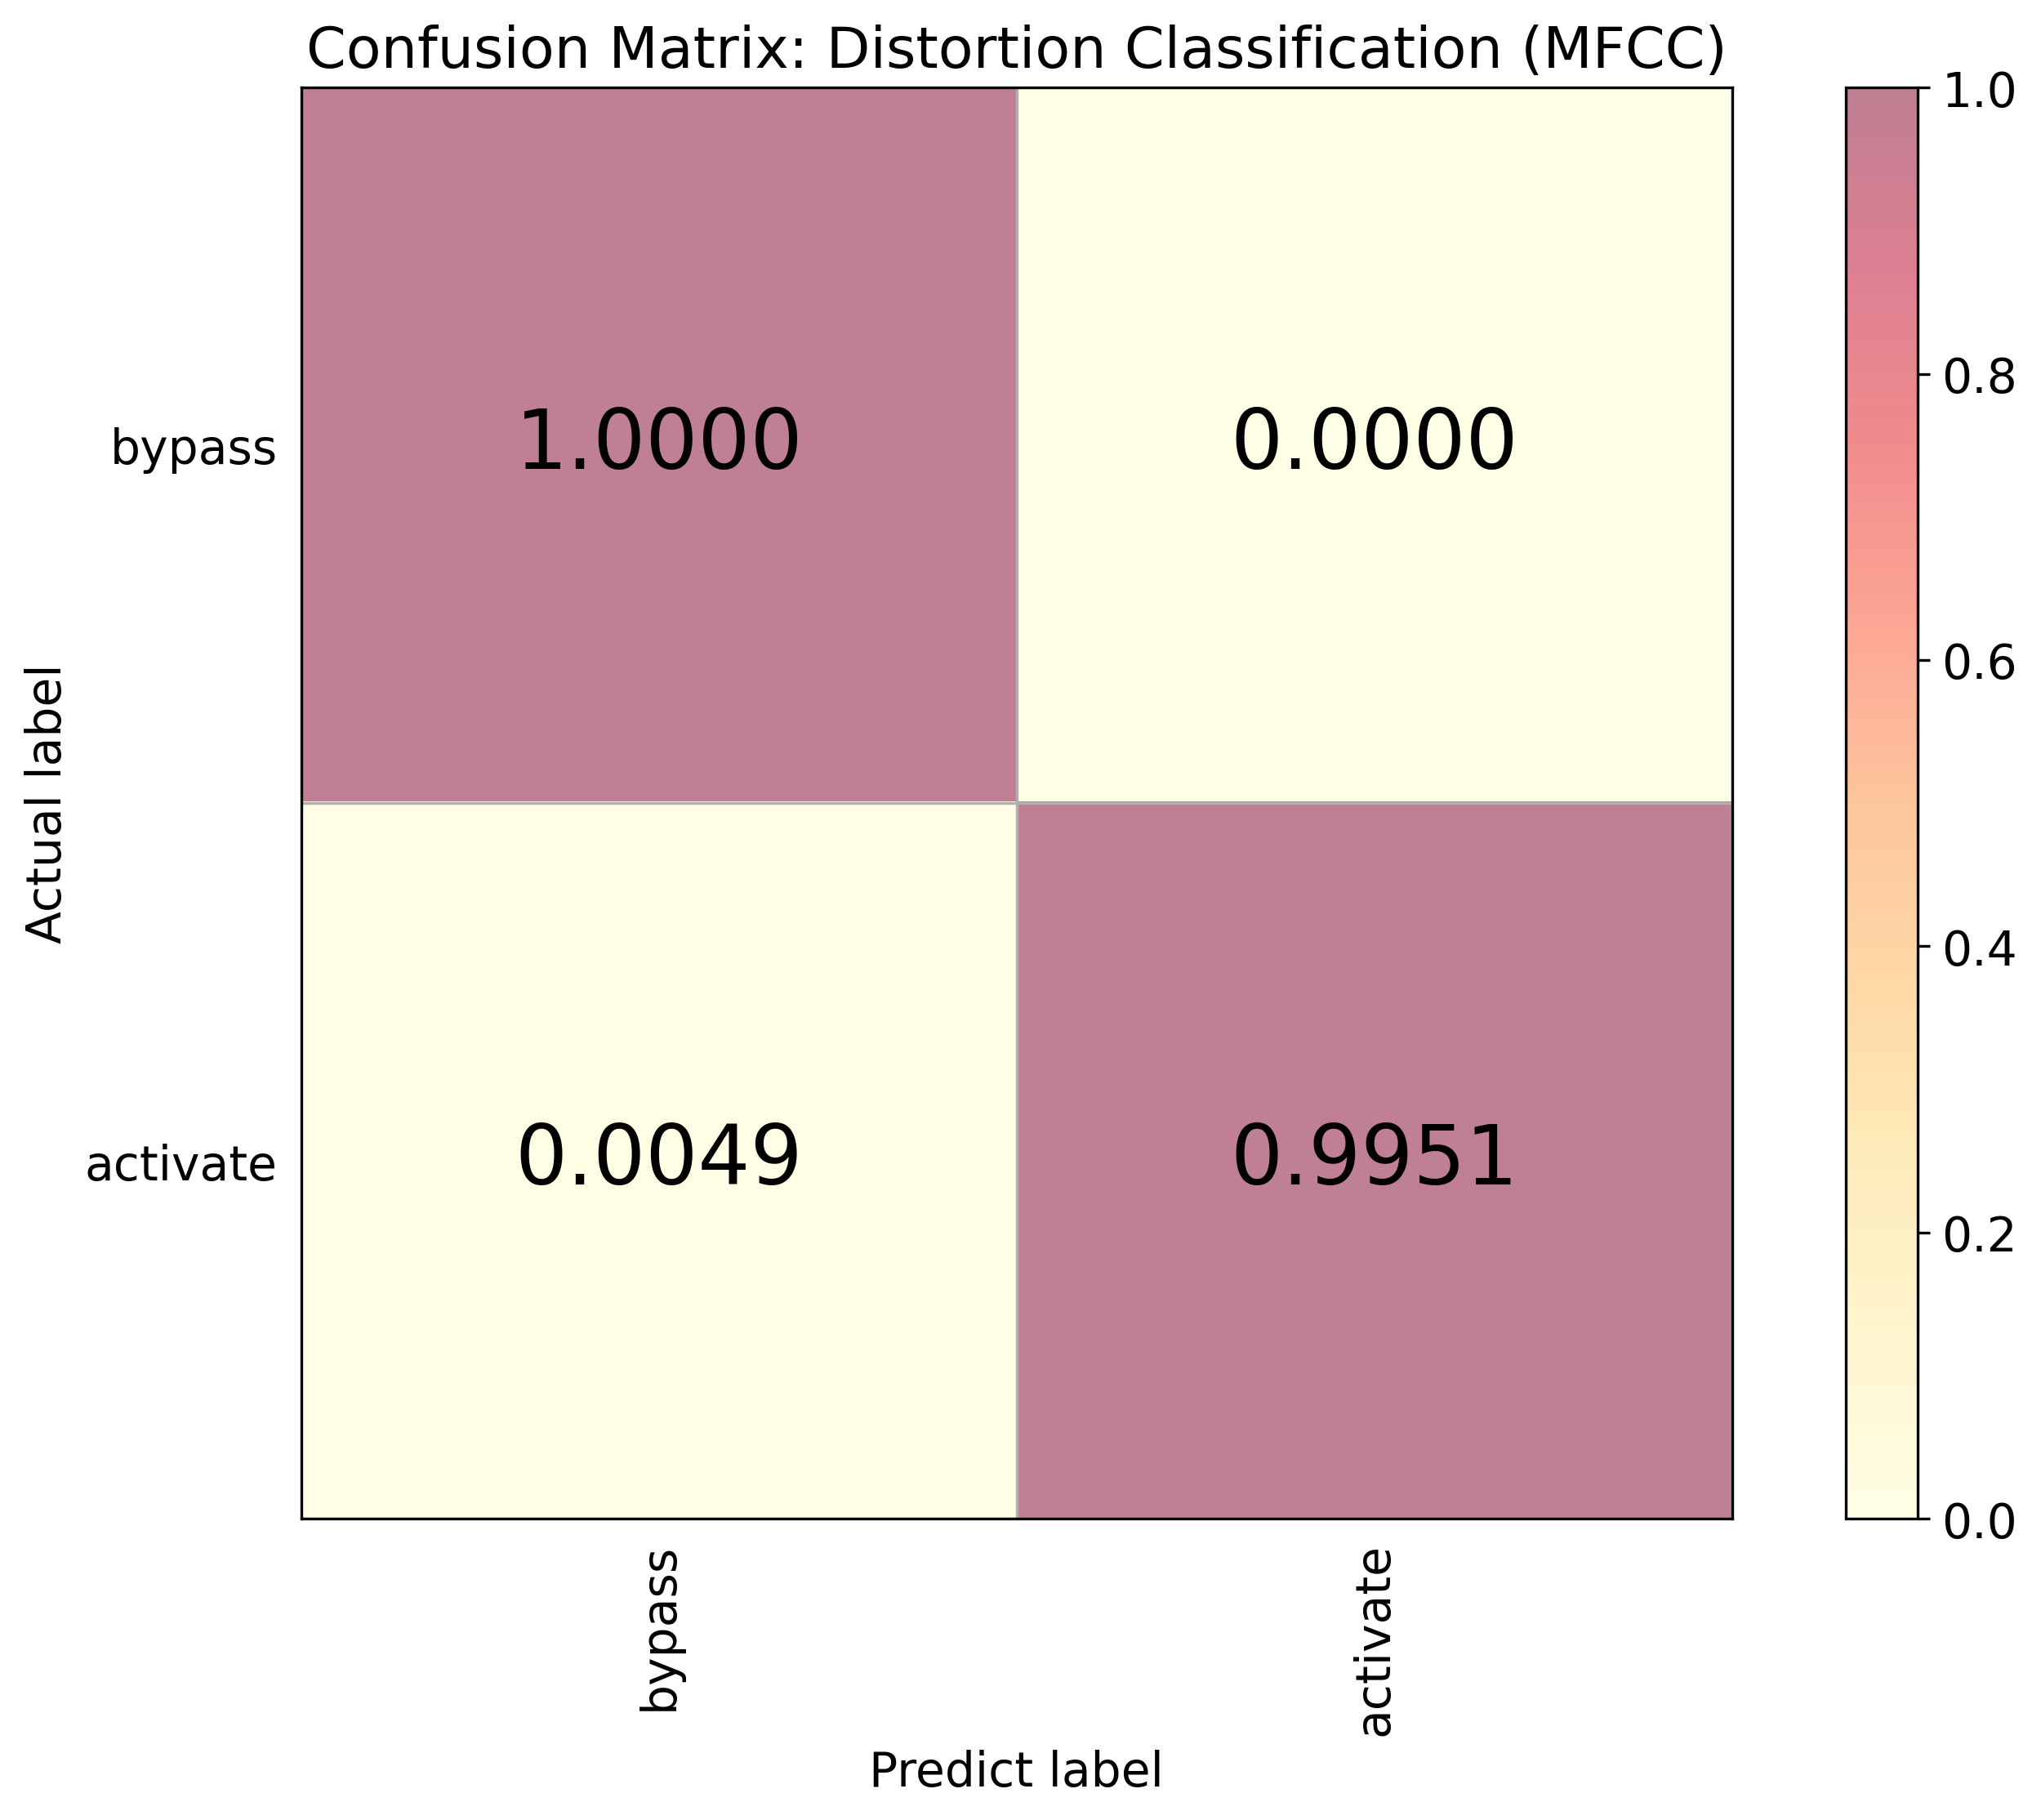

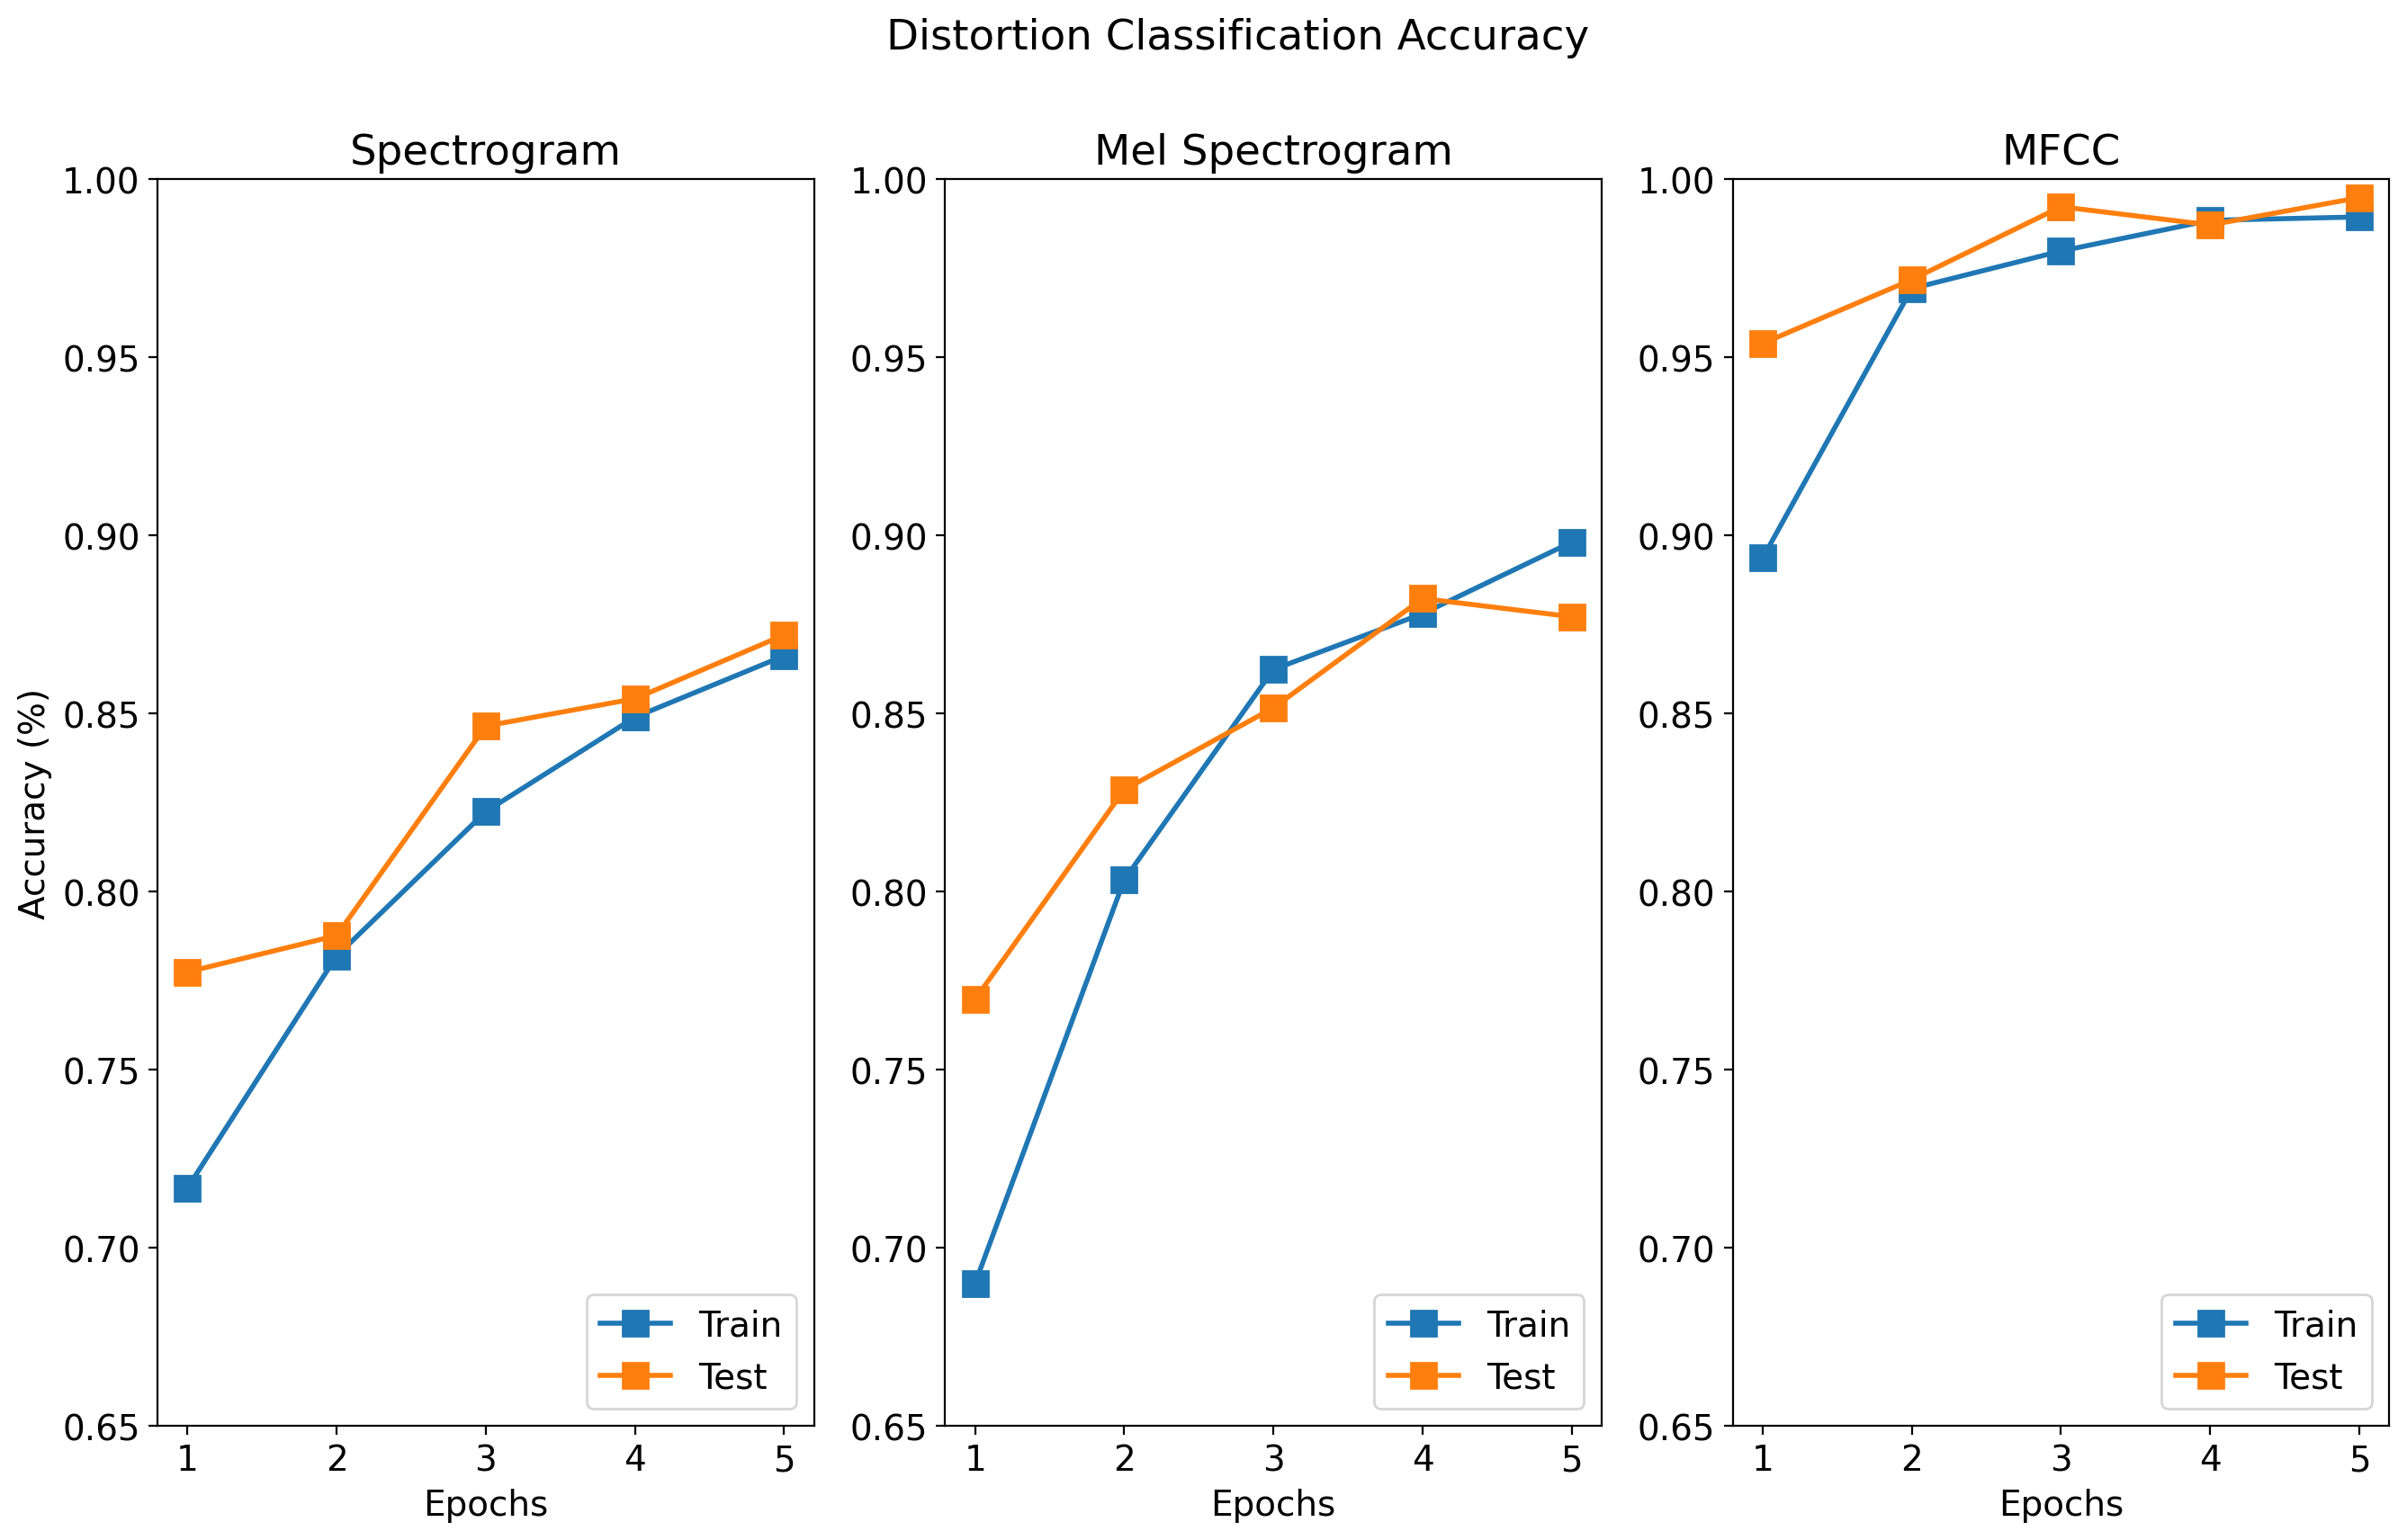

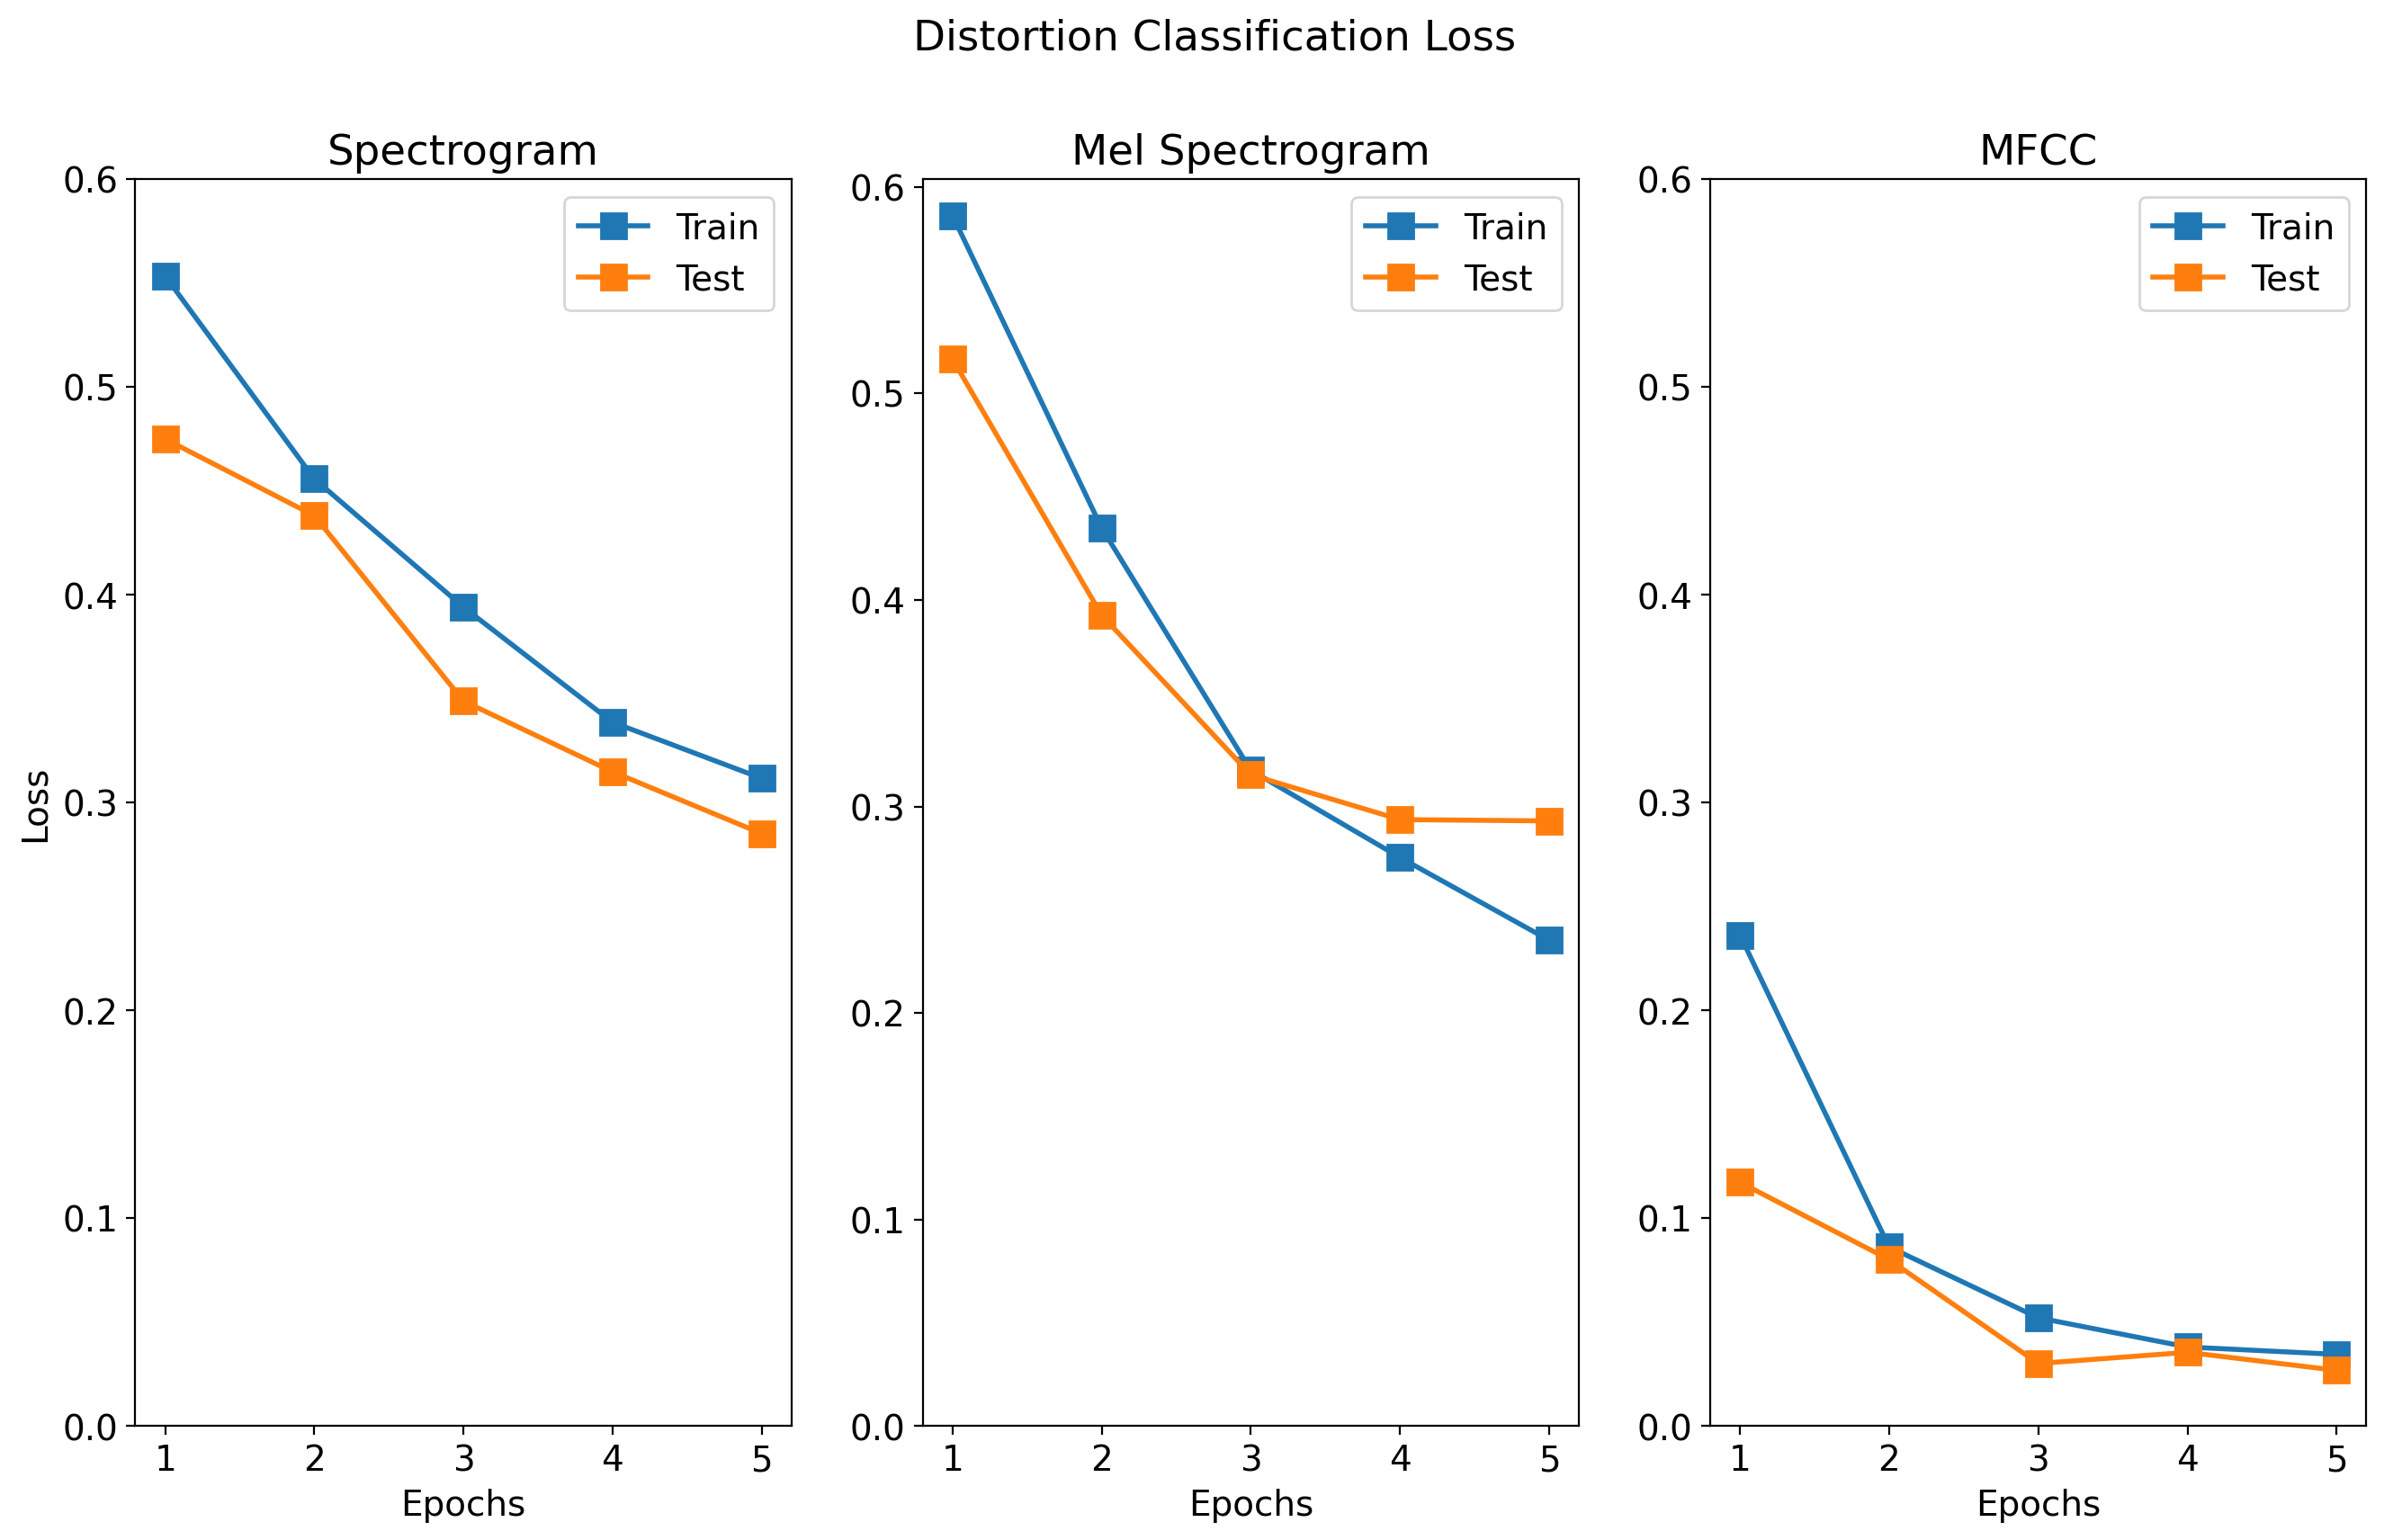

Accuracy  Precision  Recall  F1_score
Spectrogram        0.8824     0.8163  0.9412    0.8743
Mel Spectrogram    0.8900     0.8357  0.9570    0.8922
MFCC               0.9974     1.0000  0.9951    0.9976

In [2]:
TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/c53_classify_od/'

LABELS_ID = ['bypass', 'activate']
NAME_MAP = ['spec', 'mel', 'mfcc']
TRANSFORM_MAP = ['Spectrogram', 'Mel Spectrogram', 'MFCC']
acc_list, loss_list, error_list = [], [], []

for i in range(3):

    acc, loss = load_train_data(TRAIN_DIR + 'c53_classify_od_' + NAME_MAP[i] + '/')
    error = np.load(EVUAL_DIR + 'c53_classify_od_' + NAME_MAP[i] + '_evaluation.npy')

    cm_fig = plot_confusion_matrix(confusion_matrix(y_true=error[0], y_pred=error[1]),
                                        title='Confusion Matrix: Distortion Classification (' + TRANSFORM_MAP[i] + ')',
                                        classes=LABELS_ID)

    cm_fig.savefig(PLOT_DIR + 'single_classify_cm_' + NAME_MAP[i] + '.png')

    acc_list.append(acc)
    loss_list.append(loss)
    error_list.append(cm_score(error))

acc_fig = plot_train_line(data=acc_list,
                num_subplot=3,
                subtitle="Distortion Classification Accuracy",
                title=TRANSFORM_MAP,
                legend_loc='lower right',
                x_label='Epochs',
                y_label='Accuracy (%)',
                x_ticks=np.arange(1, 6, 1), 
                y_ticks=np.arange(0.65, 1.05, 0.05),
                hight=9, 
                width=16)

loss_fig = plot_train_line(data=loss_list,
                num_subplot=3,
                subtitle="Distortion Classification Loss",
                title=TRANSFORM_MAP,
                legend_loc='upper right',
                x_label='Epochs',
                y_label='Loss',
                x_ticks=np.arange(1, 6, 1), 
                y_ticks=np.arange(0, 0.7, 0.1),
                hight=9, 
                width=16)

acc_fig.savefig(PLOT_DIR + 'single_classify_acc.png')
loss_fig.savefig(PLOT_DIR + 'single_classify_loss.png')

df = pd.DataFrame(error_list,
                  columns = ['Accuracy','Precision','Recall','F1_score'],
                  index = TRANSFORM_MAP)

dfi.export(df, PLOT_DIR + 'single_classify_cm_score.png', dpi=300)
df

### EX2: Effect Classification

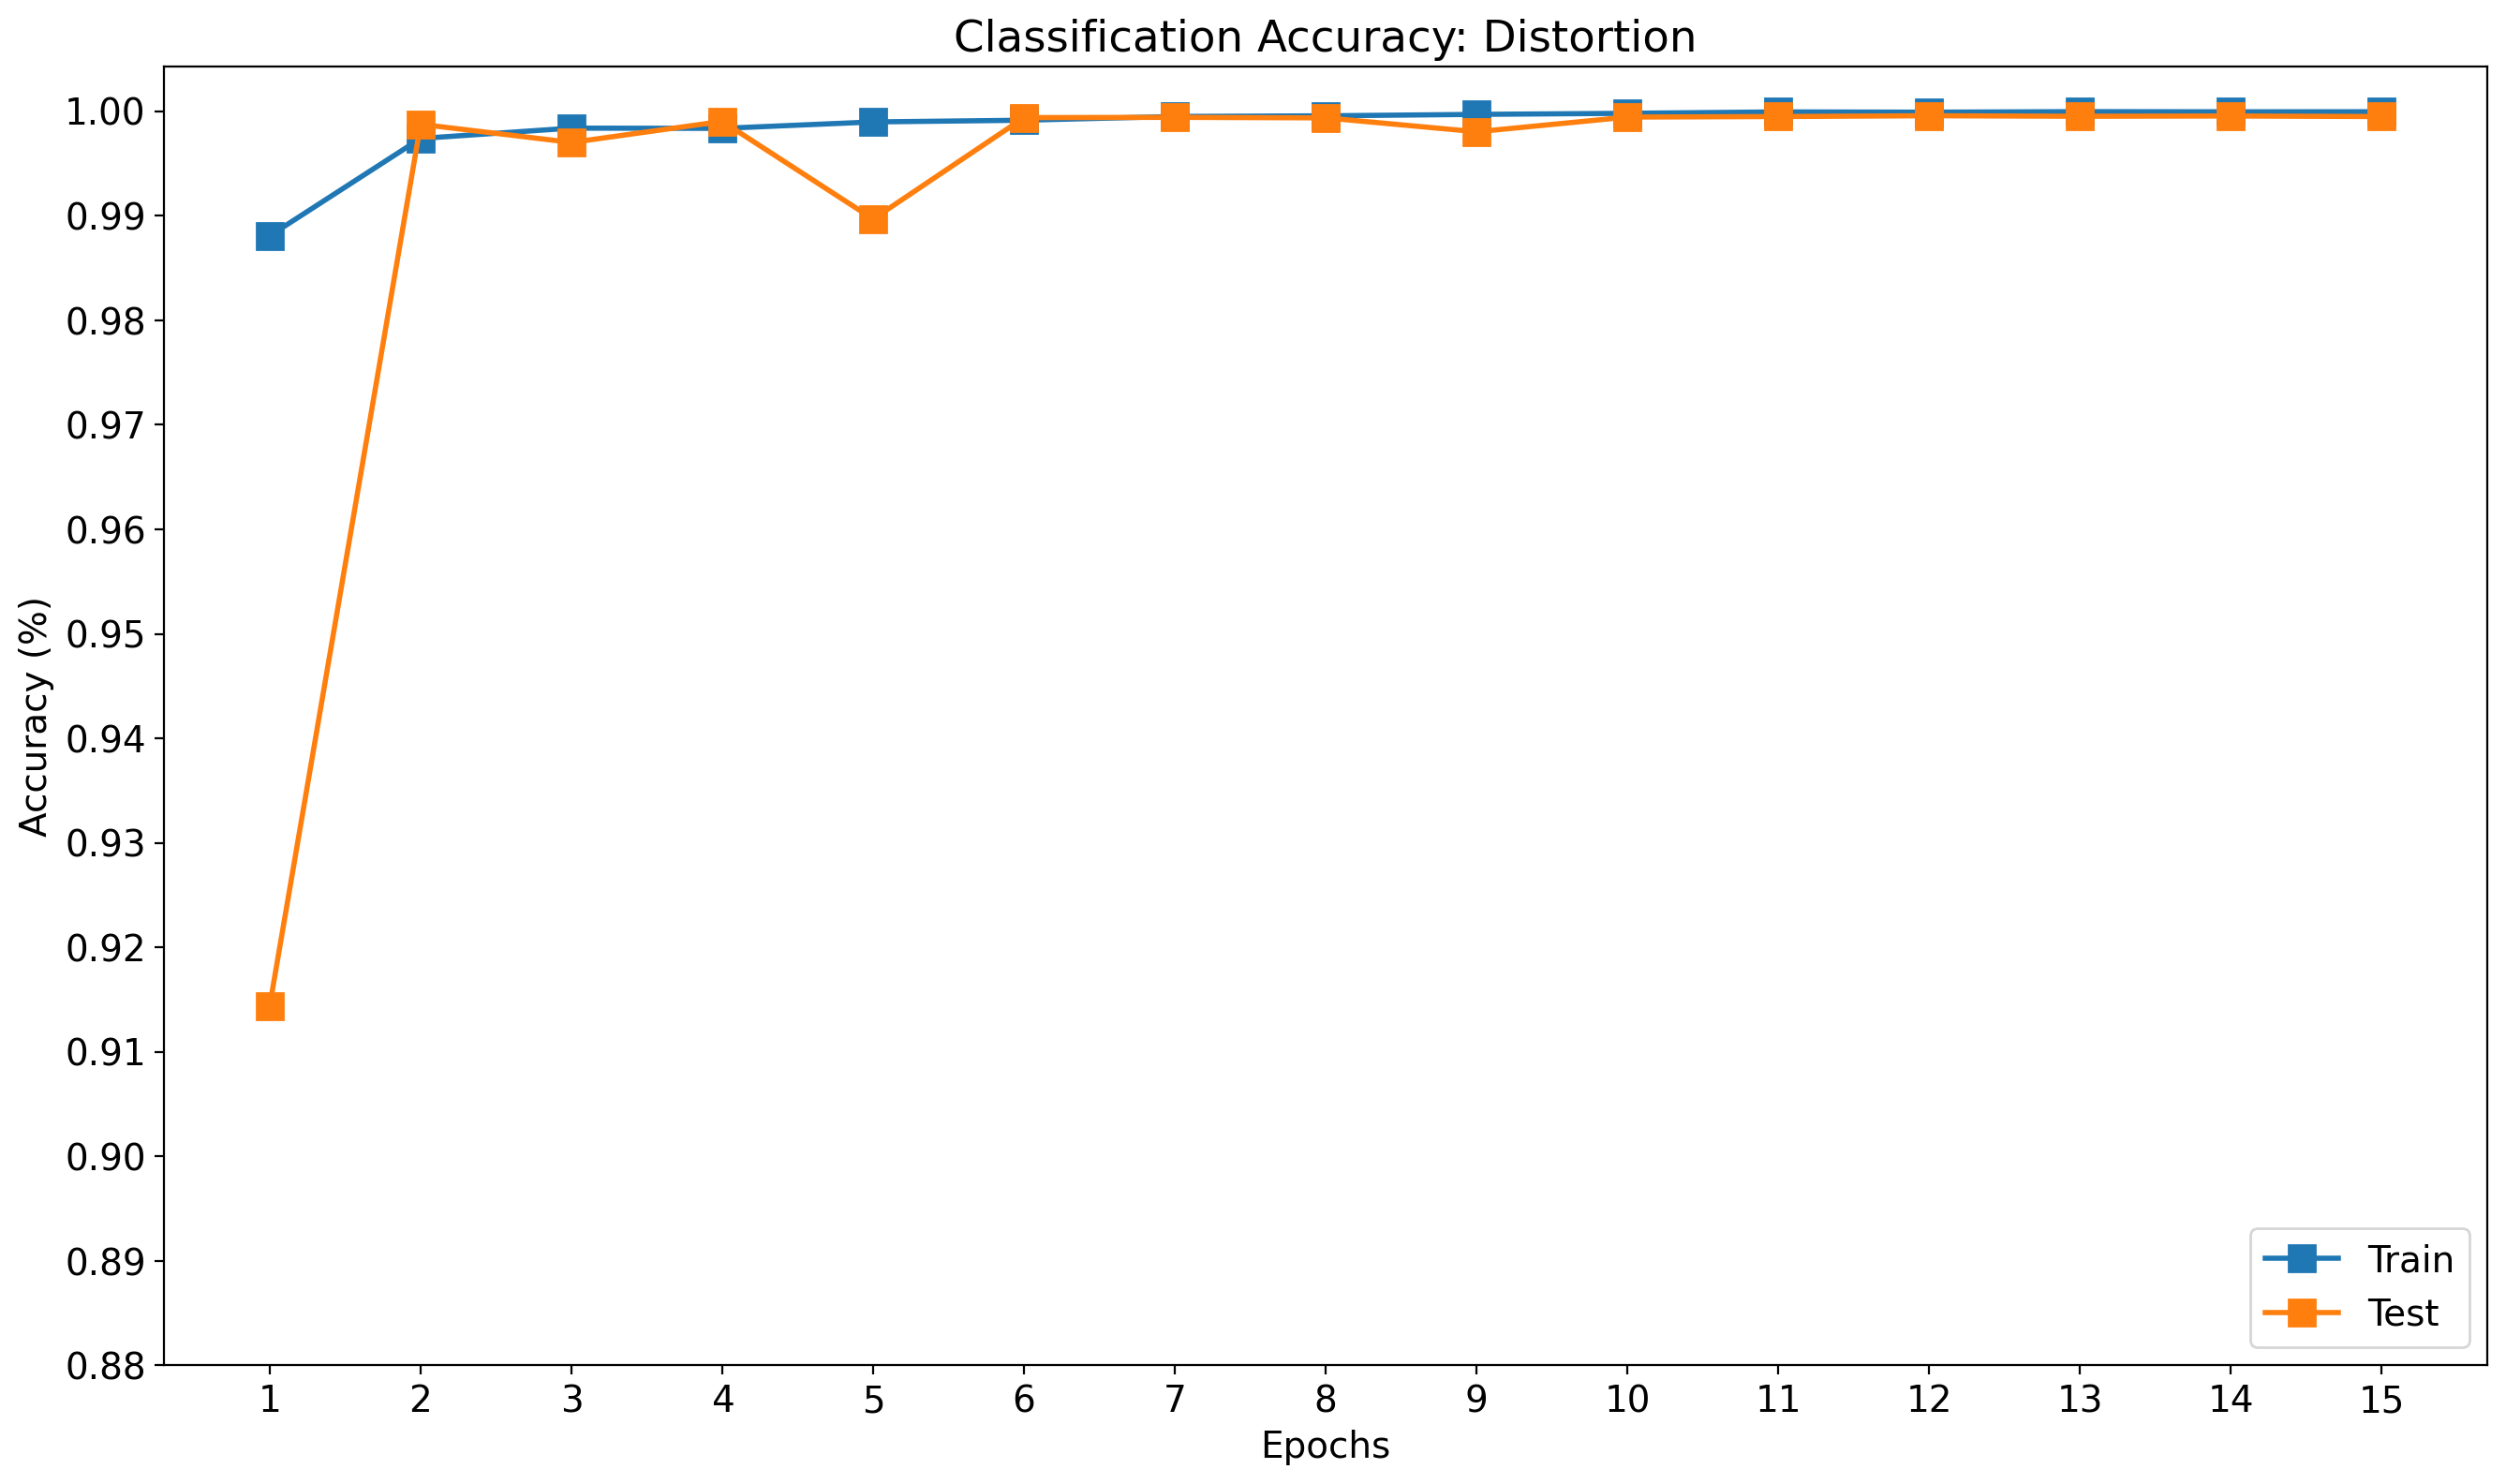

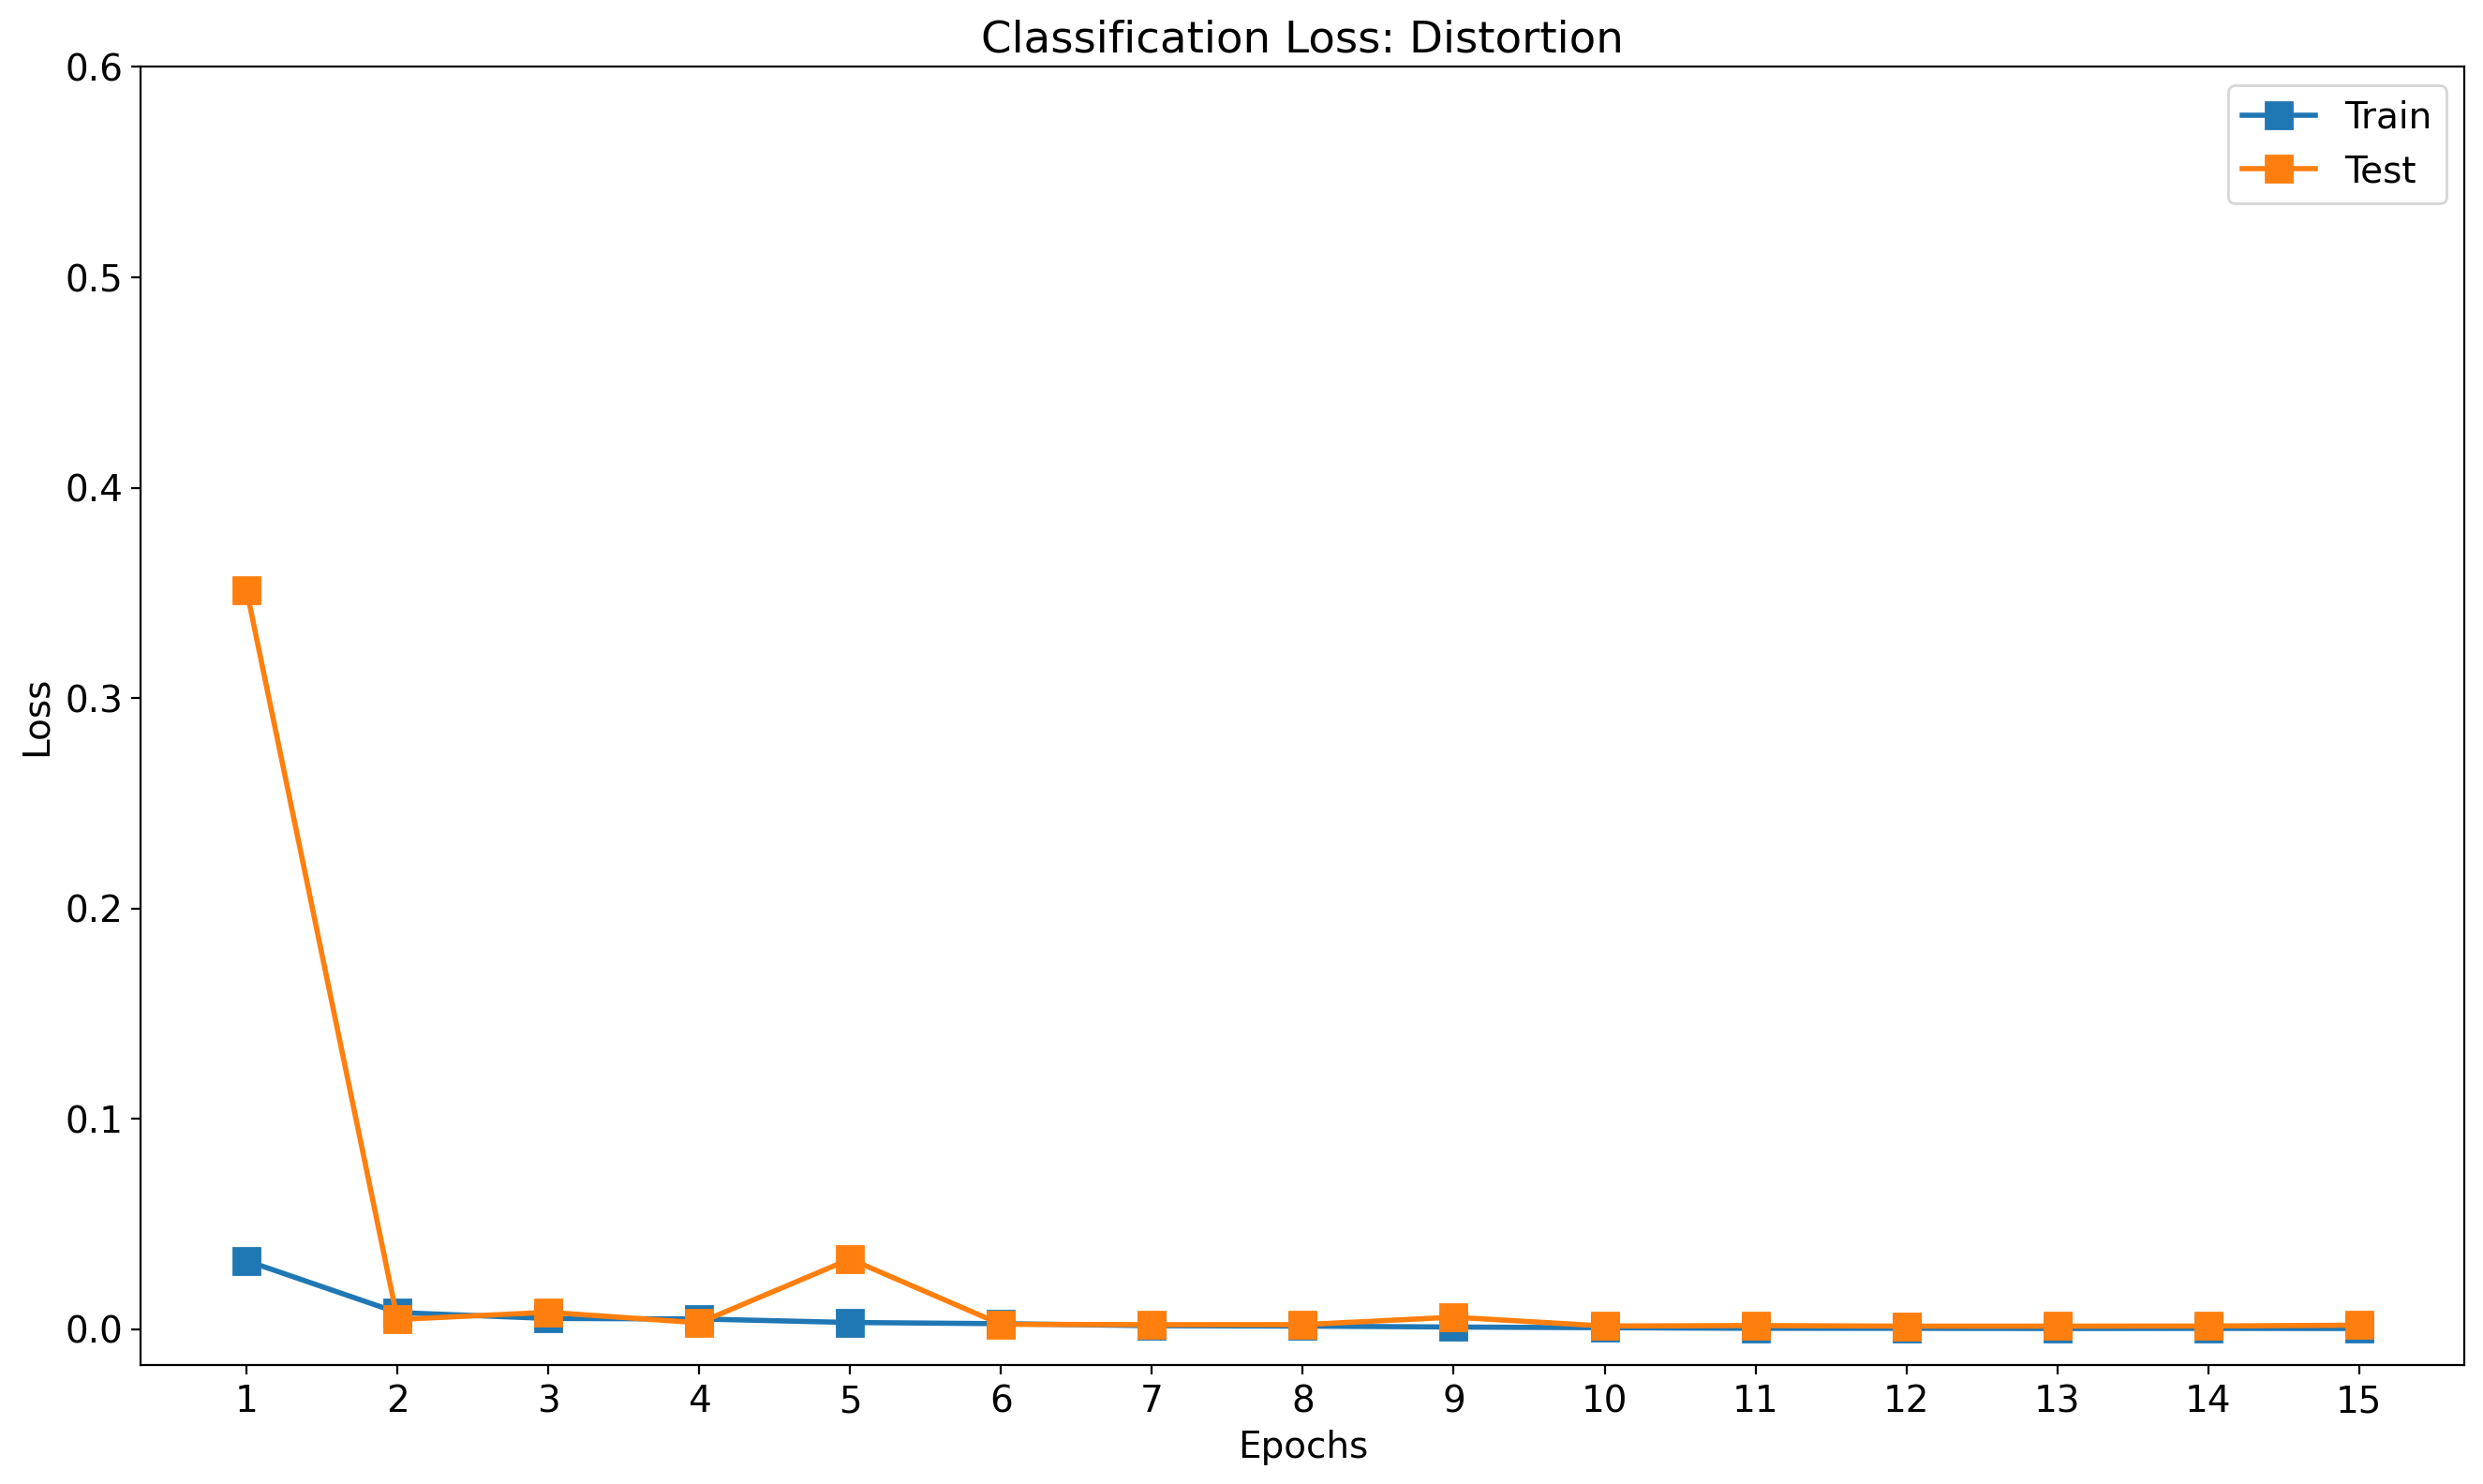

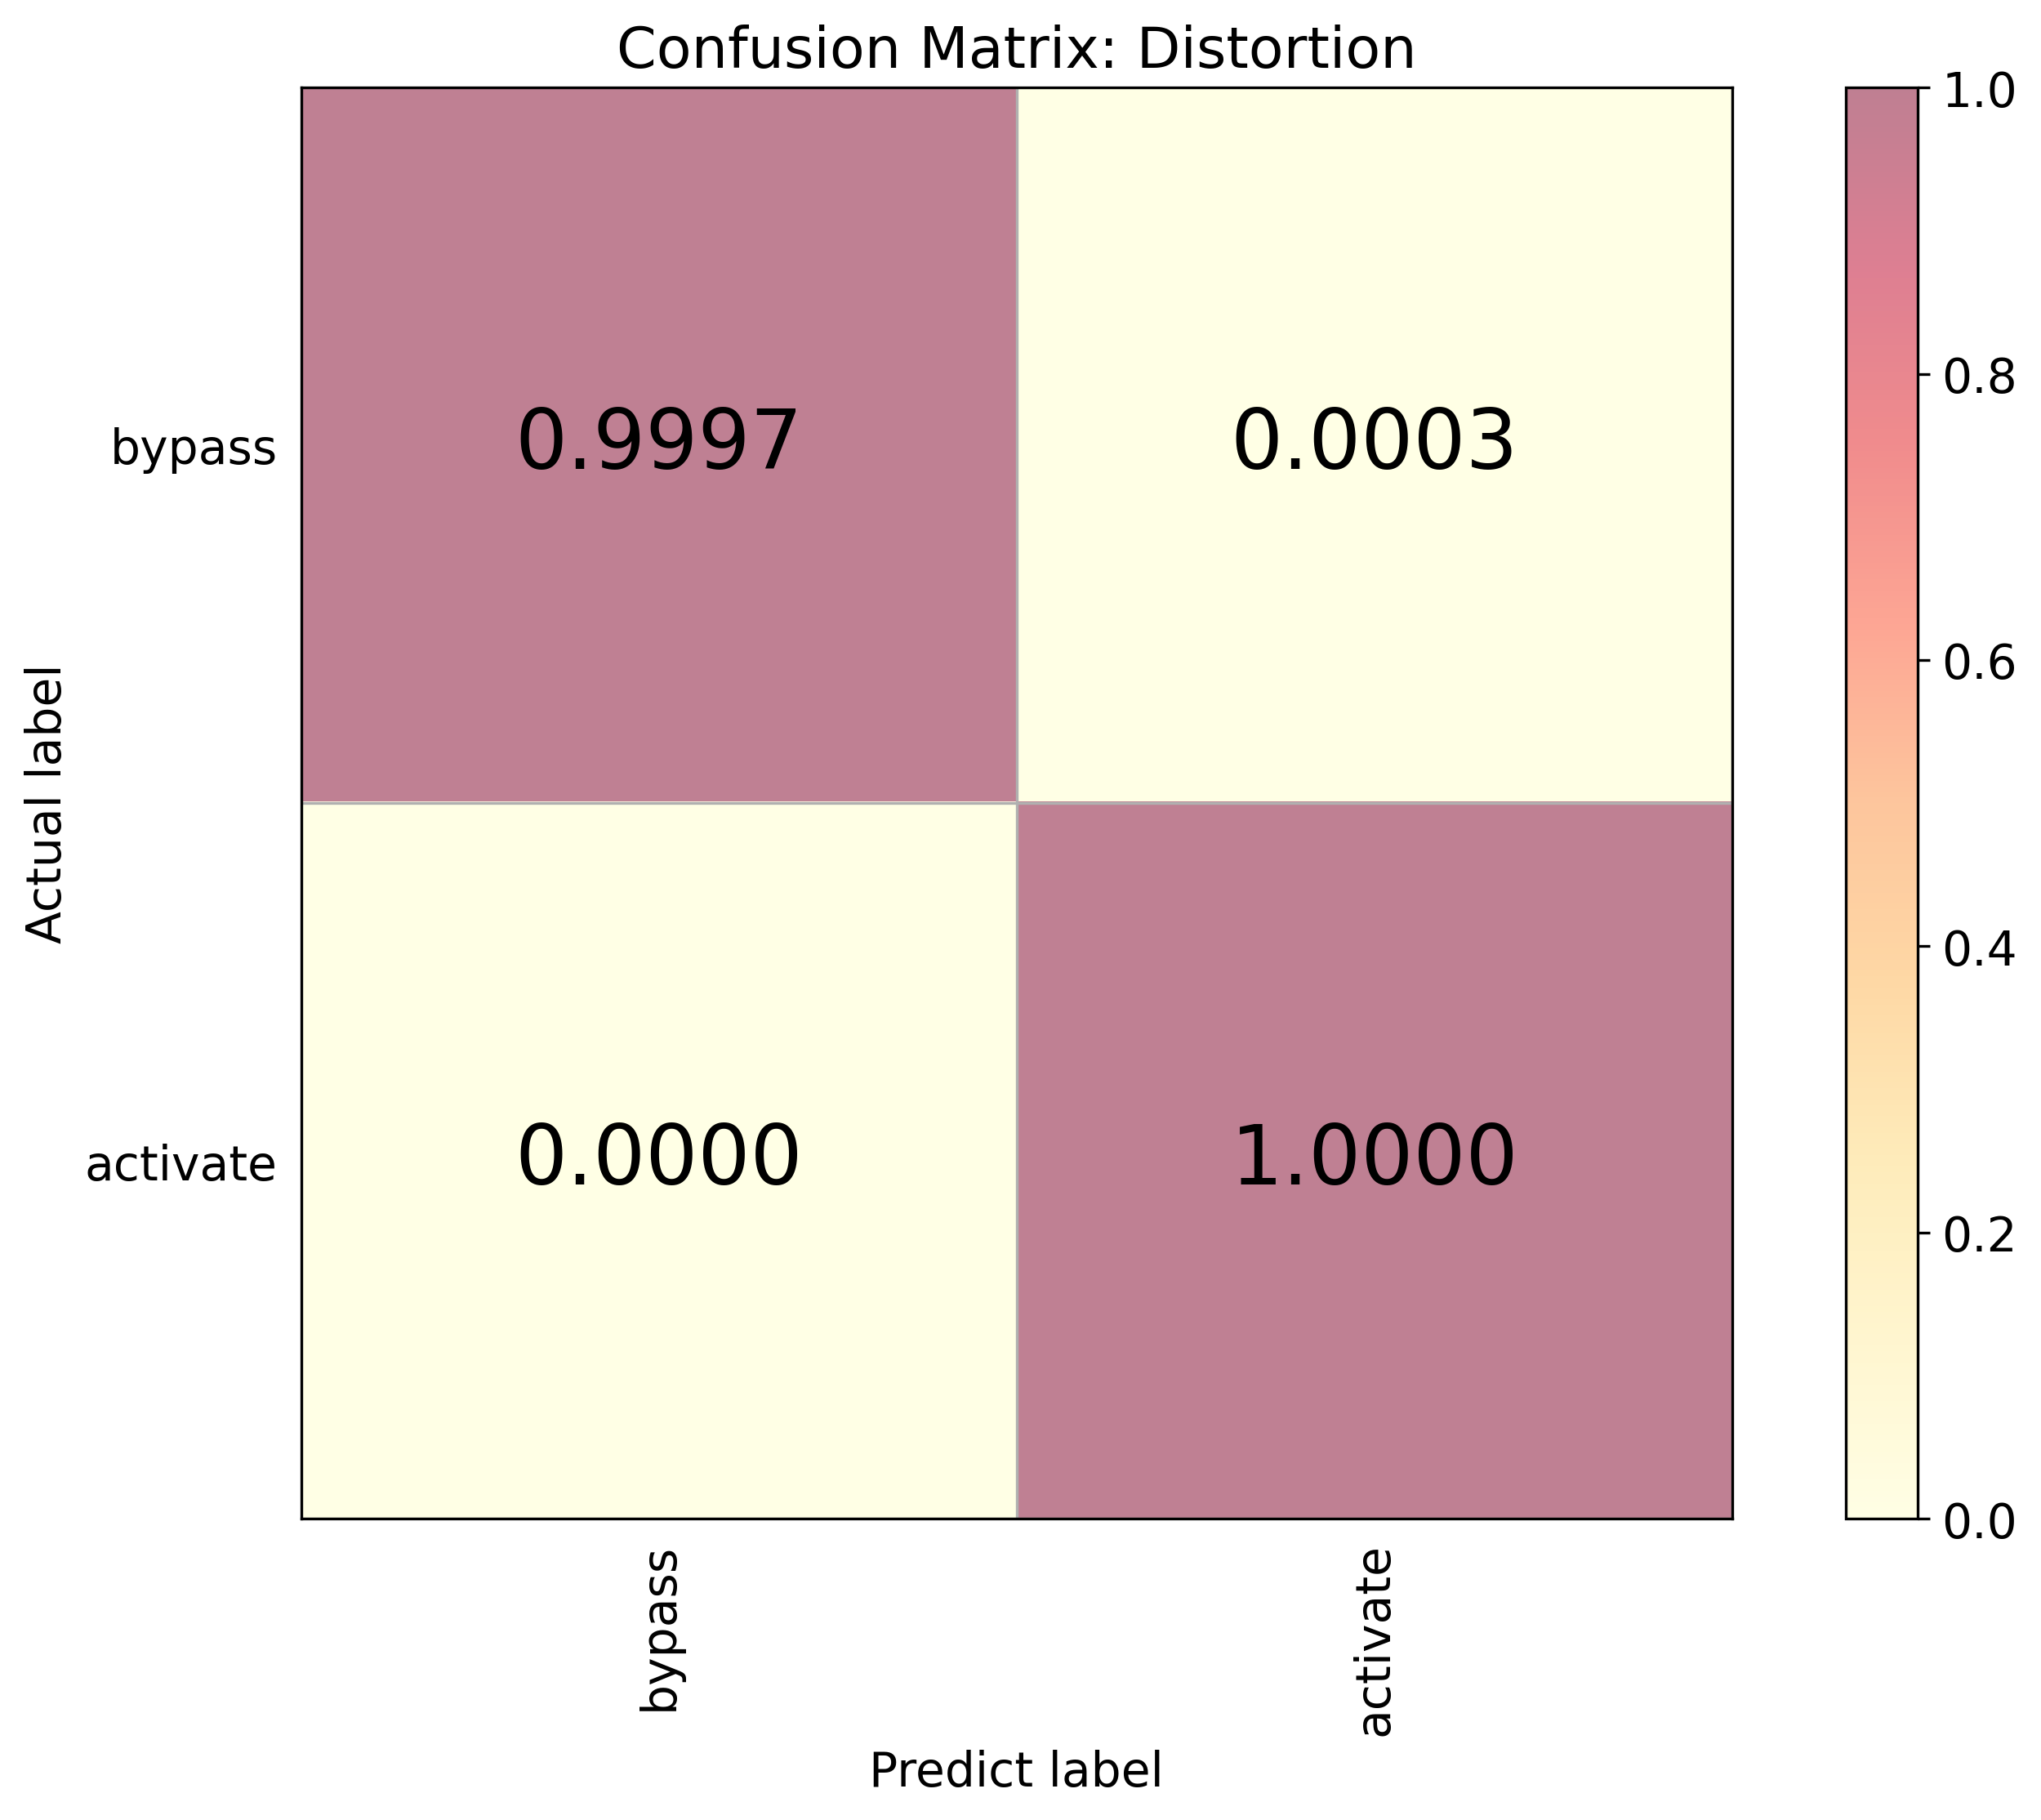

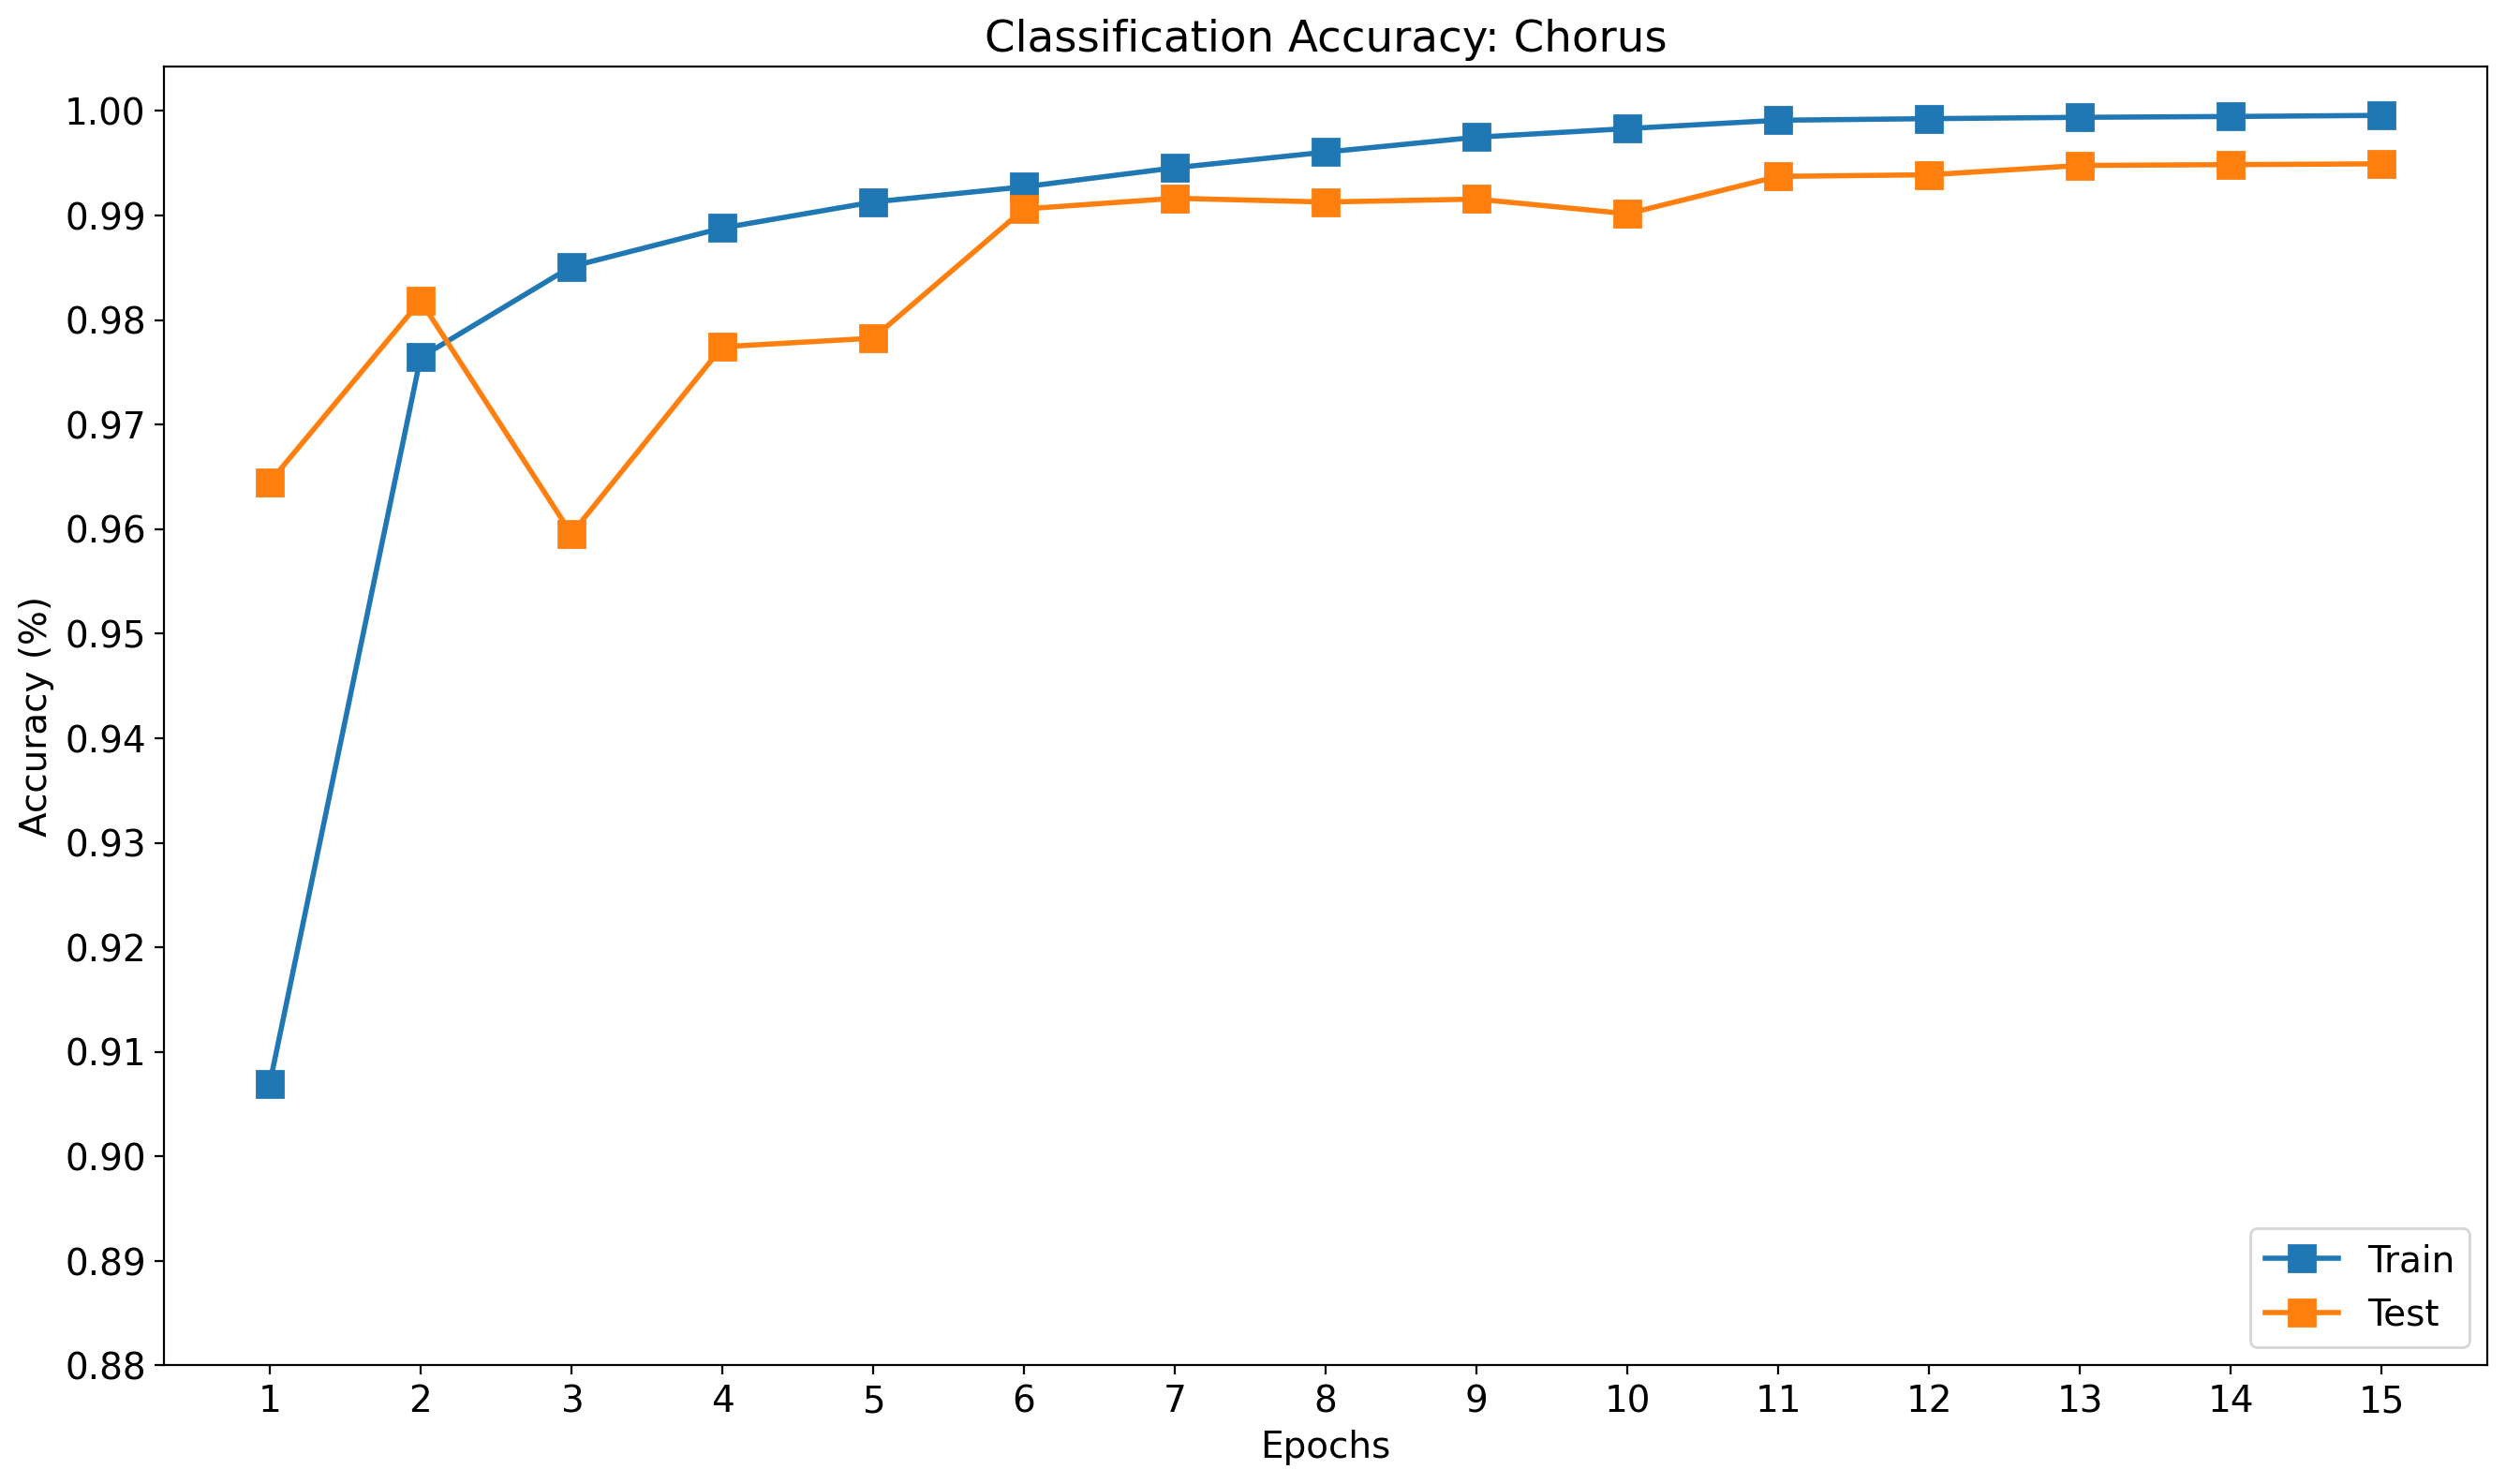

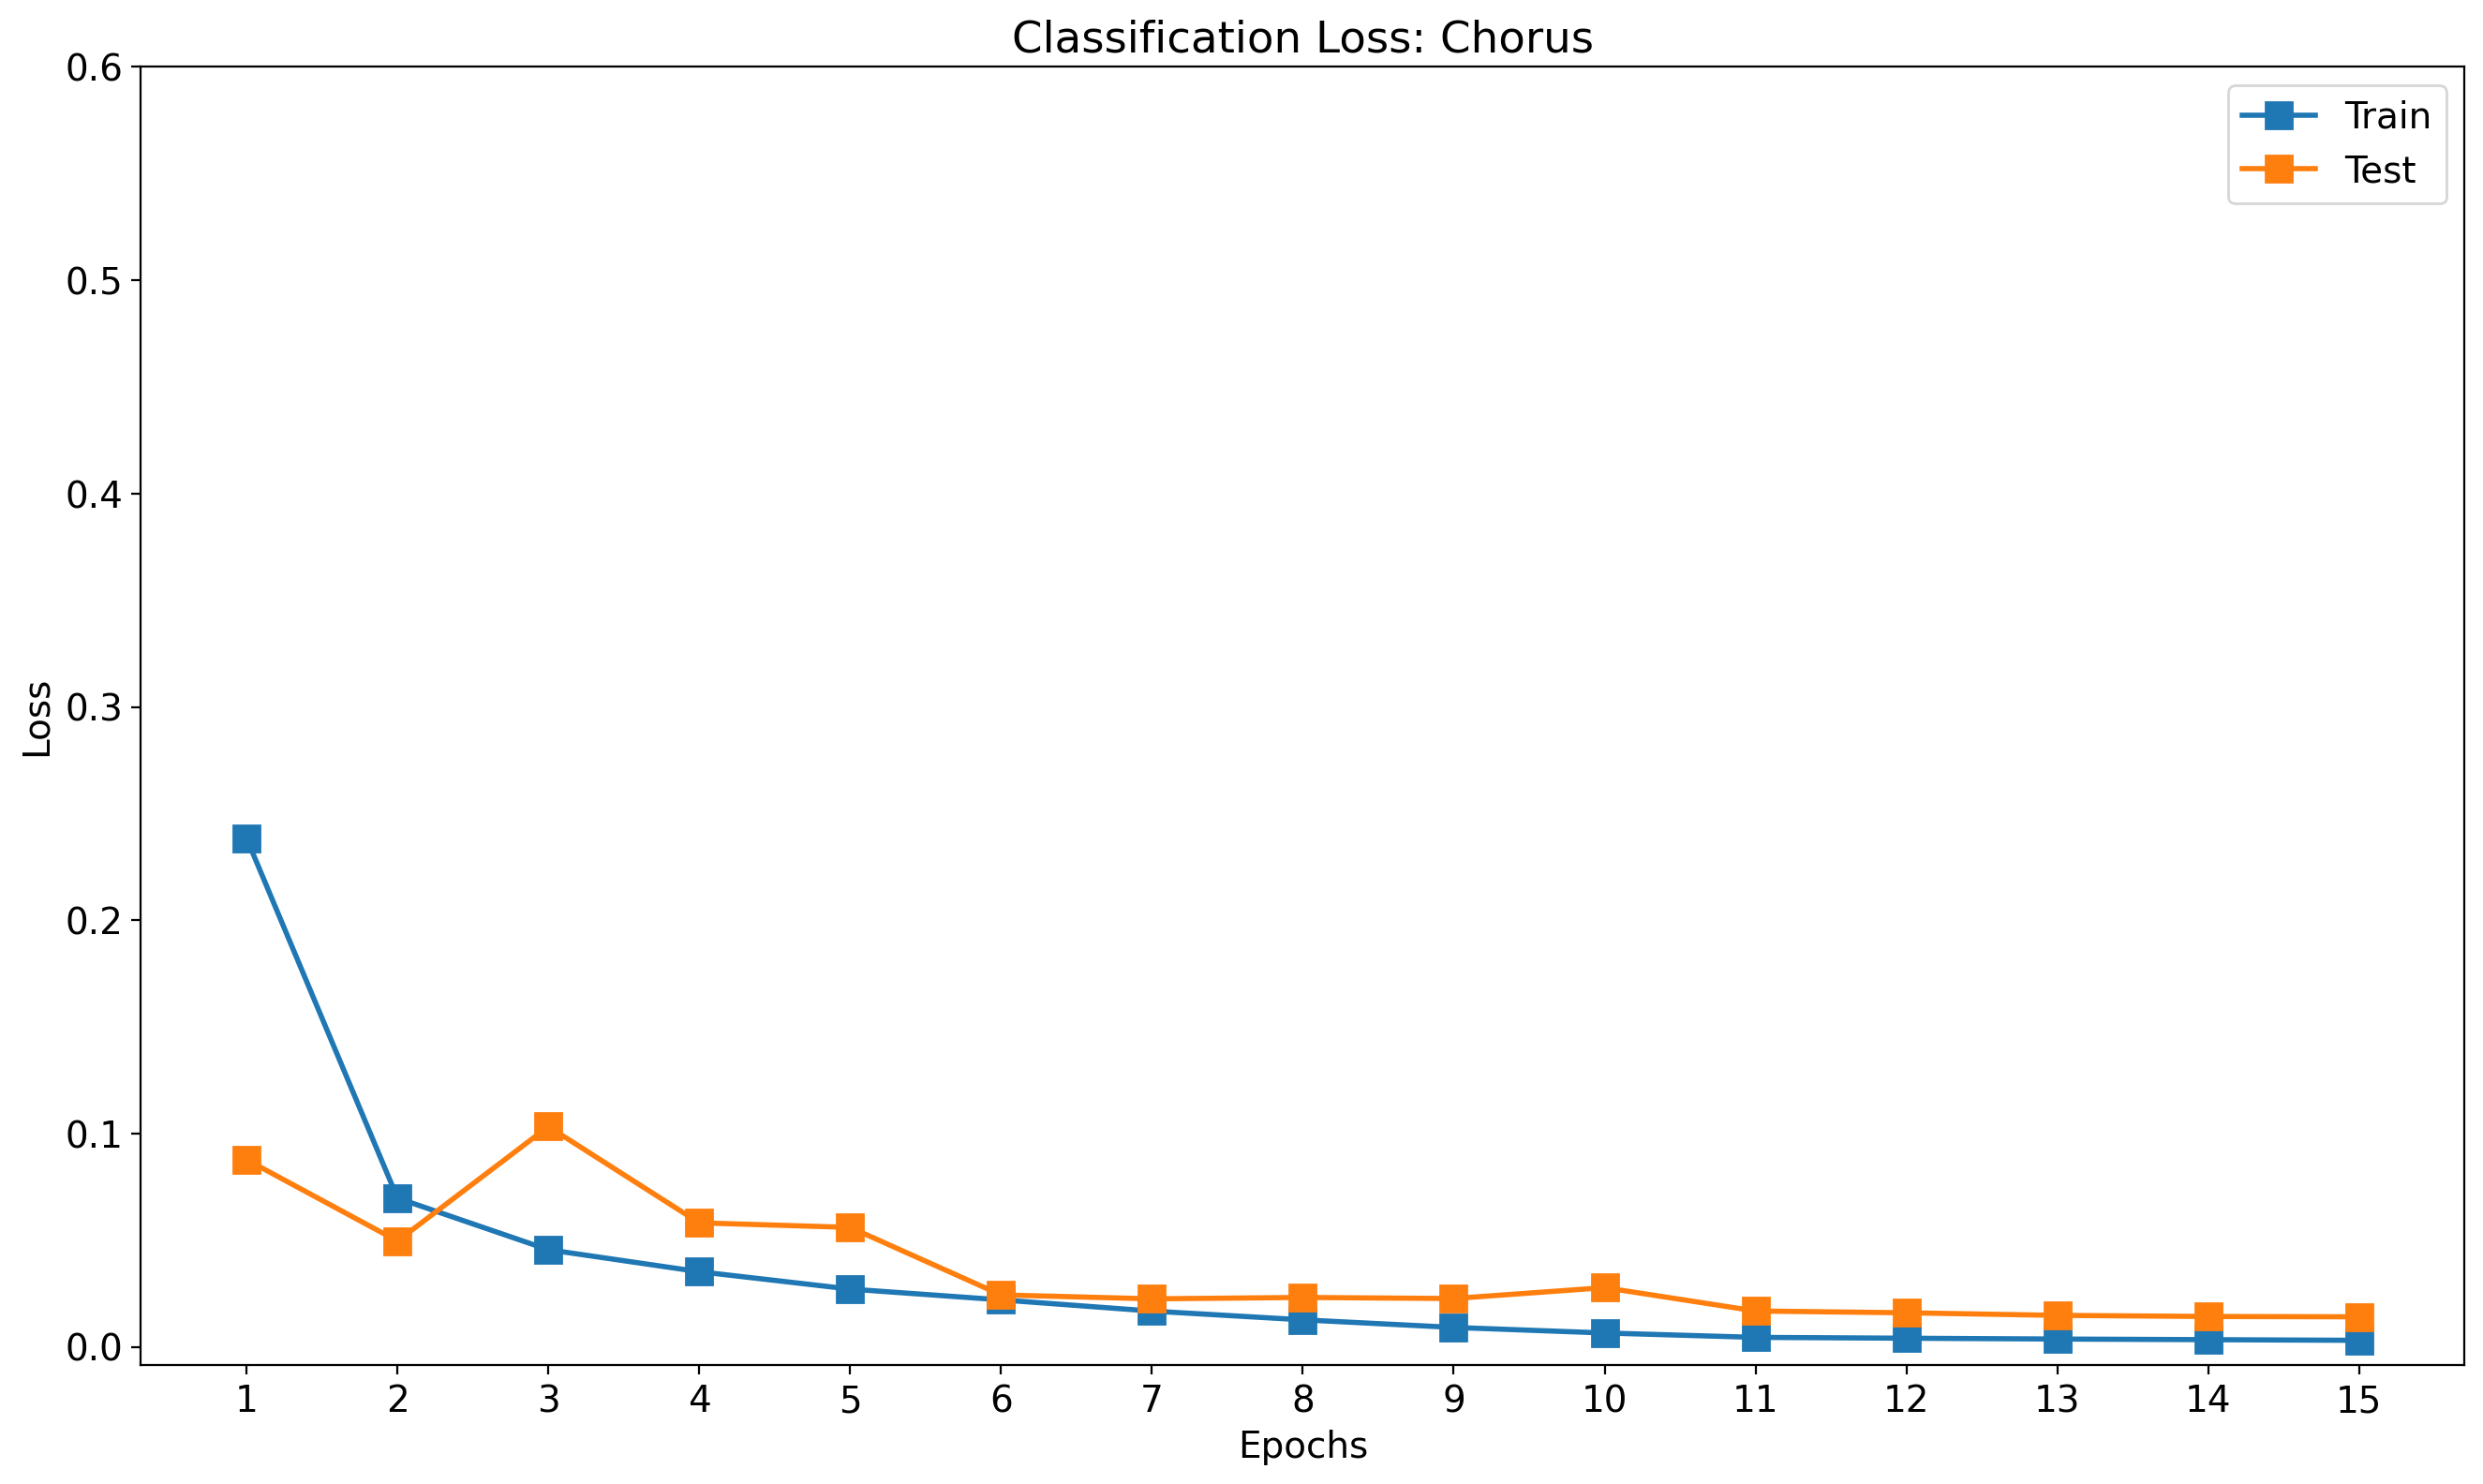

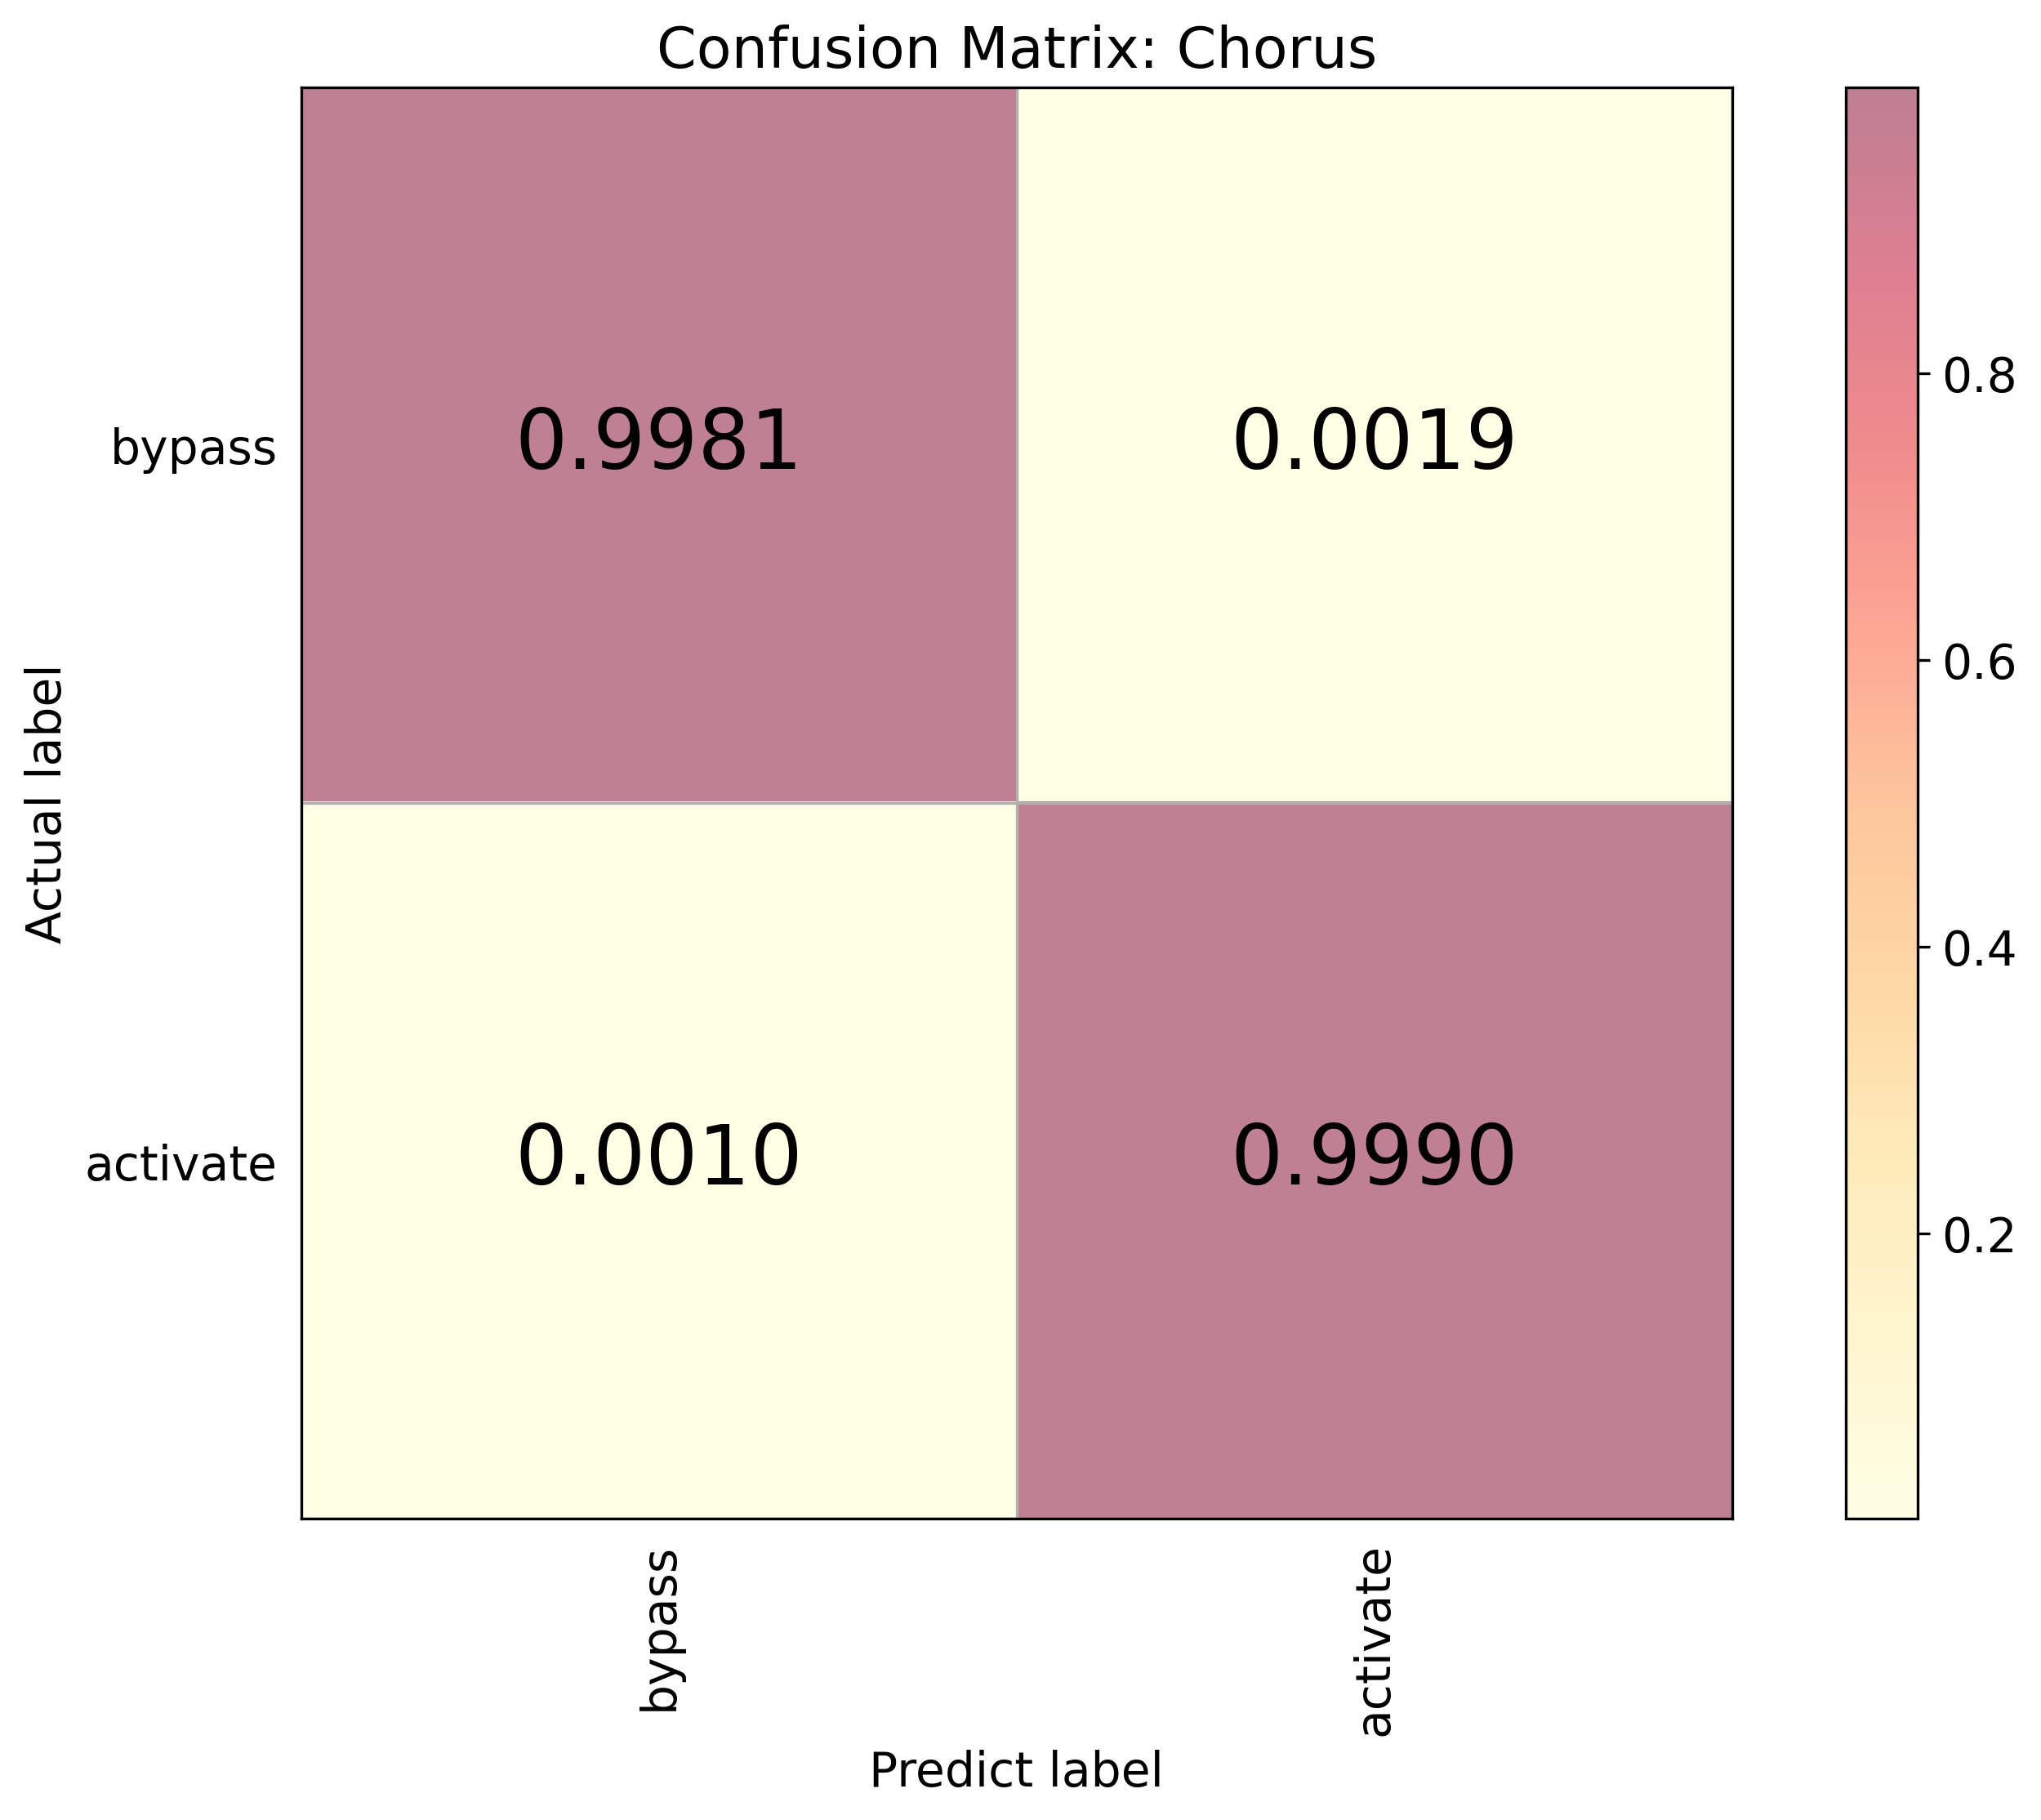

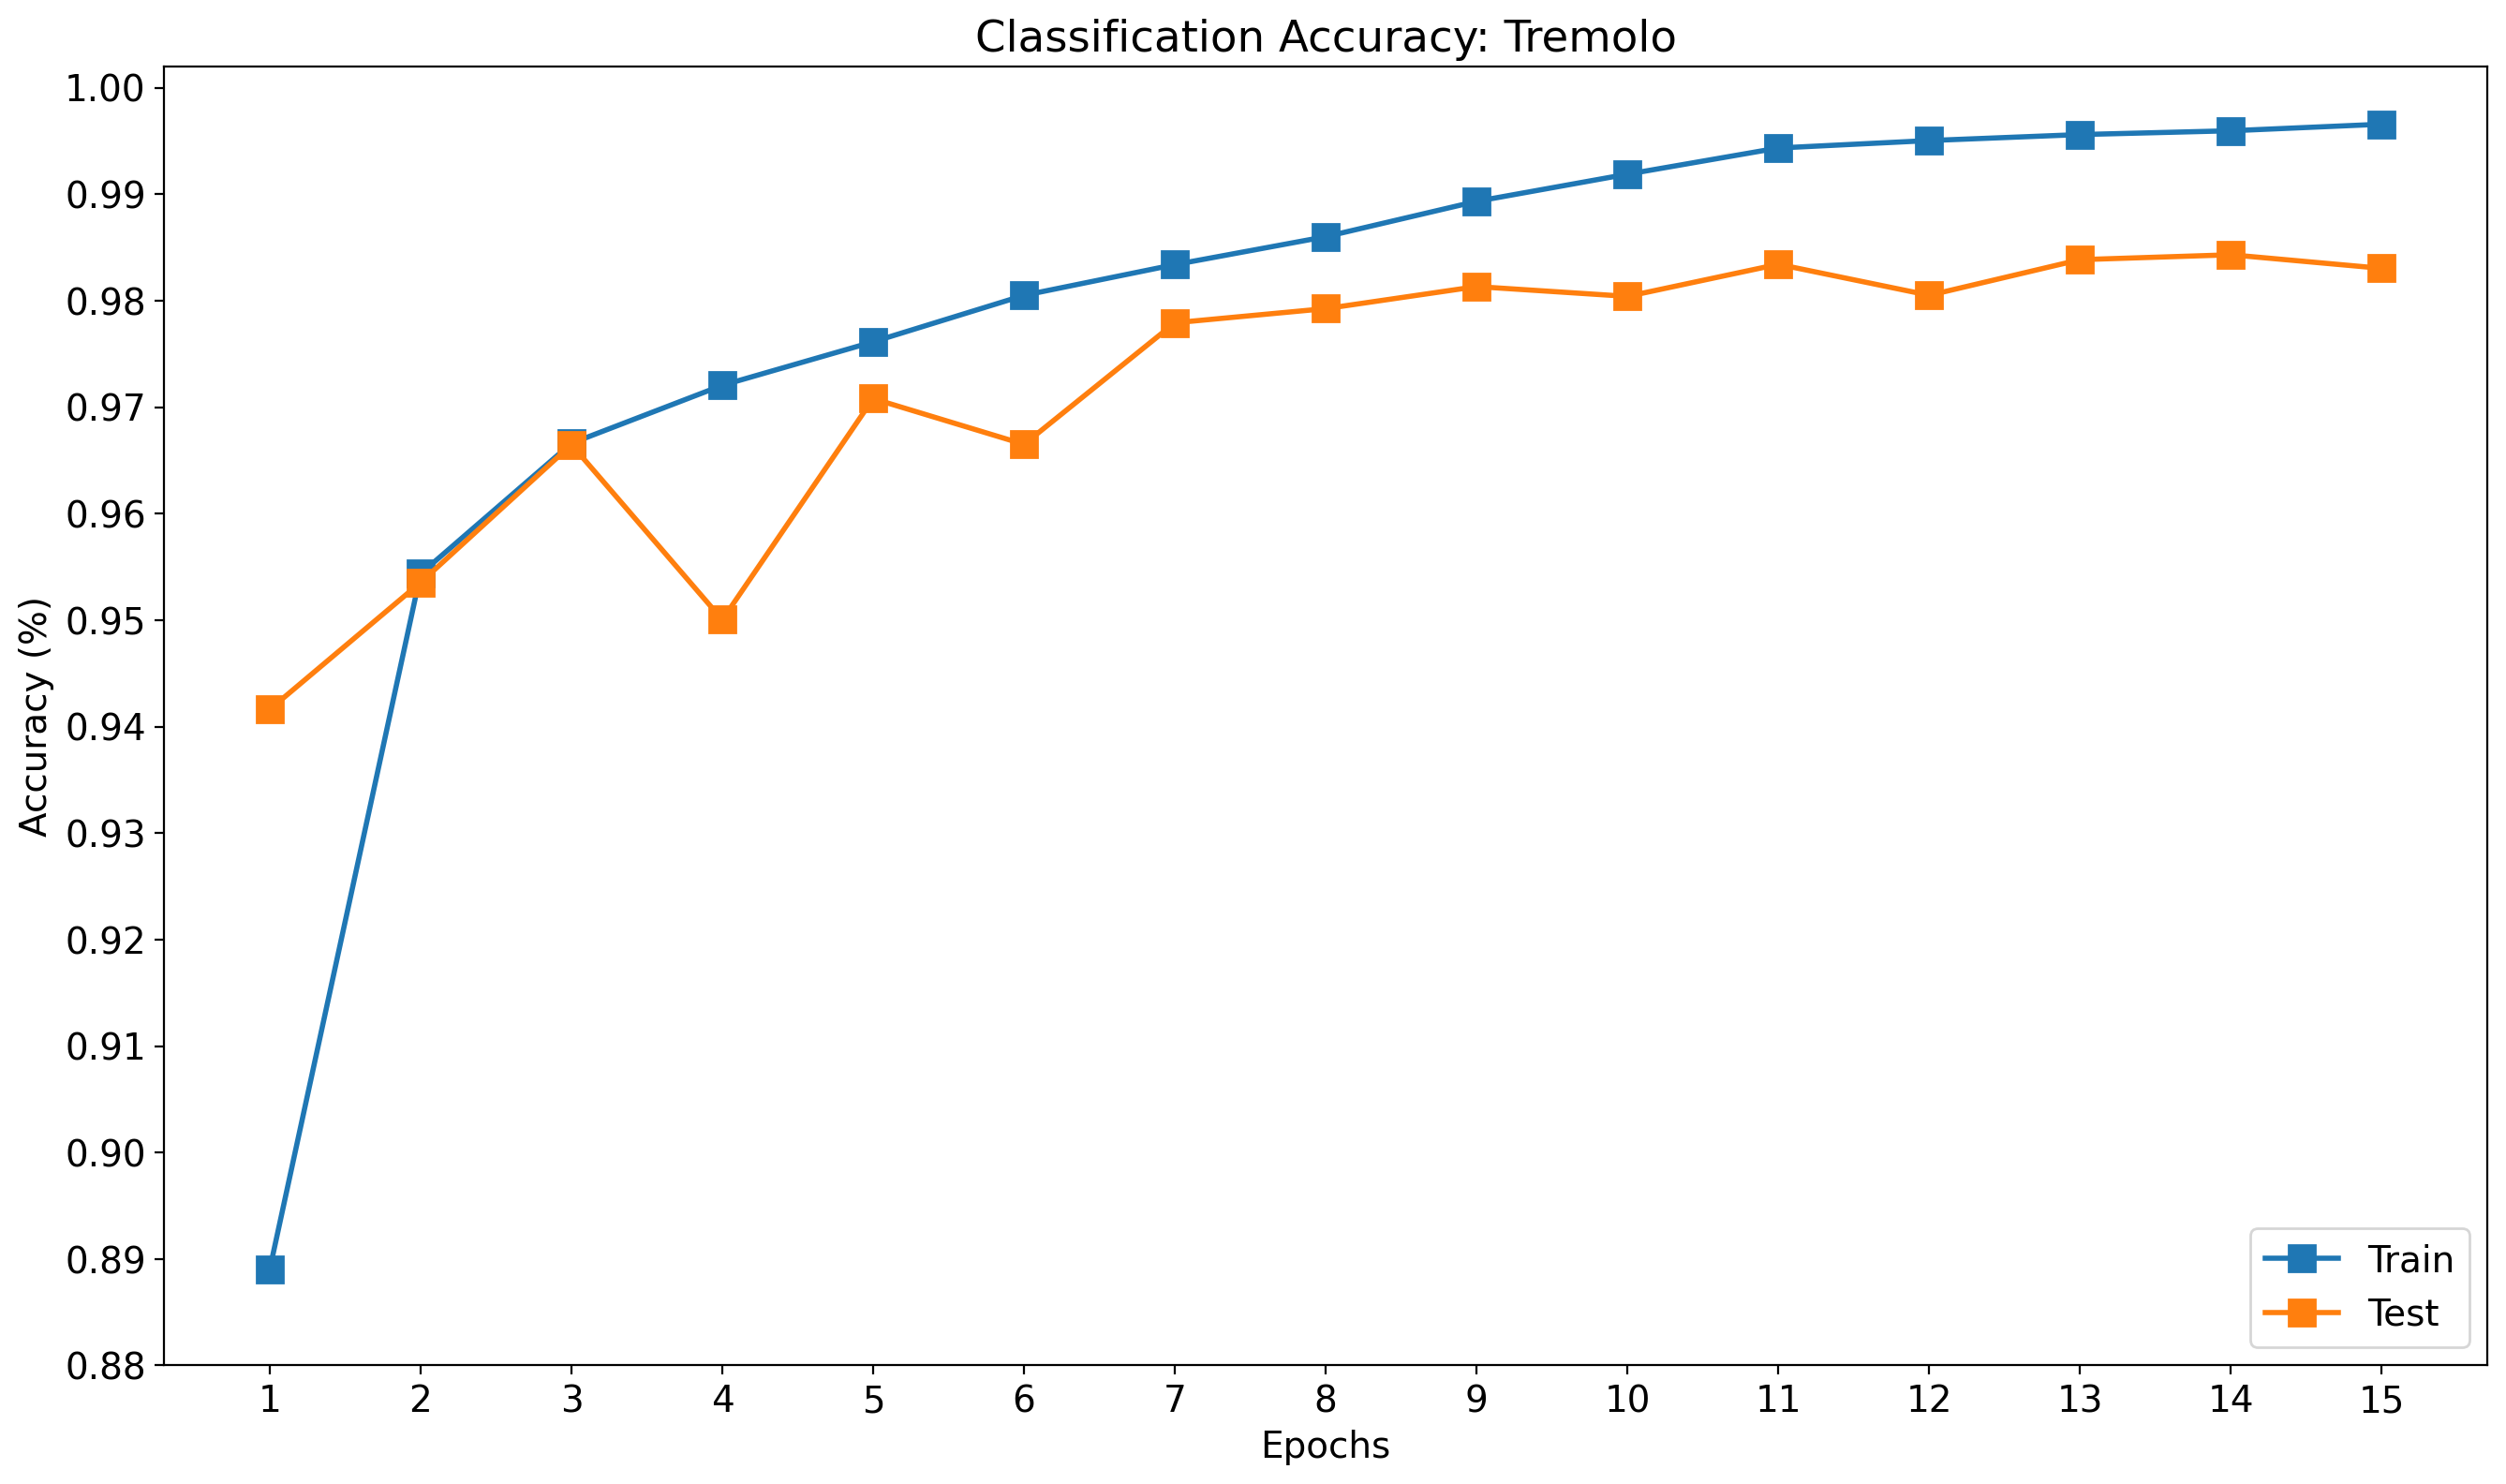

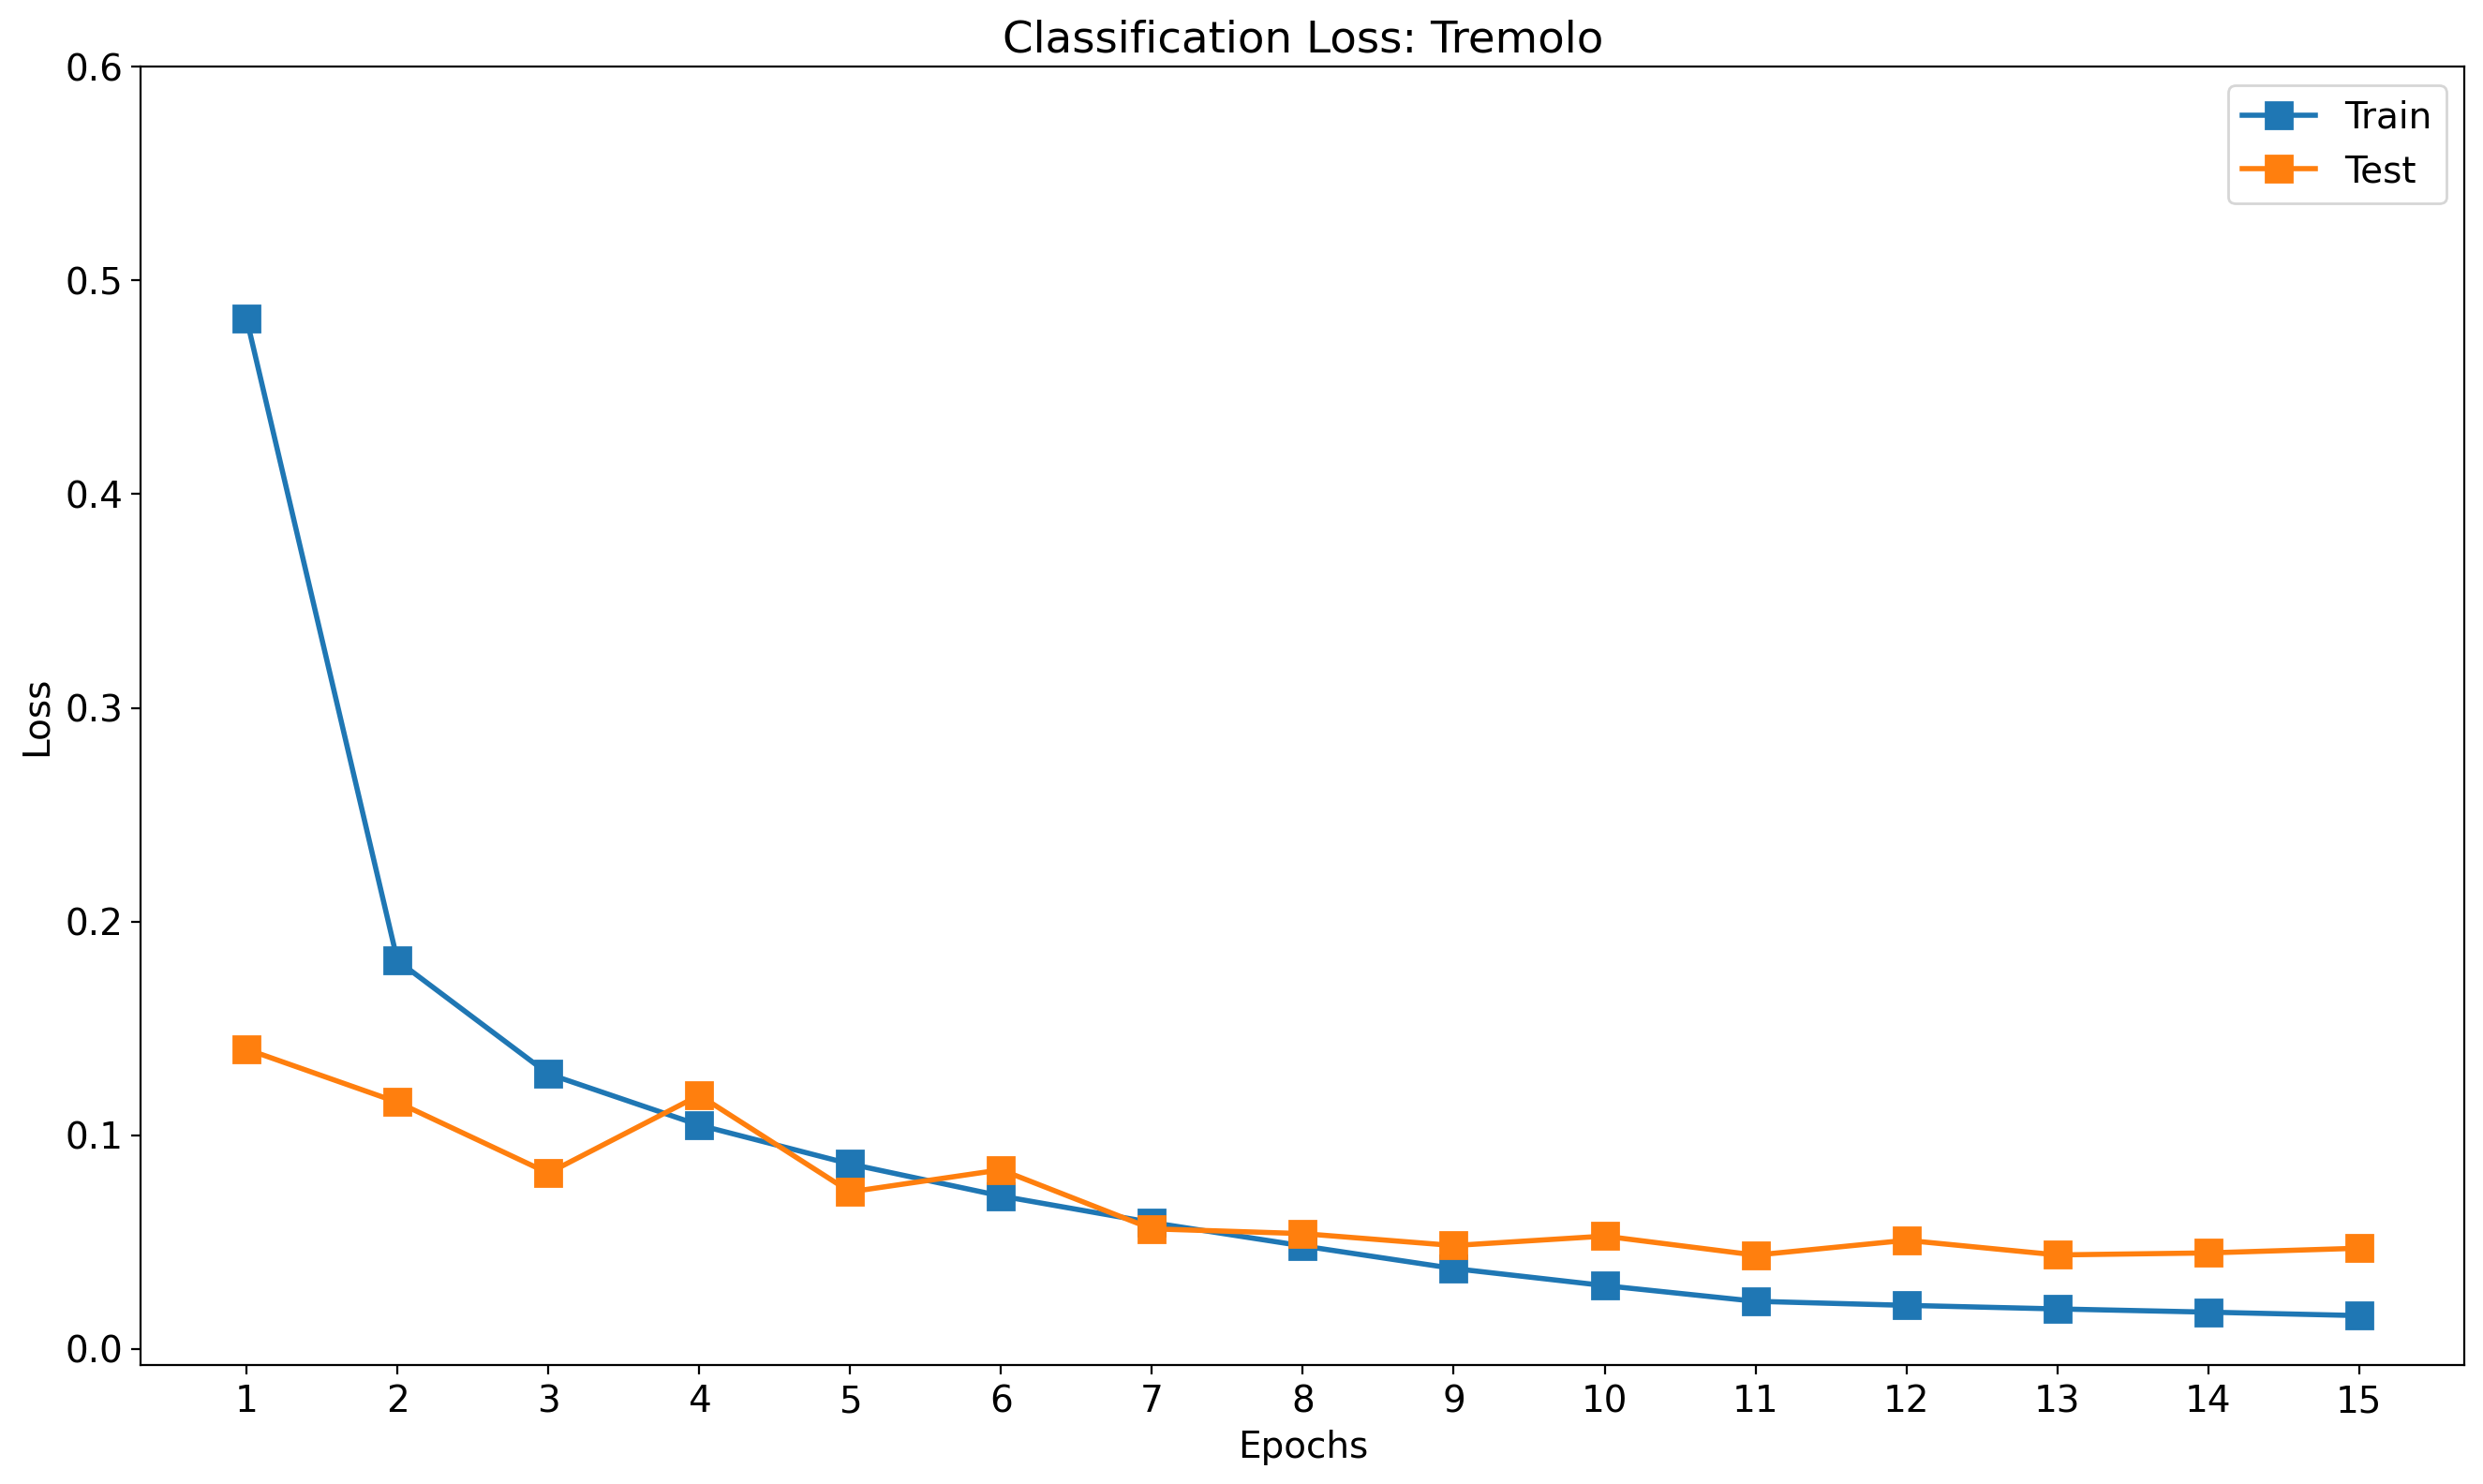

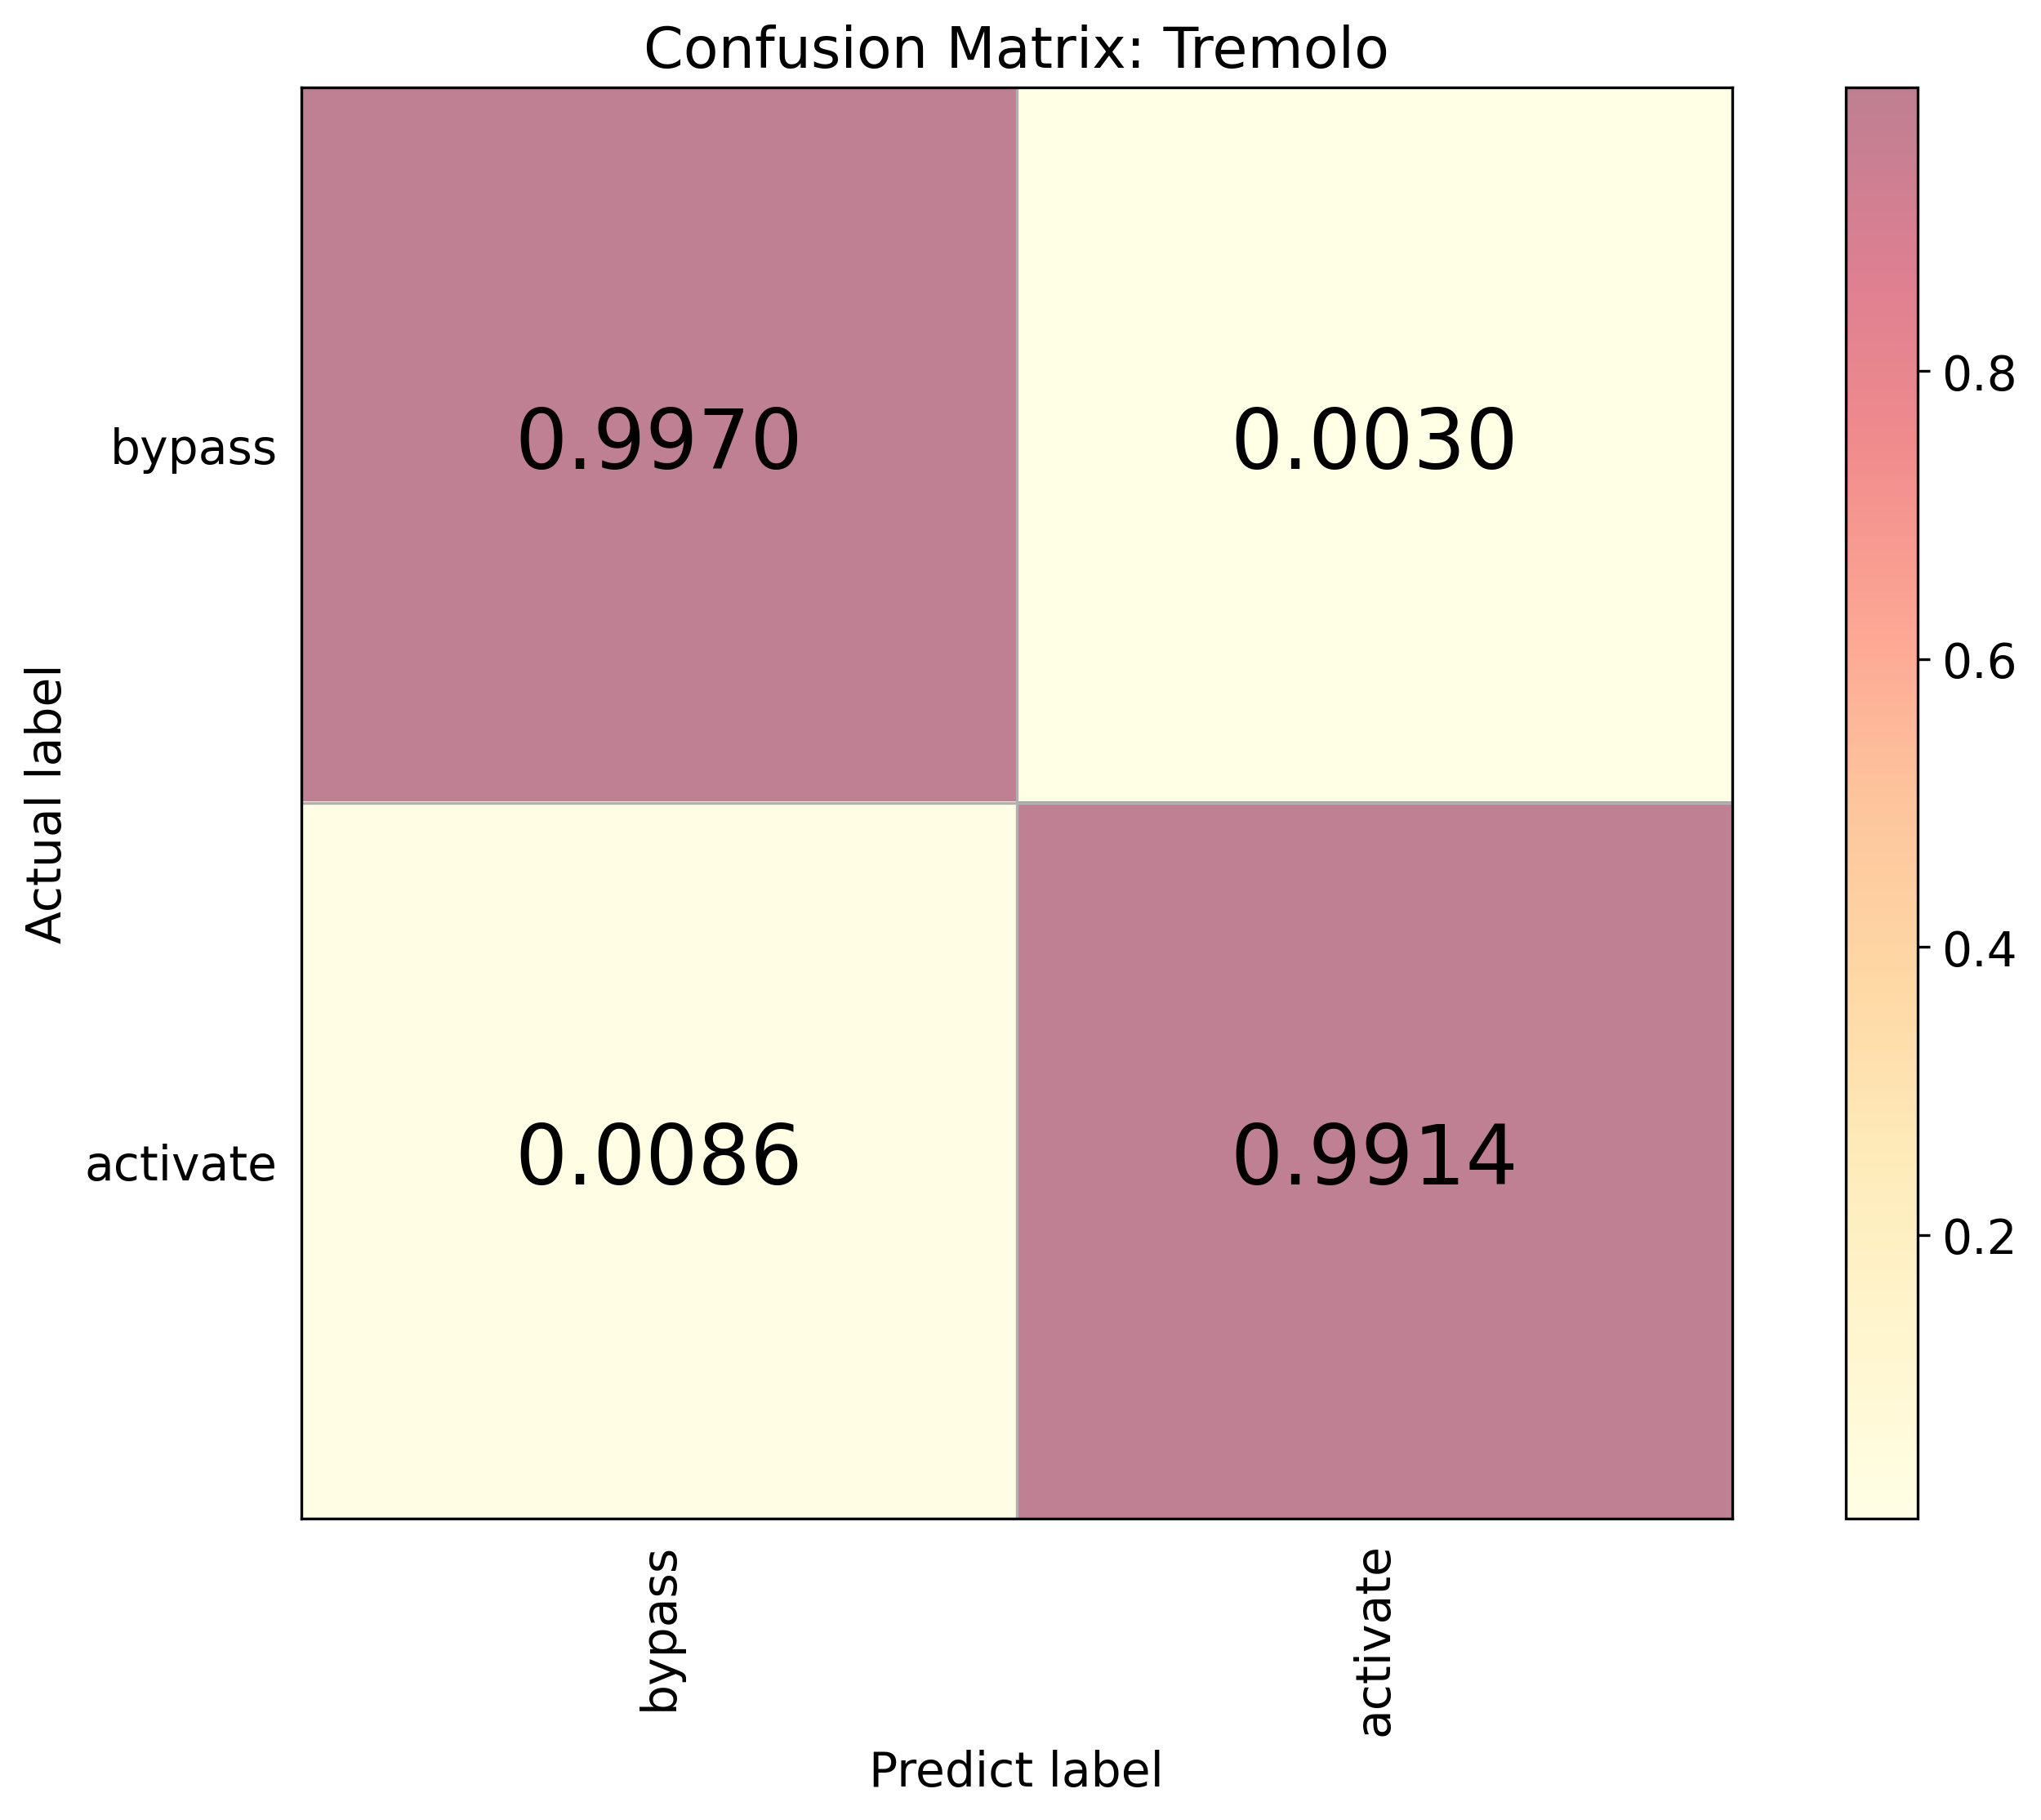

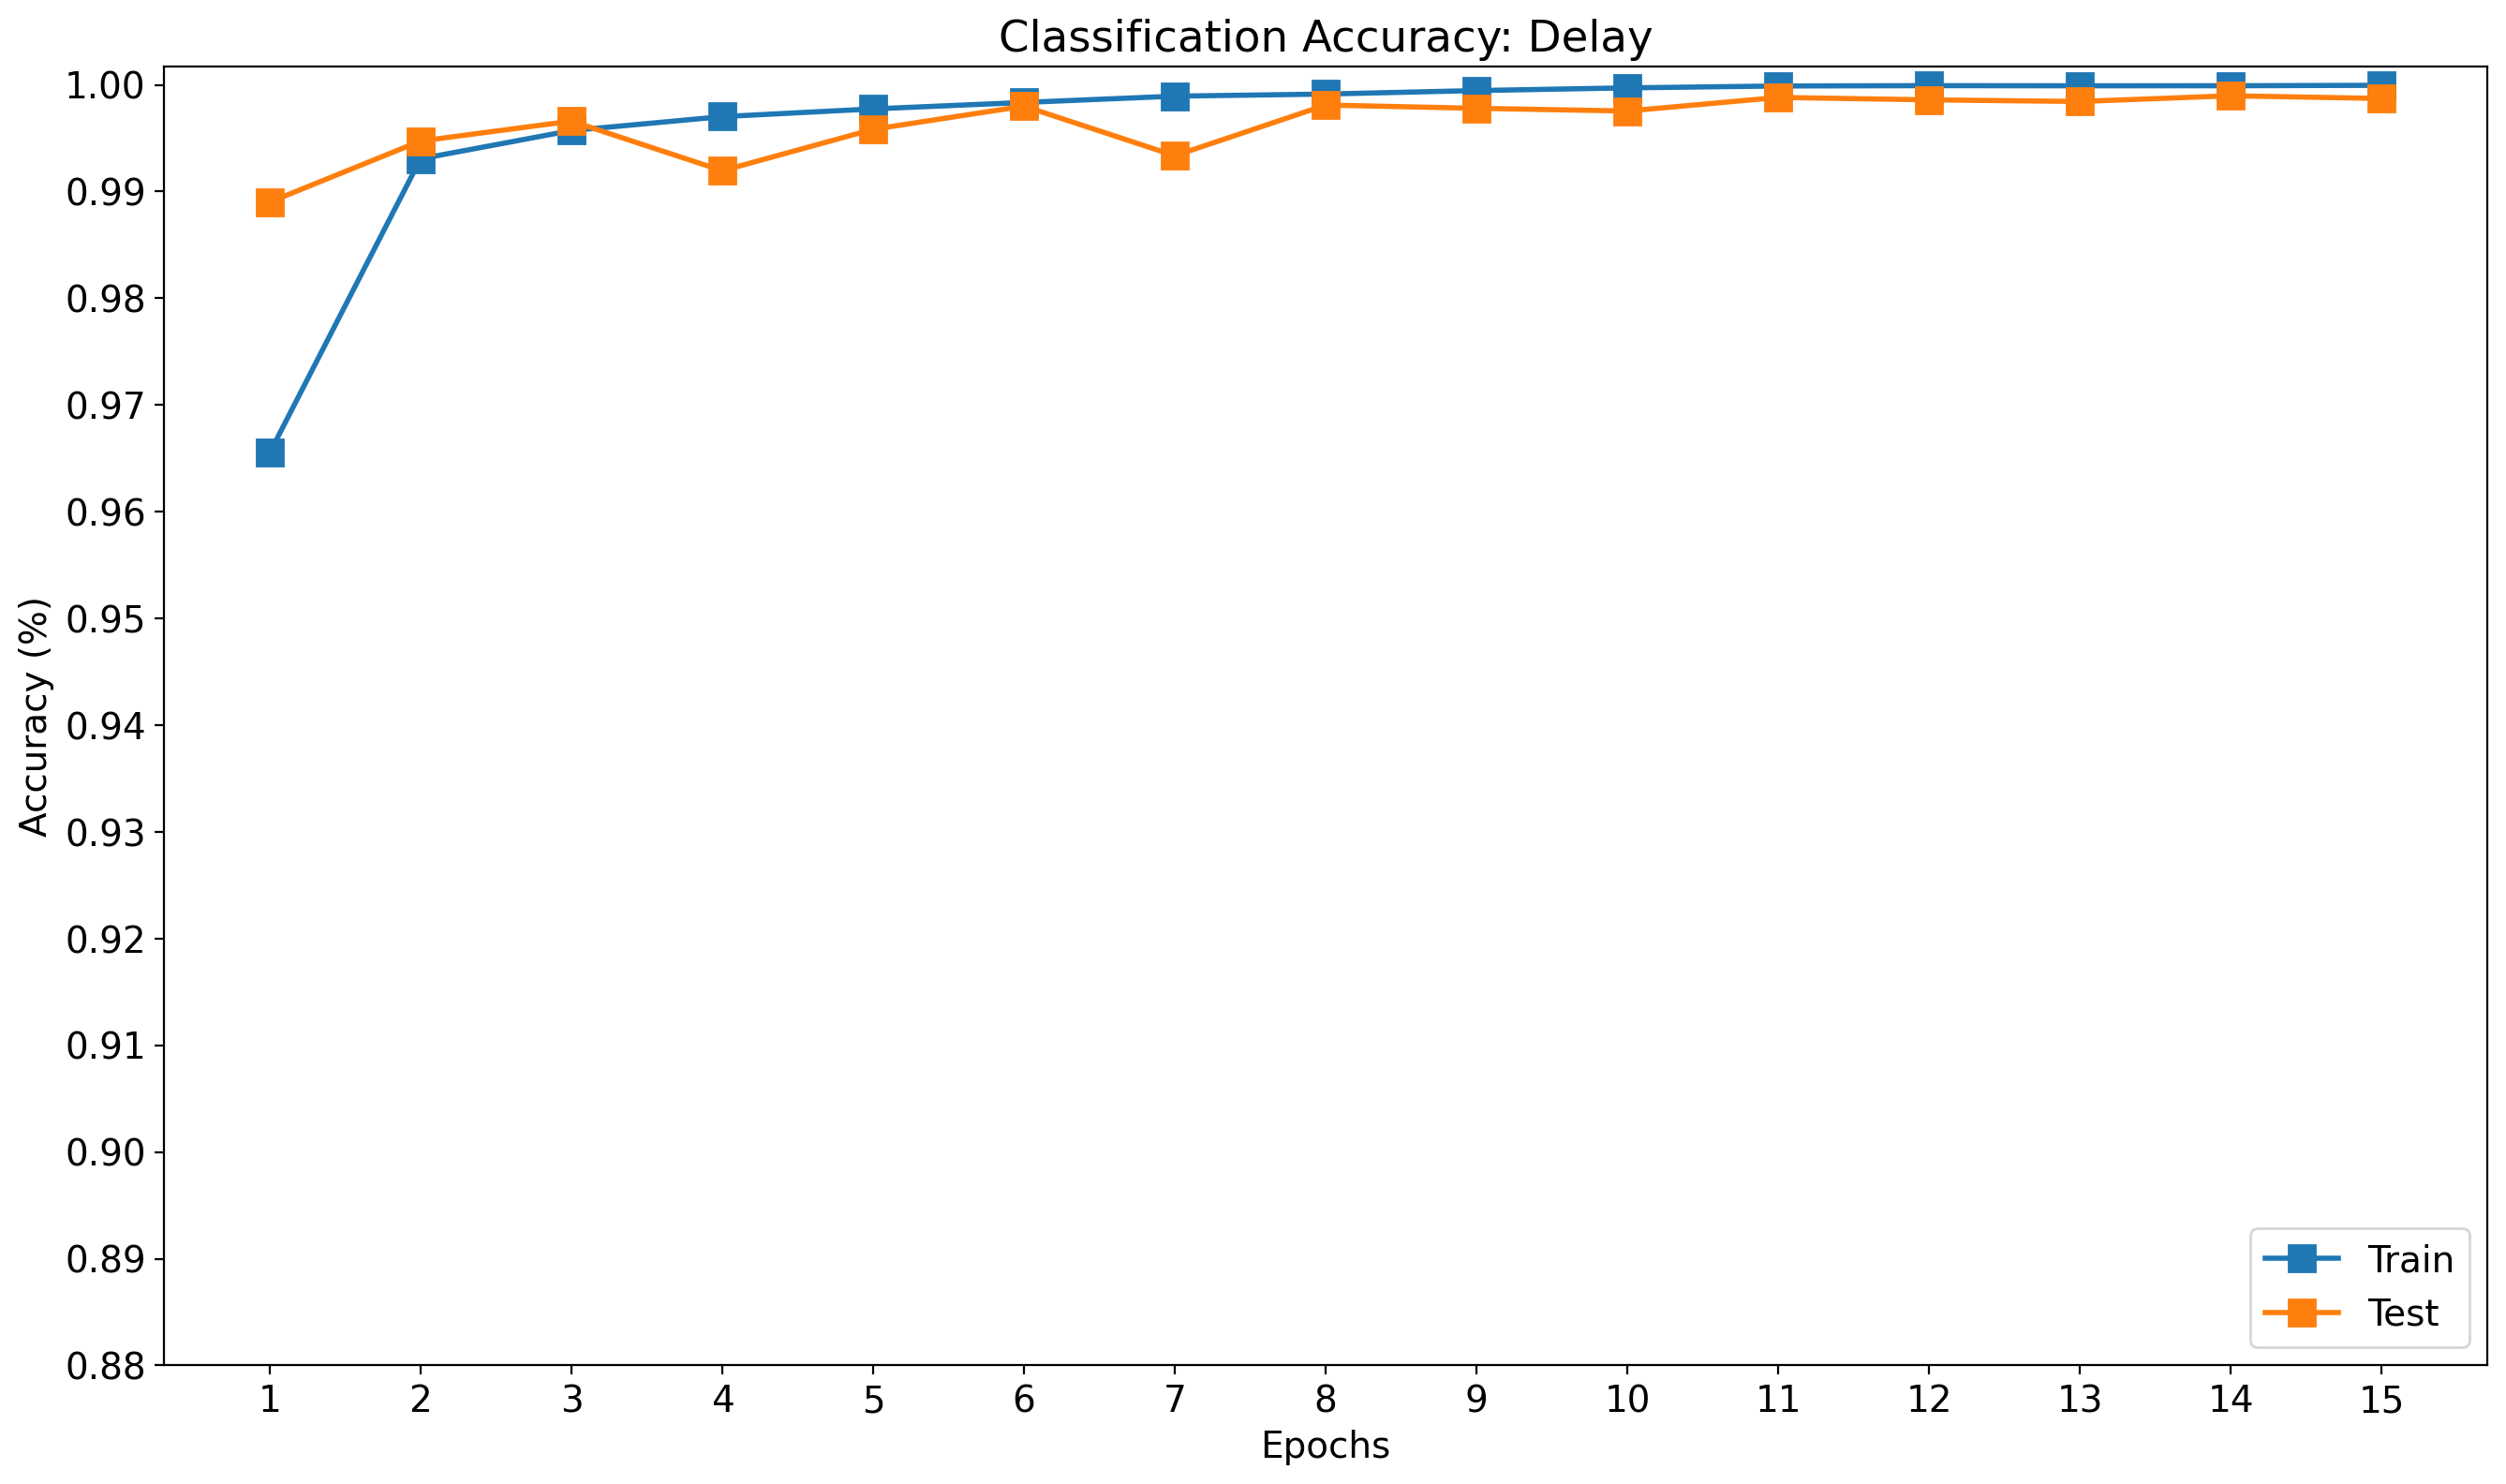

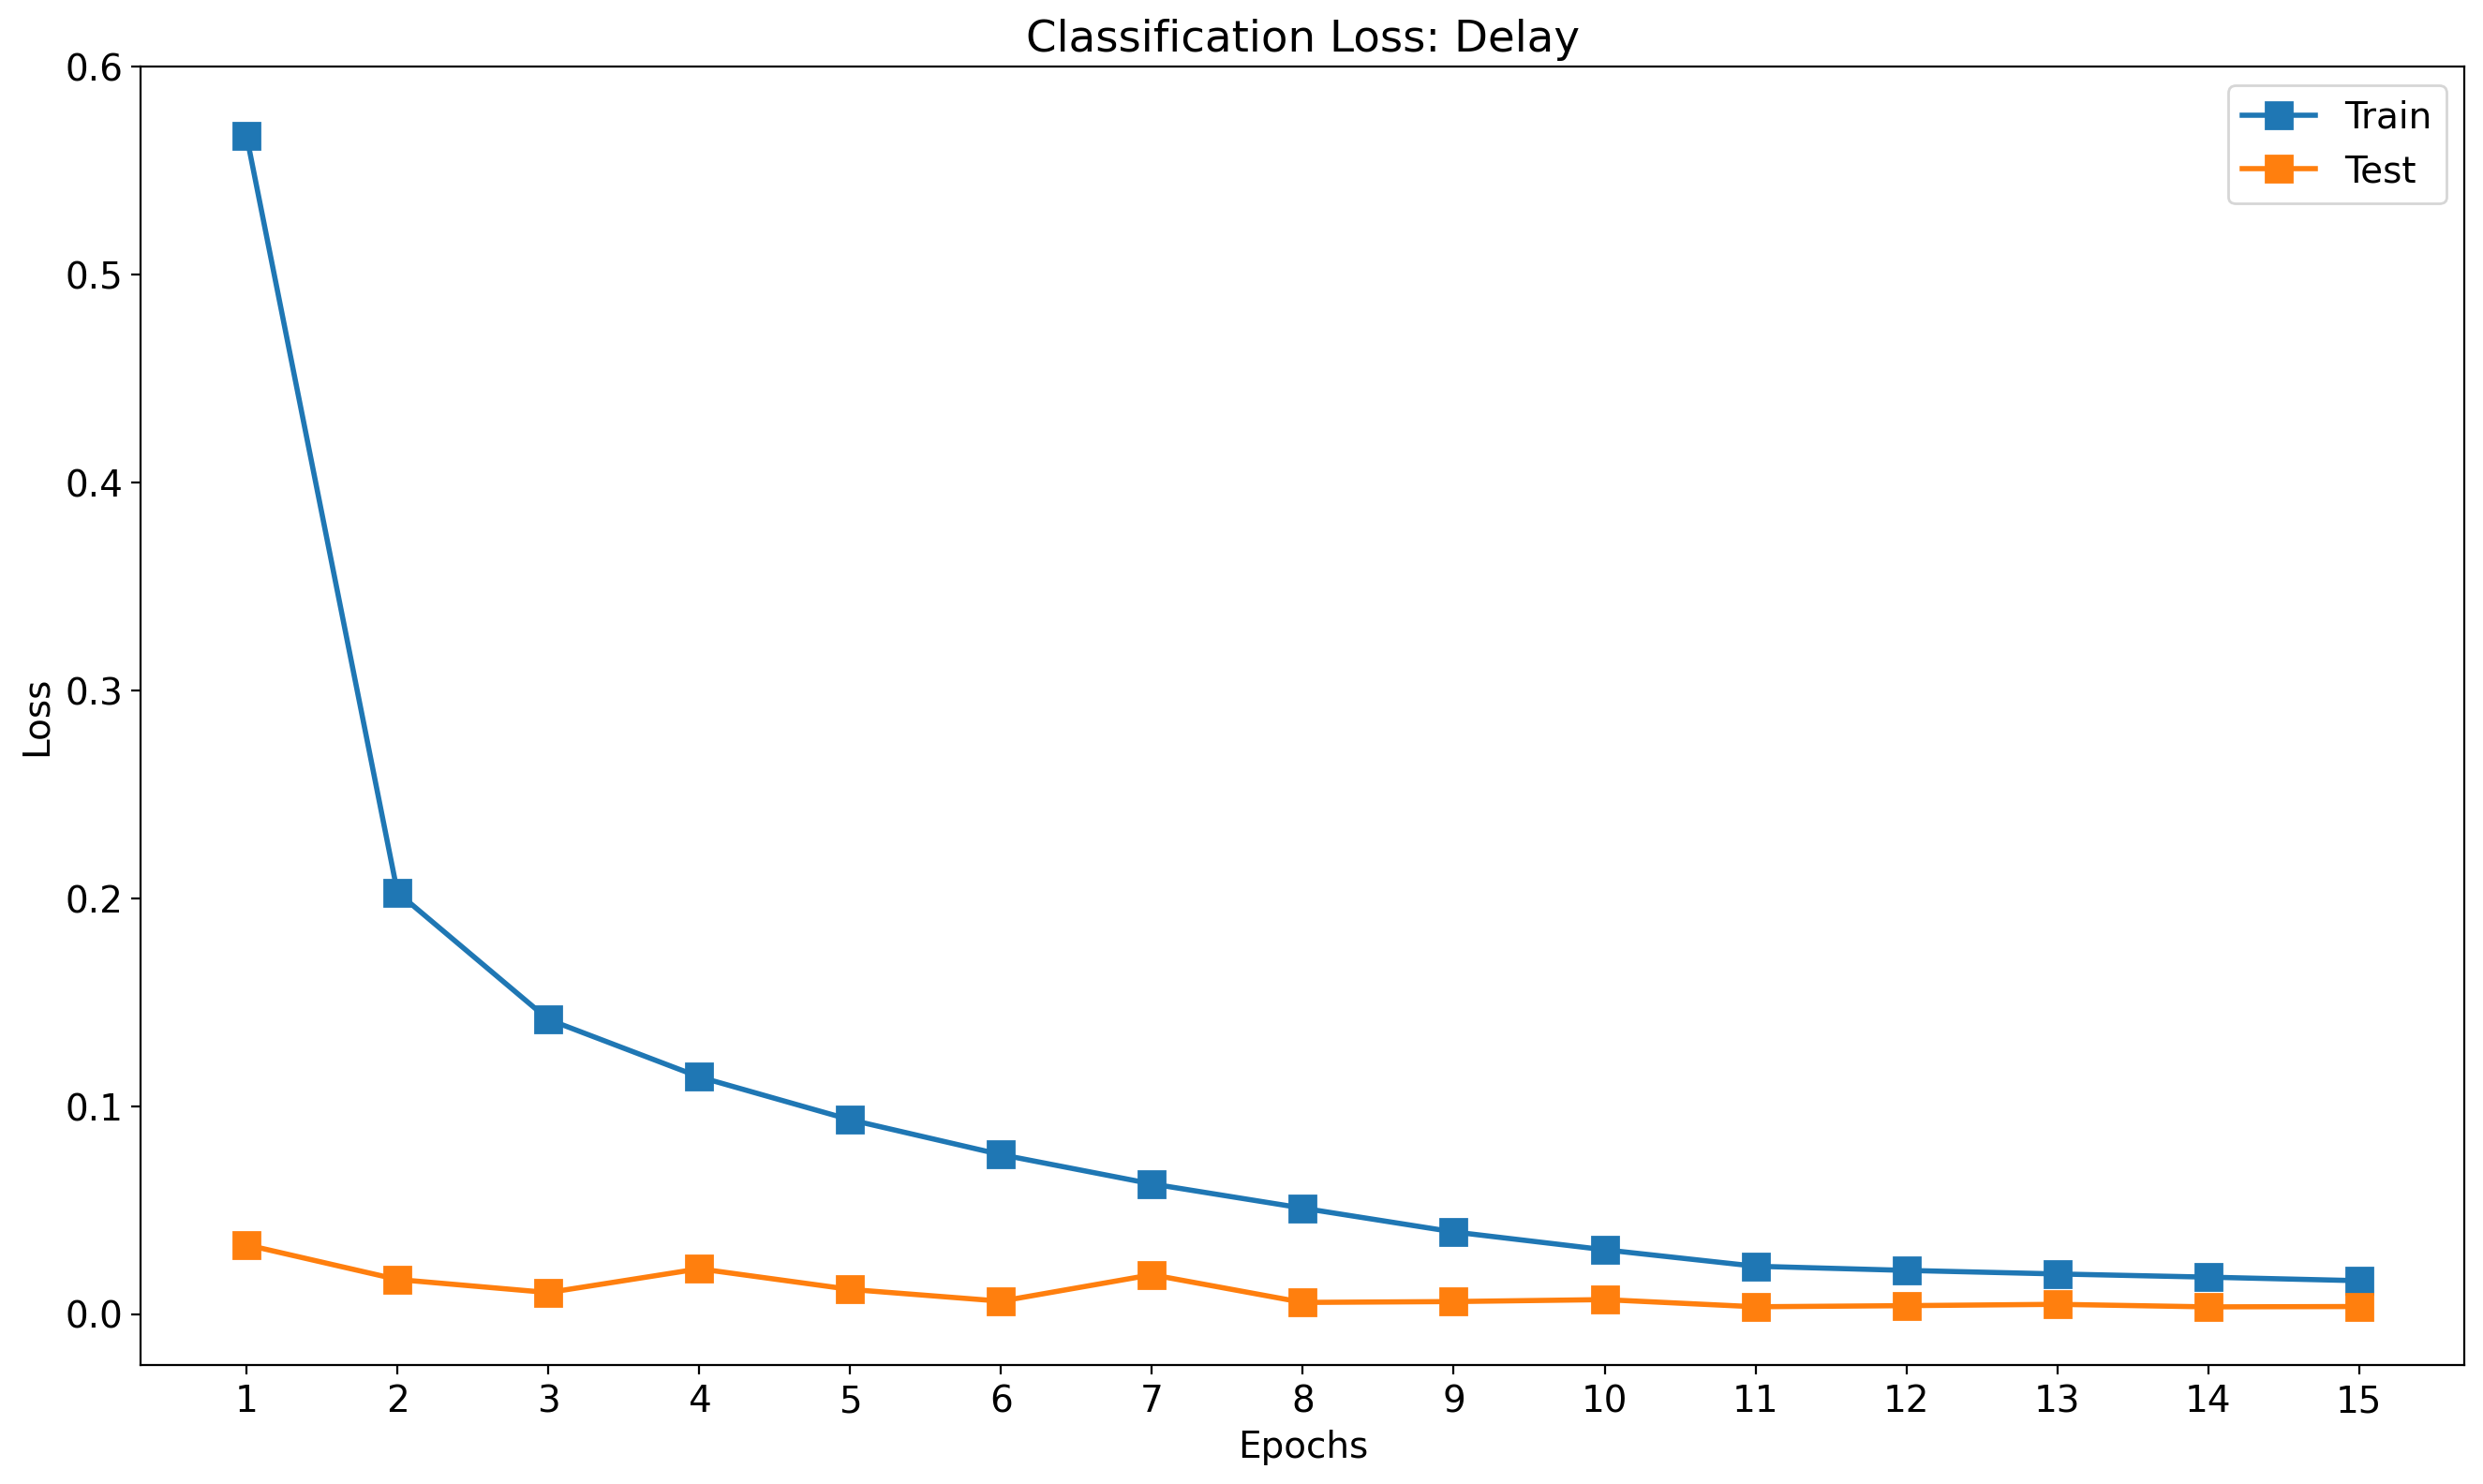

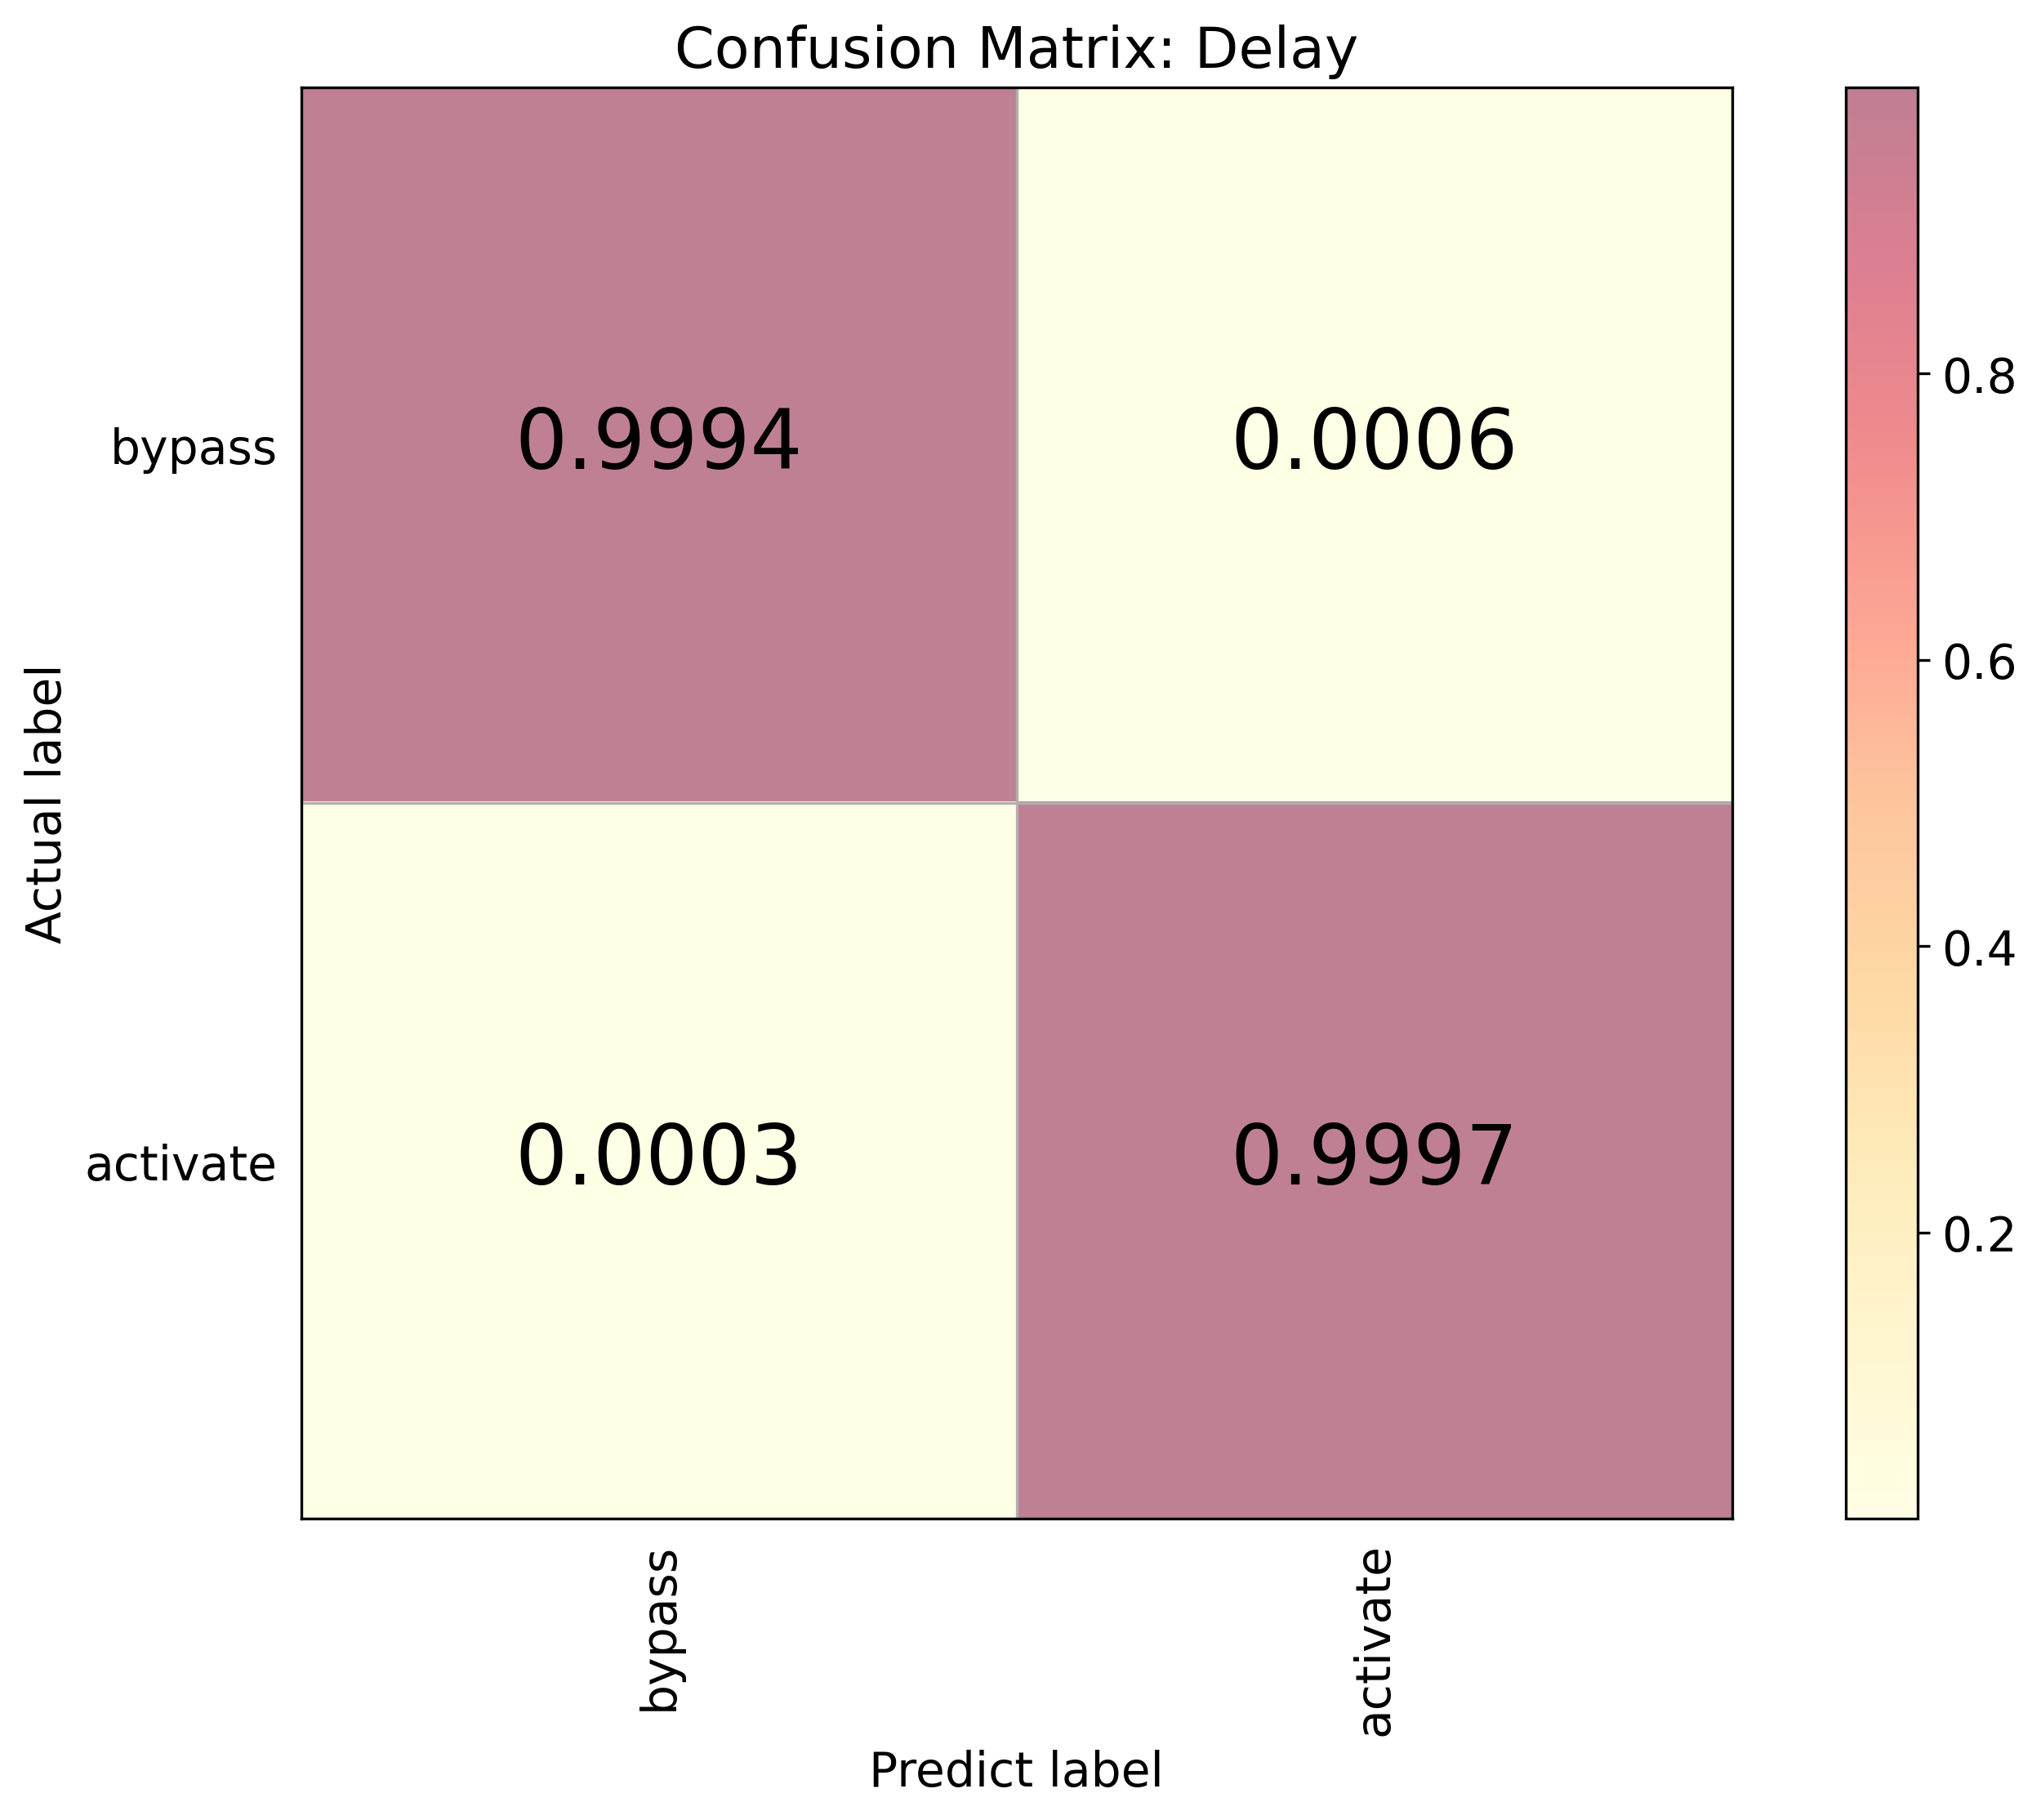

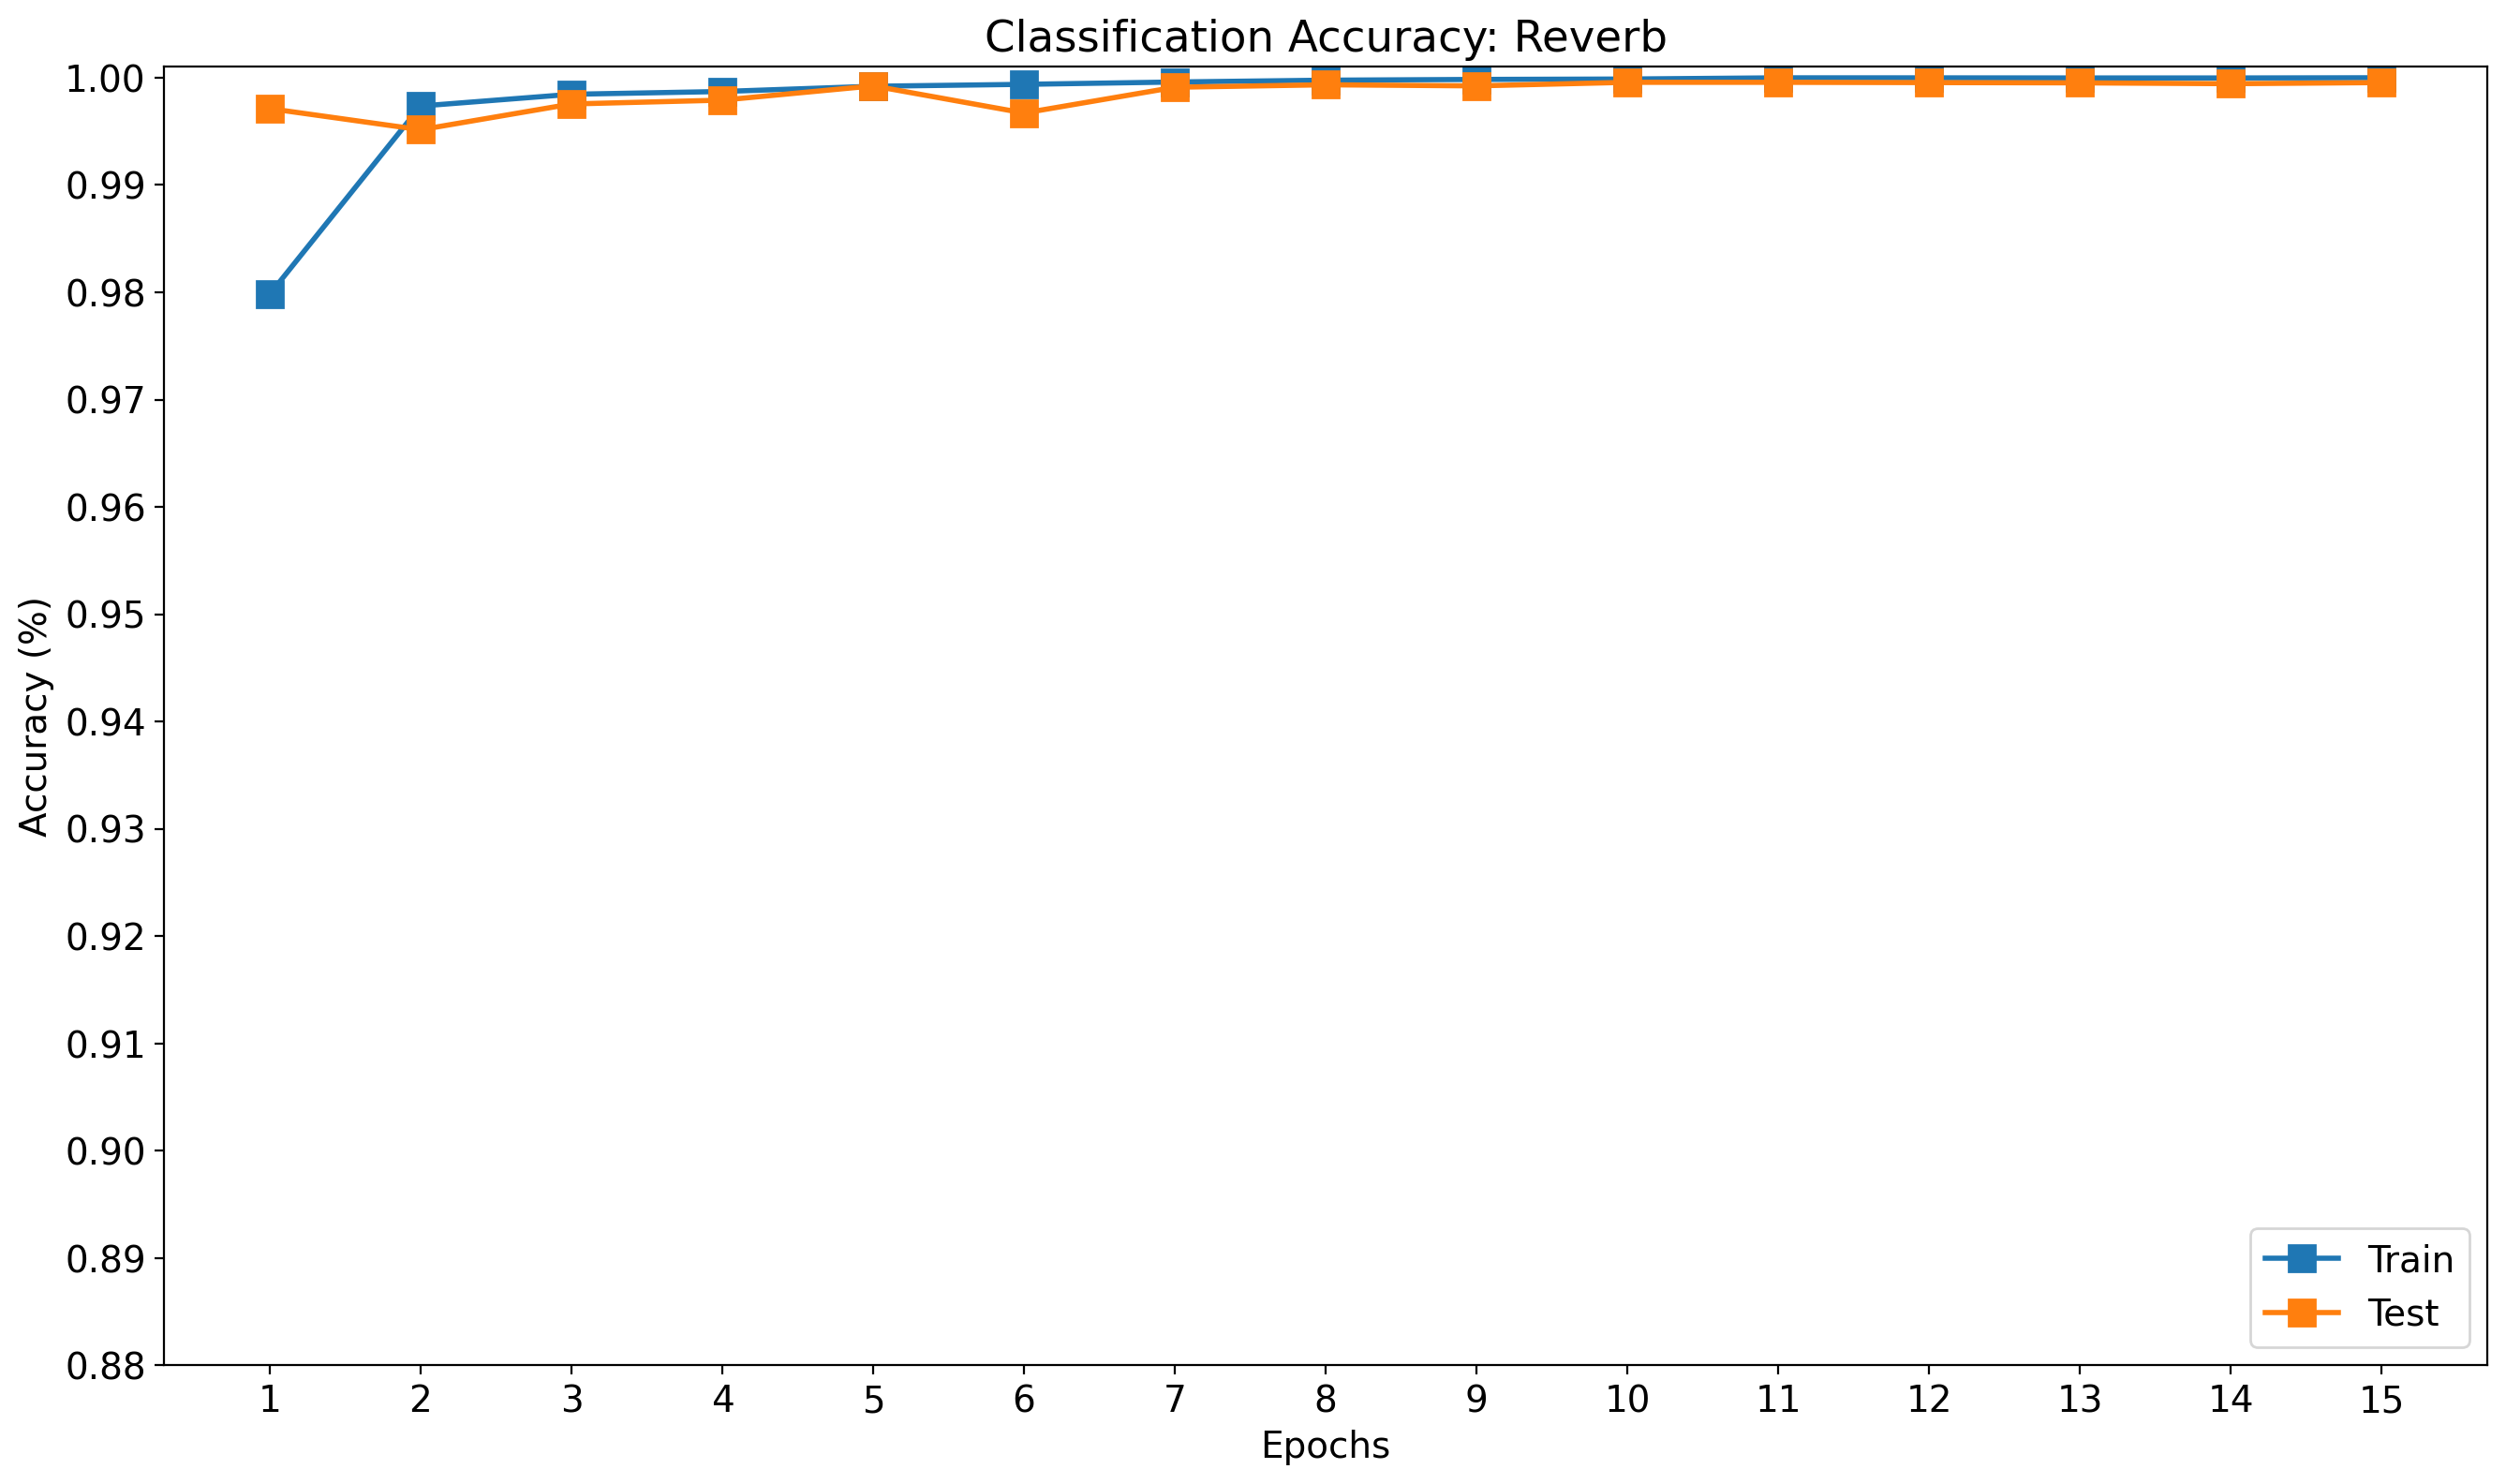

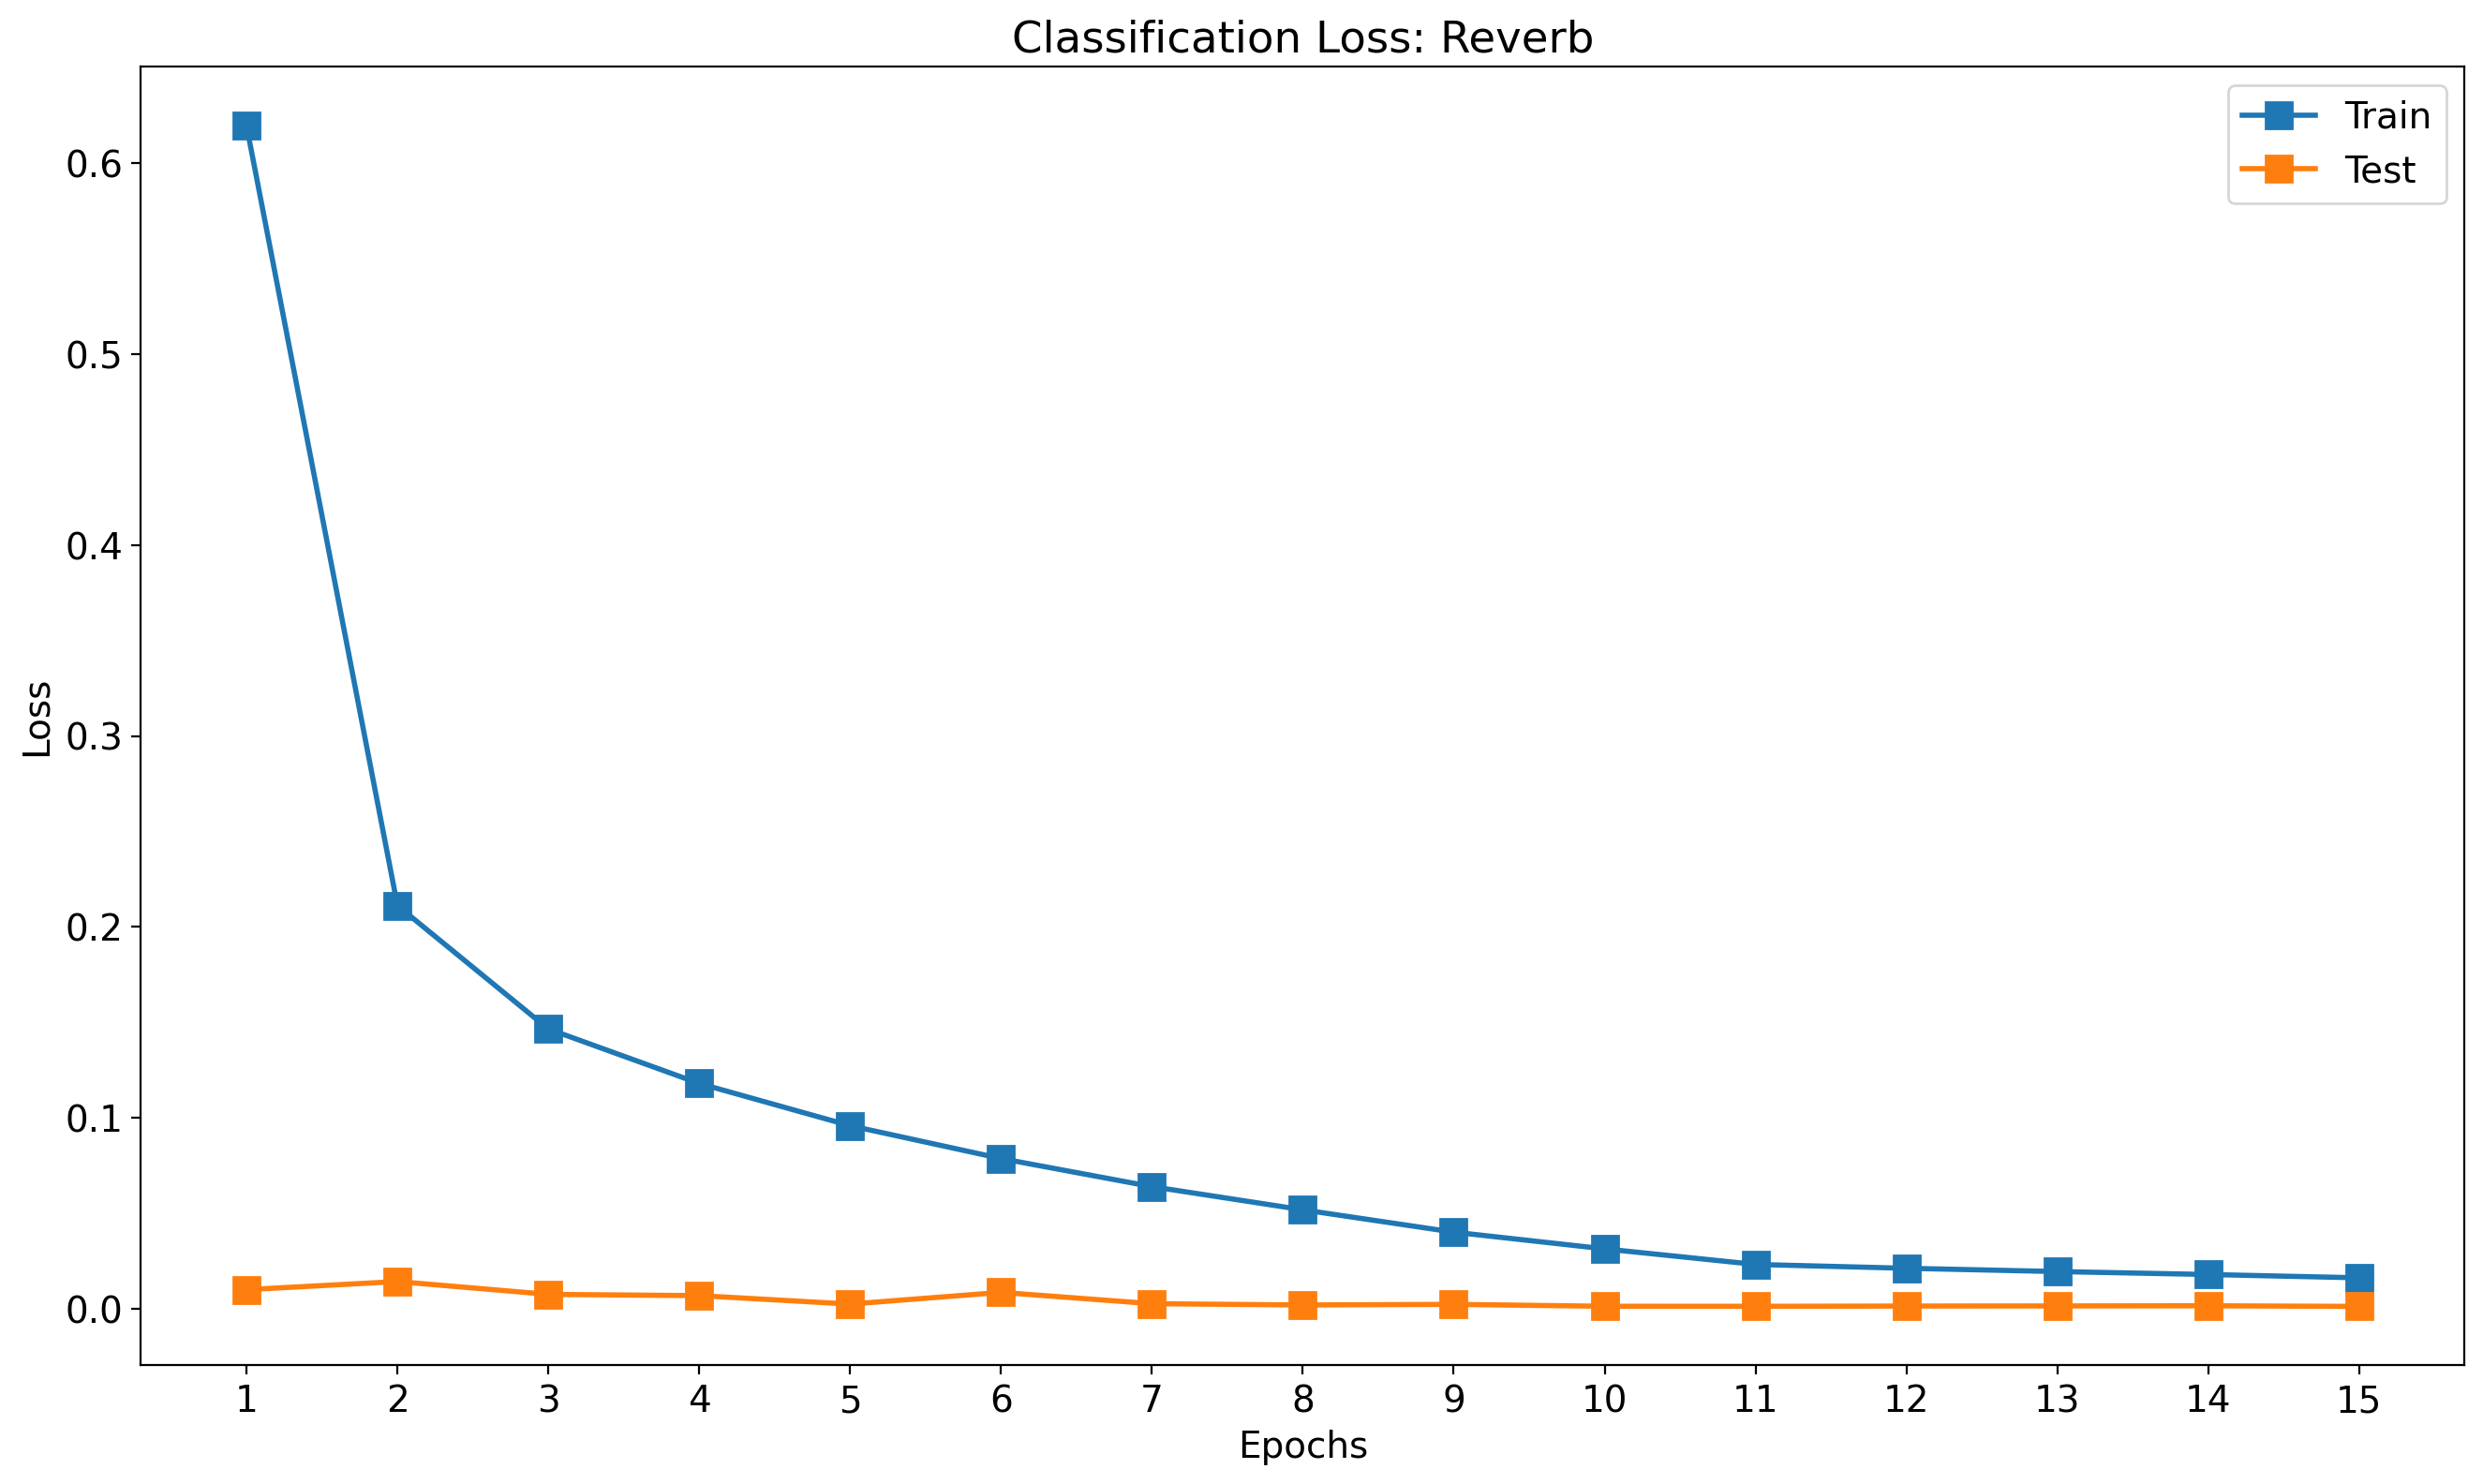

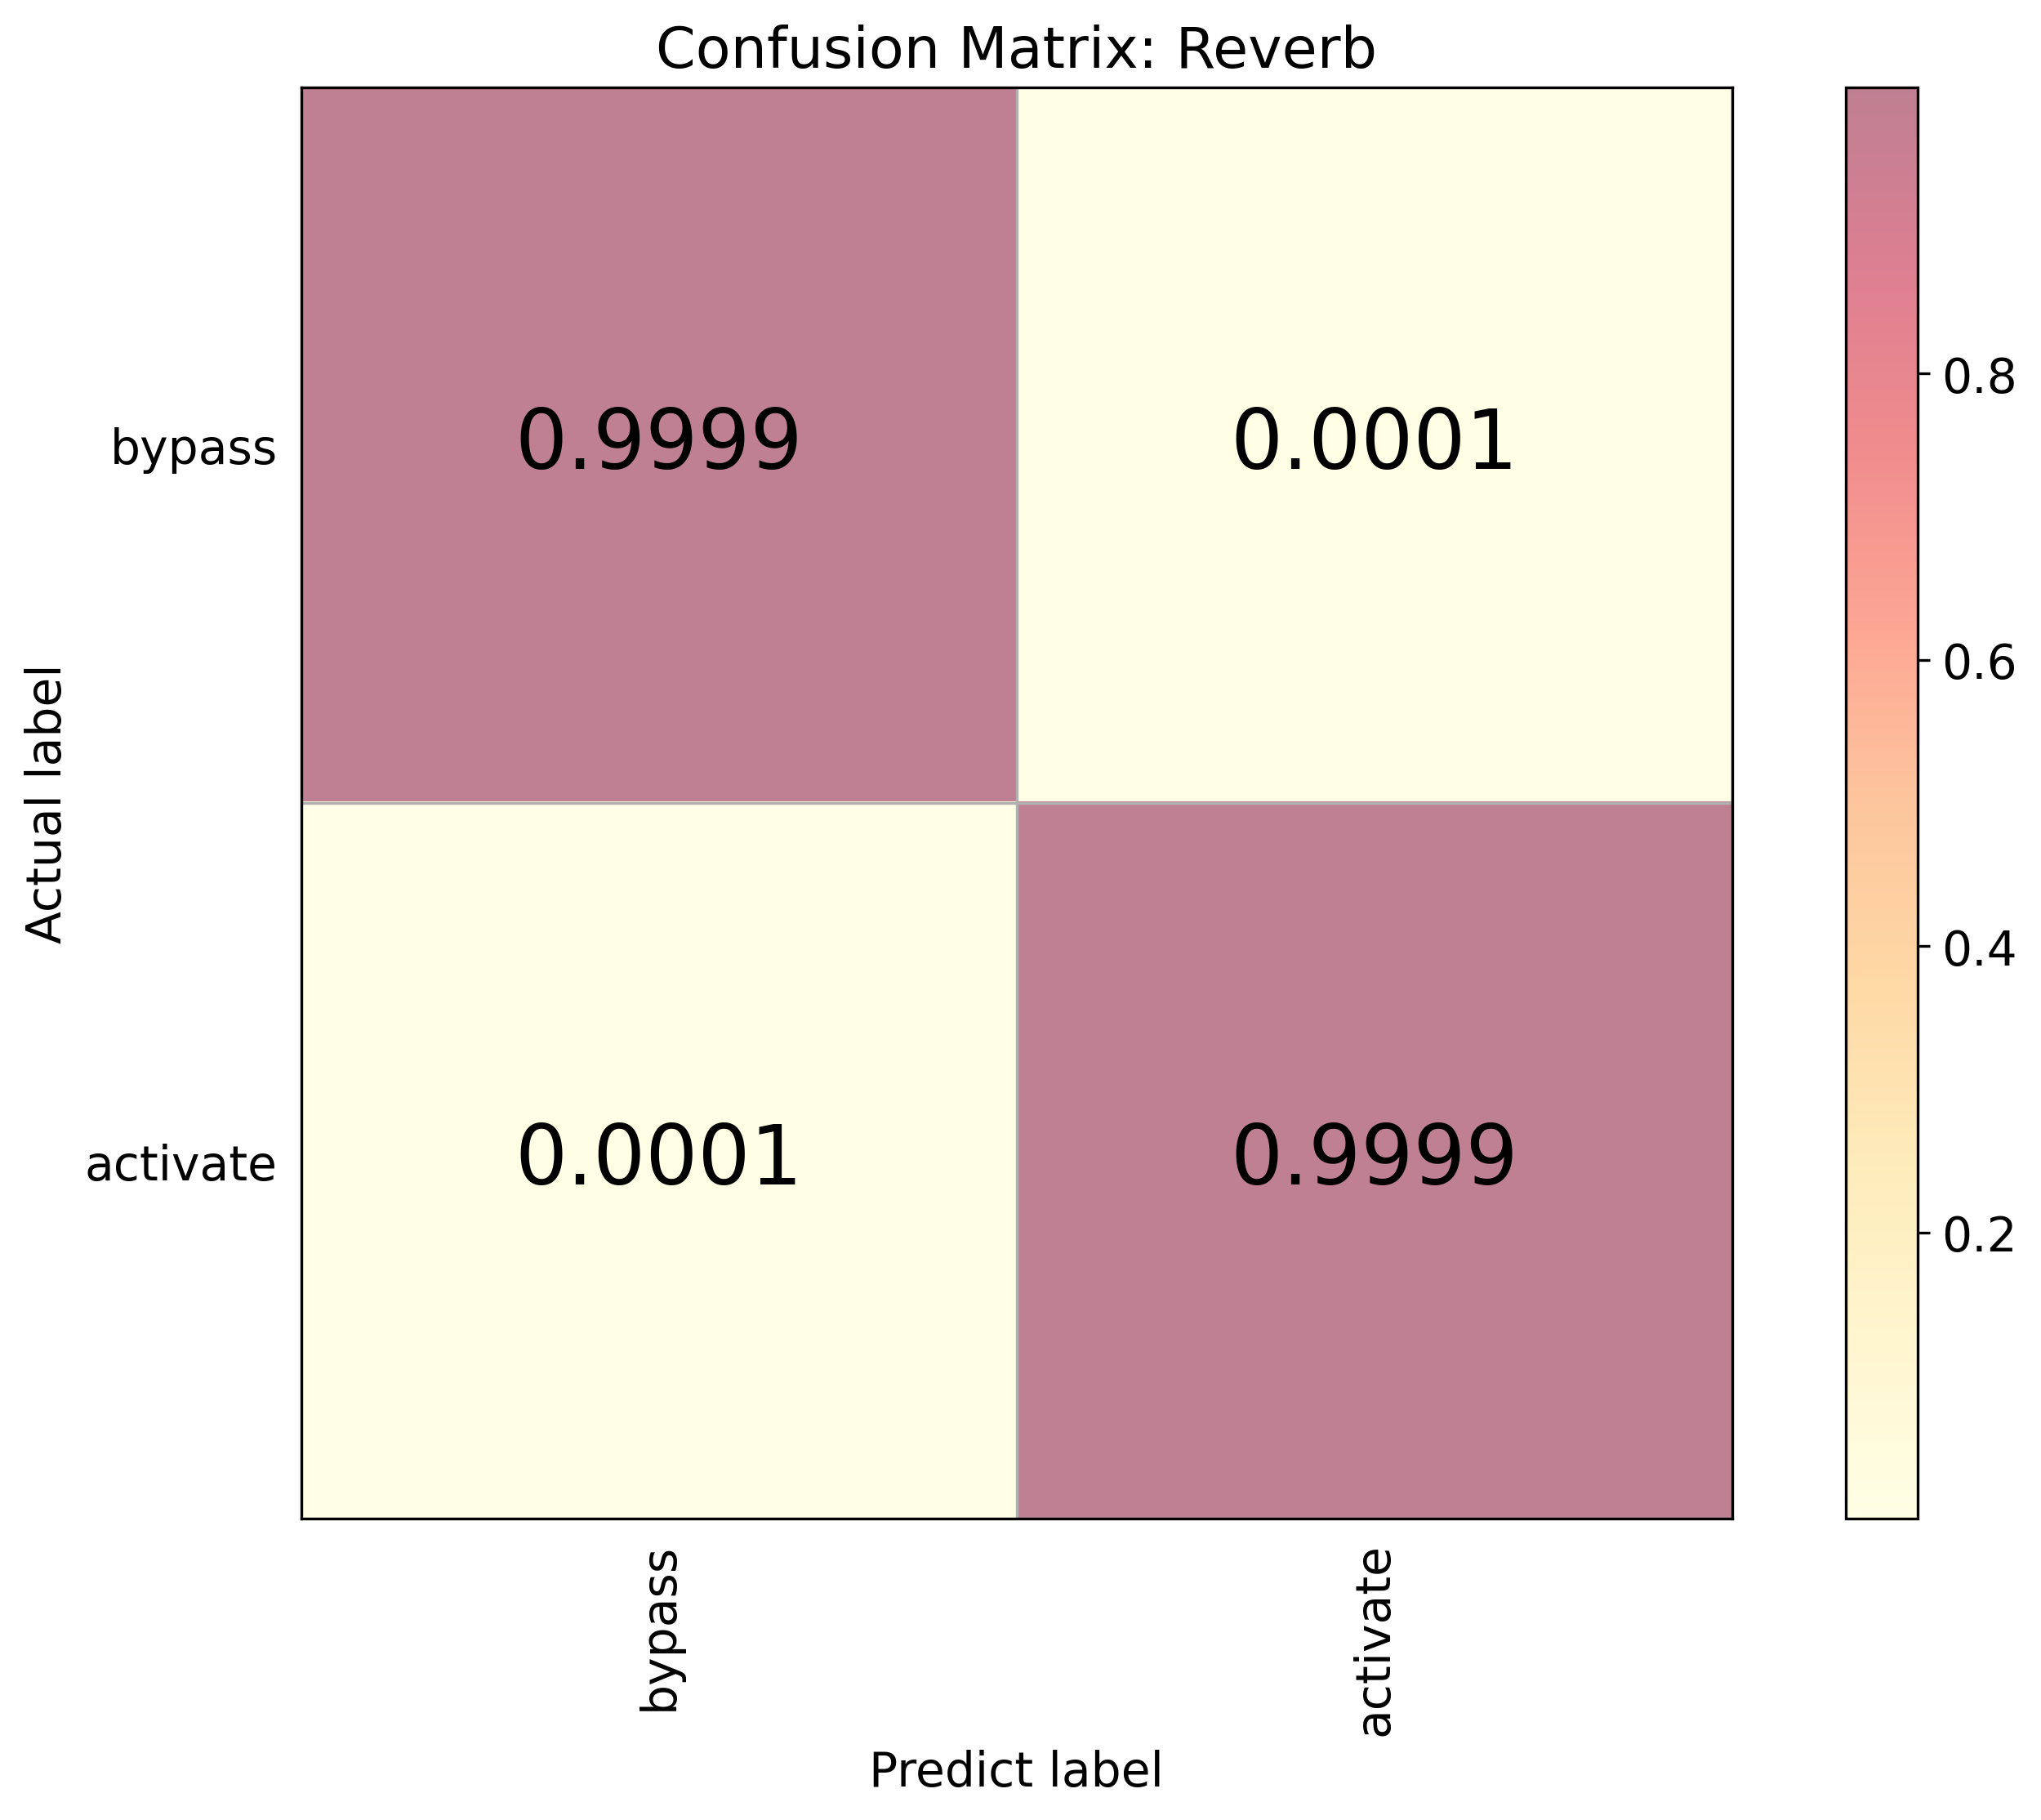

Accuracy  Precision  Recall  F1_score
Distortion    0.9998     0.9997  1.0000    0.9999
Chorus        0.9986     0.9984  0.9990    0.9987
Tremolo       0.9940     0.9974  0.9914    0.9944
Delay         0.9996     0.9995  0.9997    0.9996
Reverb        0.9999     0.9999  0.9999    0.9999

In [3]:
TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/c53_classify/'

LABELS_ID = ['bypass', 'activate']
EFFECT_MAP = ["Distortion", "Chorus", "Tremolo", "Delay", "Reverb"]

error_list = []

for i in range(5):

    acc, loss = load_train_data(TRAIN_DIR + 'c53_classify/' + str(i) + '_')
    error = np.load(EVUAL_DIR + 'c53_classify_' + str(i) + '_evaluation.npy')

    acc_fig = plot_train_line(data=acc,
                    num_subplot=1,
                    subtitle="Classification Accuracy: " + EFFECT_MAP[i],
                    legend_loc='lower right',
                    x_label='Epochs',
                    y_label='Accuracy (%)',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0.88, 1.01, 0.01),
                    hight=9, 
                    width=16)

    loss_fig = plot_train_line(data=loss,
                    num_subplot=1,
                    subtitle="Classification Loss: " + EFFECT_MAP[i],
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Loss',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0, 0.7, 0.1),
                    hight=9, 
                    width=16)

    cm_fig = plot_confusion_matrix(confusion_matrix(y_true=error[0], y_pred=error[1]),
                                        title='Confusion Matrix: ' + EFFECT_MAP[i],
                                        classes=LABELS_ID)

    acc_fig.savefig(PLOT_DIR + 'classify_acc_' + EFFECT_MAP[i] + '.png')
    loss_fig.savefig(PLOT_DIR + 'classify_loss_' + EFFECT_MAP[i] + '.png')
    cm_fig.savefig(PLOT_DIR + 'classify_cm_' + EFFECT_MAP[i] + '.png')

    error_list.append(cm_score(error))

df = pd.DataFrame(error_list,
                  columns = ['Accuracy','Precision','Recall','F1_score'],
                  index = EFFECT_MAP)

dfi.export(df, PLOT_DIR + 'classify_cm_score.png', dpi=300)

df

### EX3: Parameter Extraction

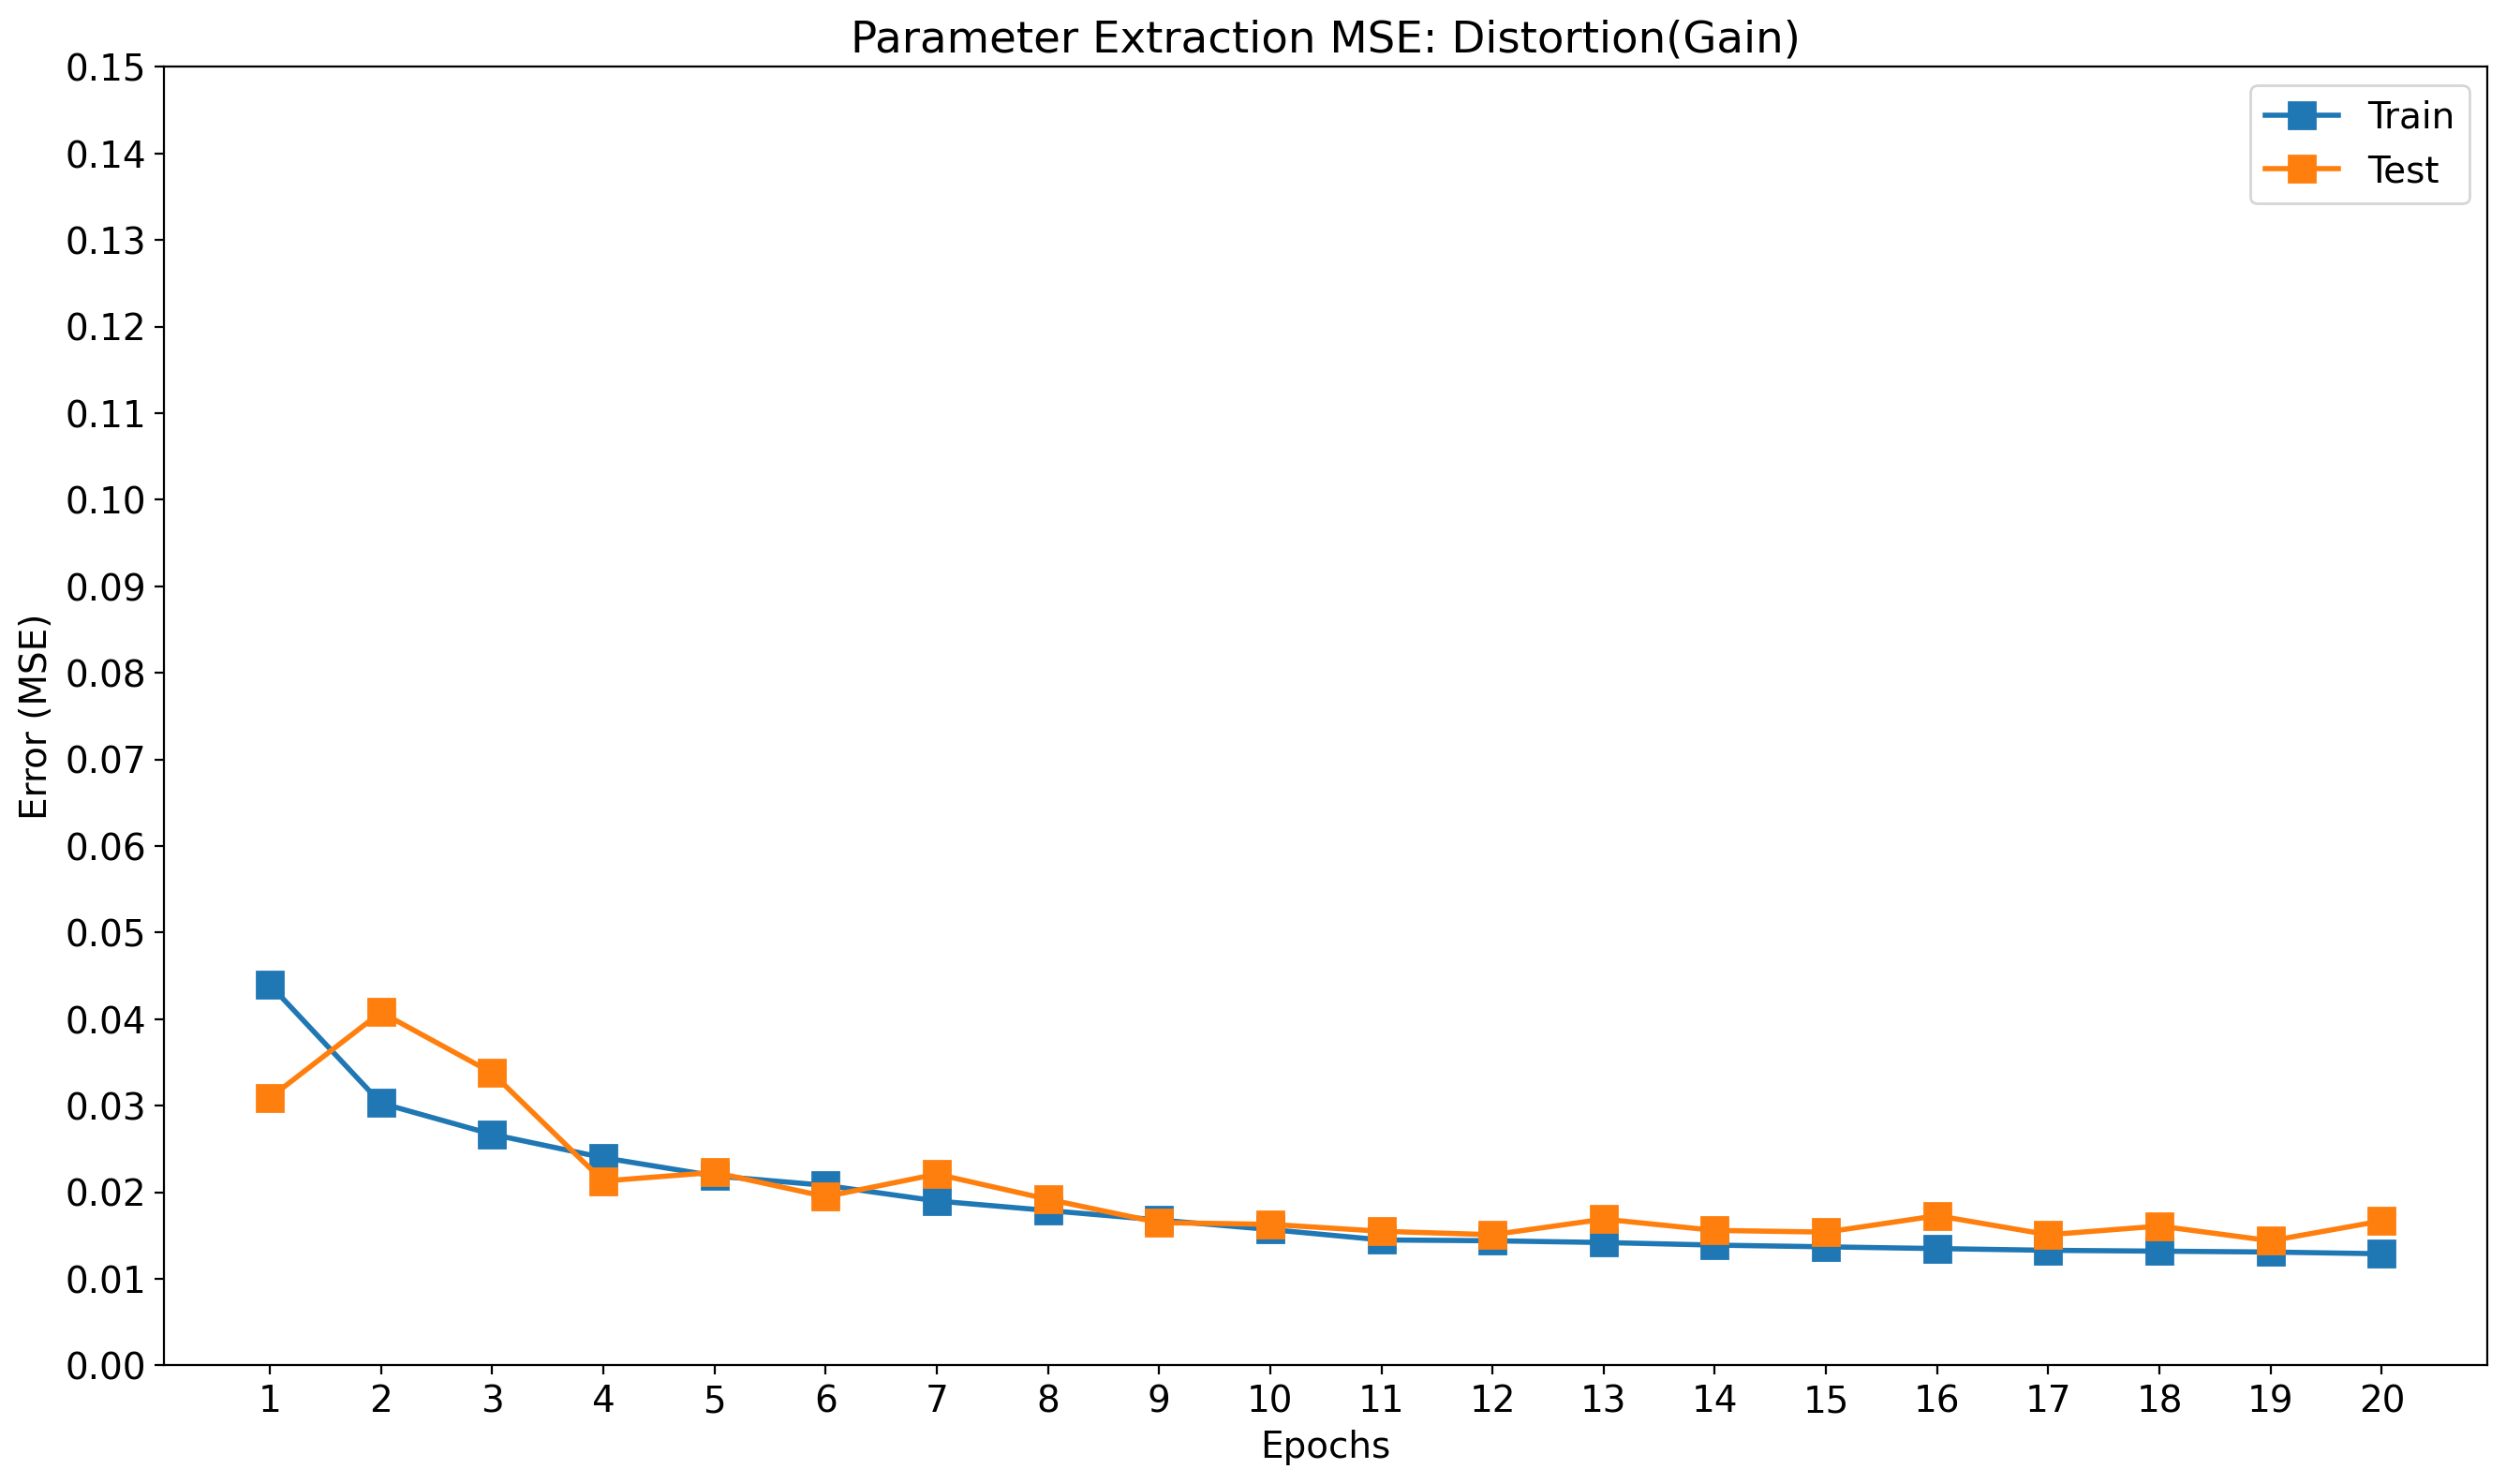

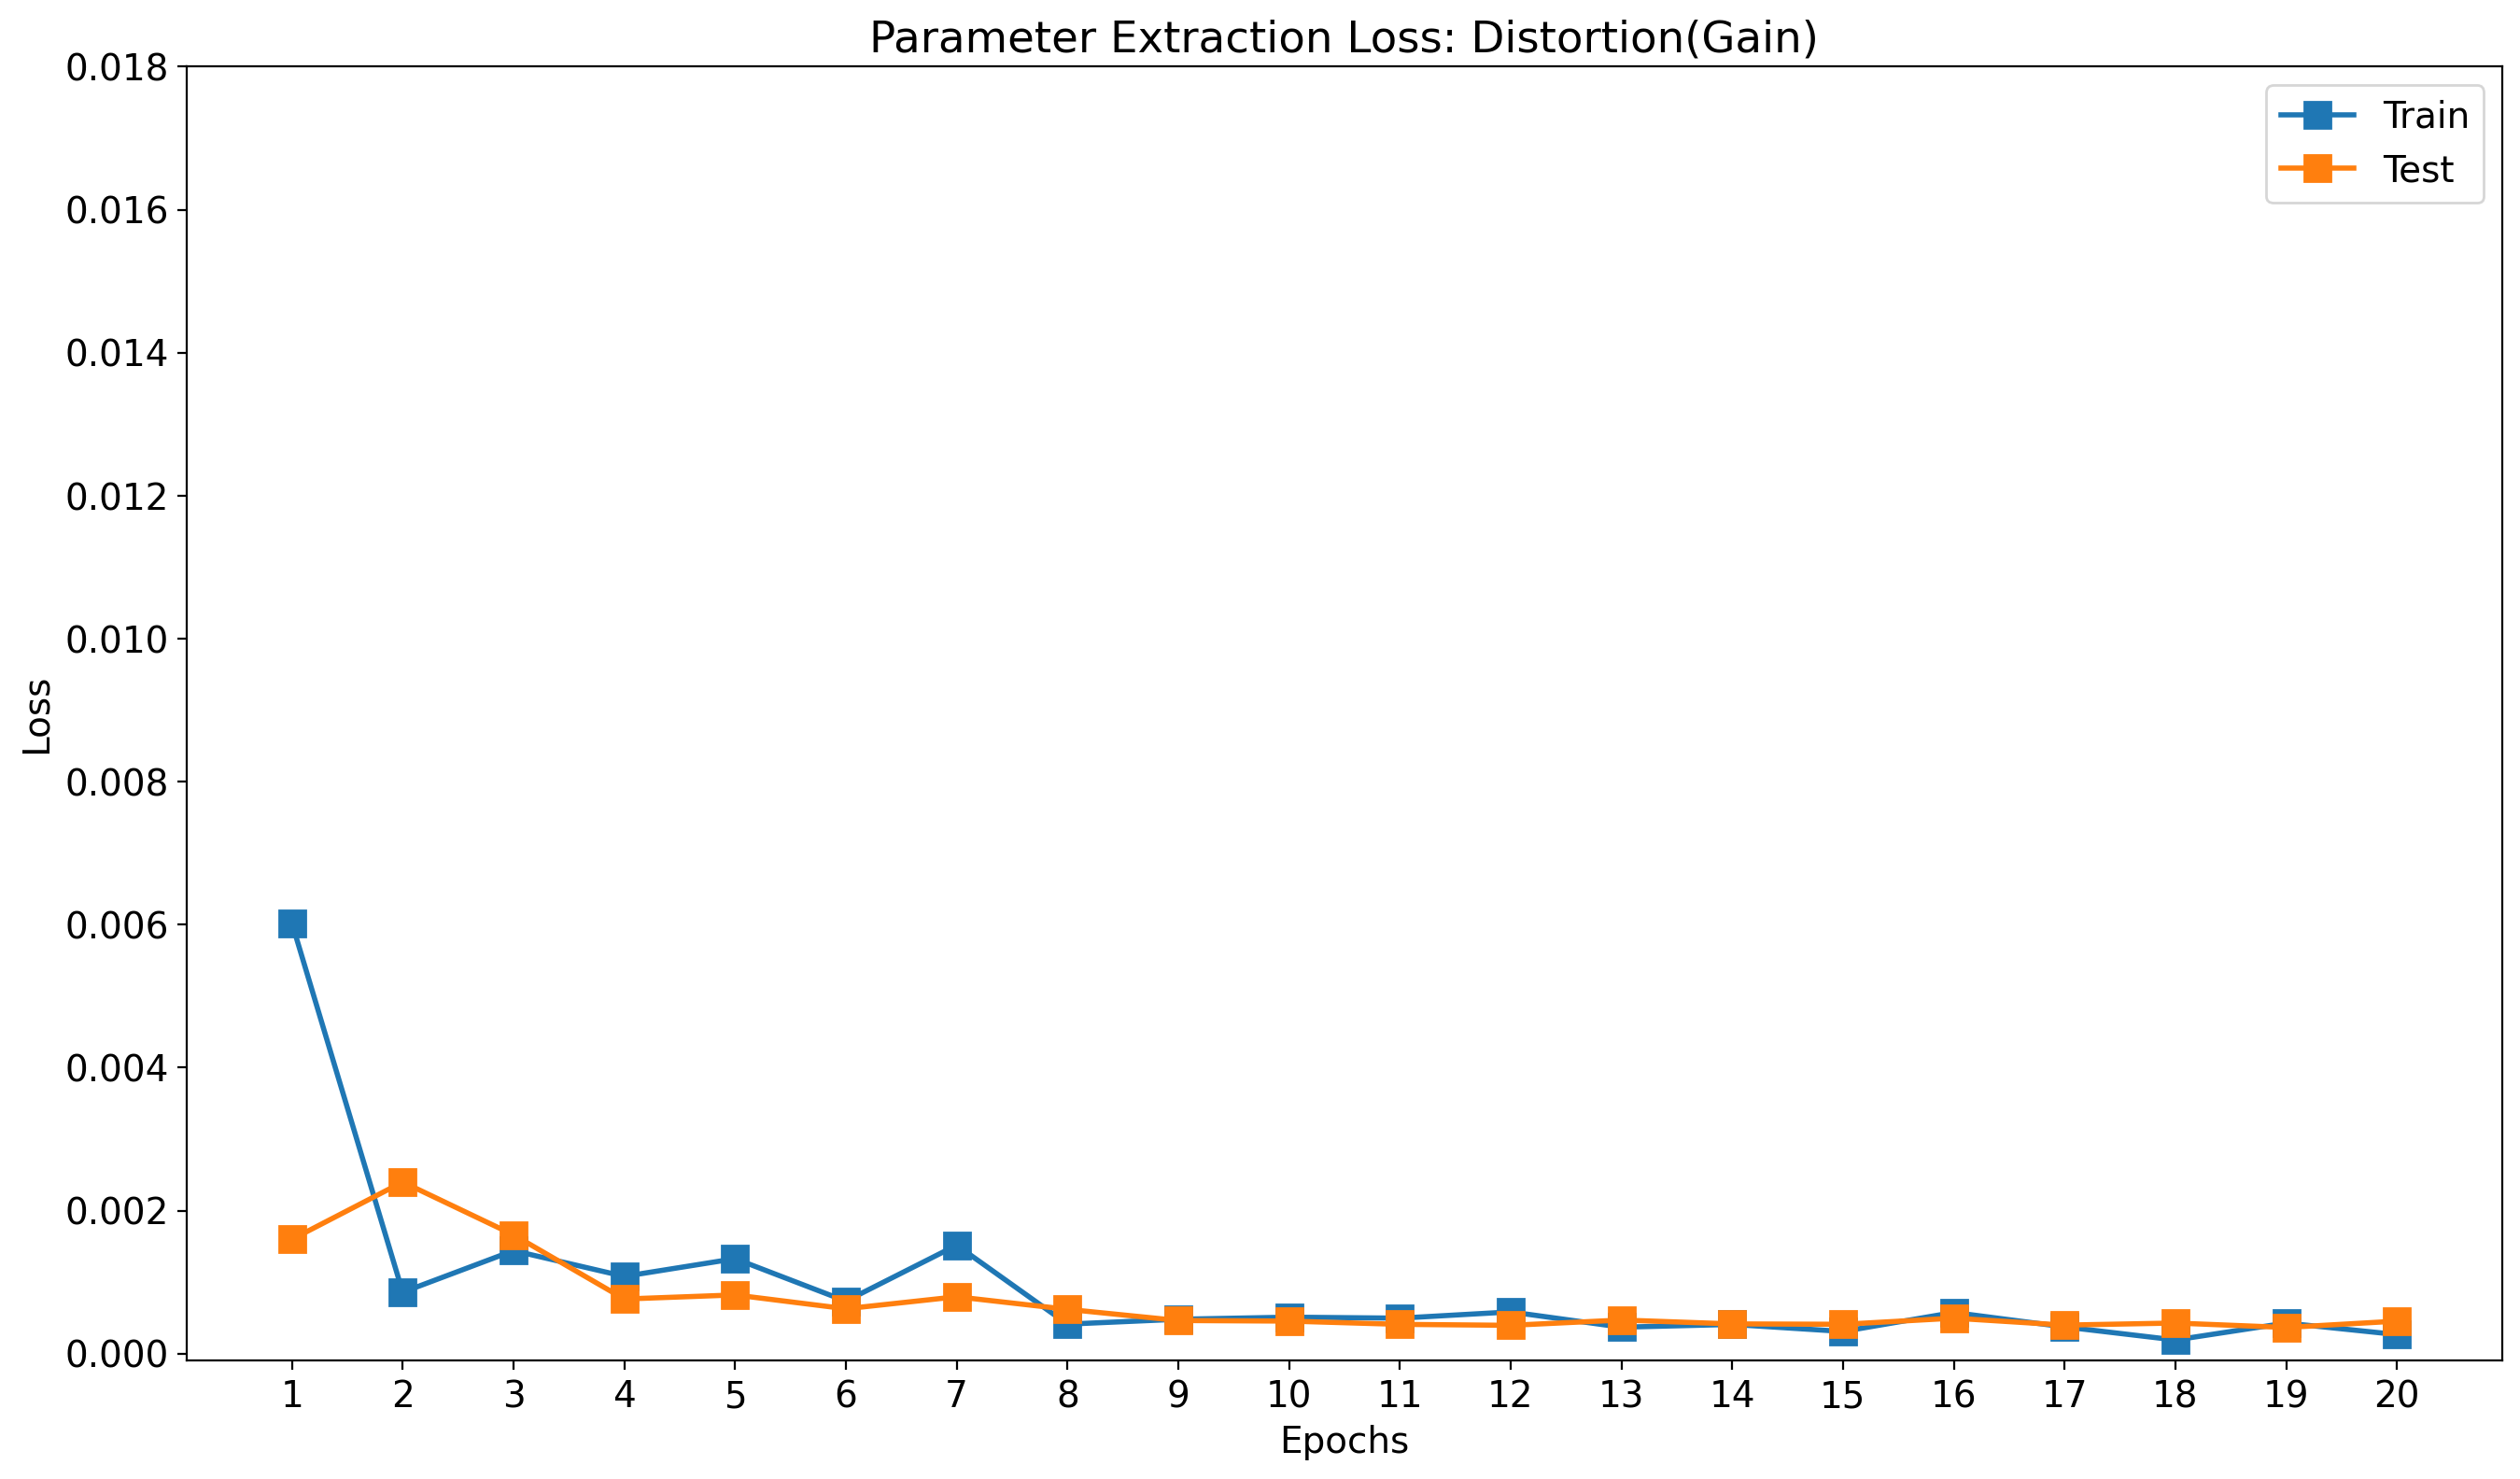

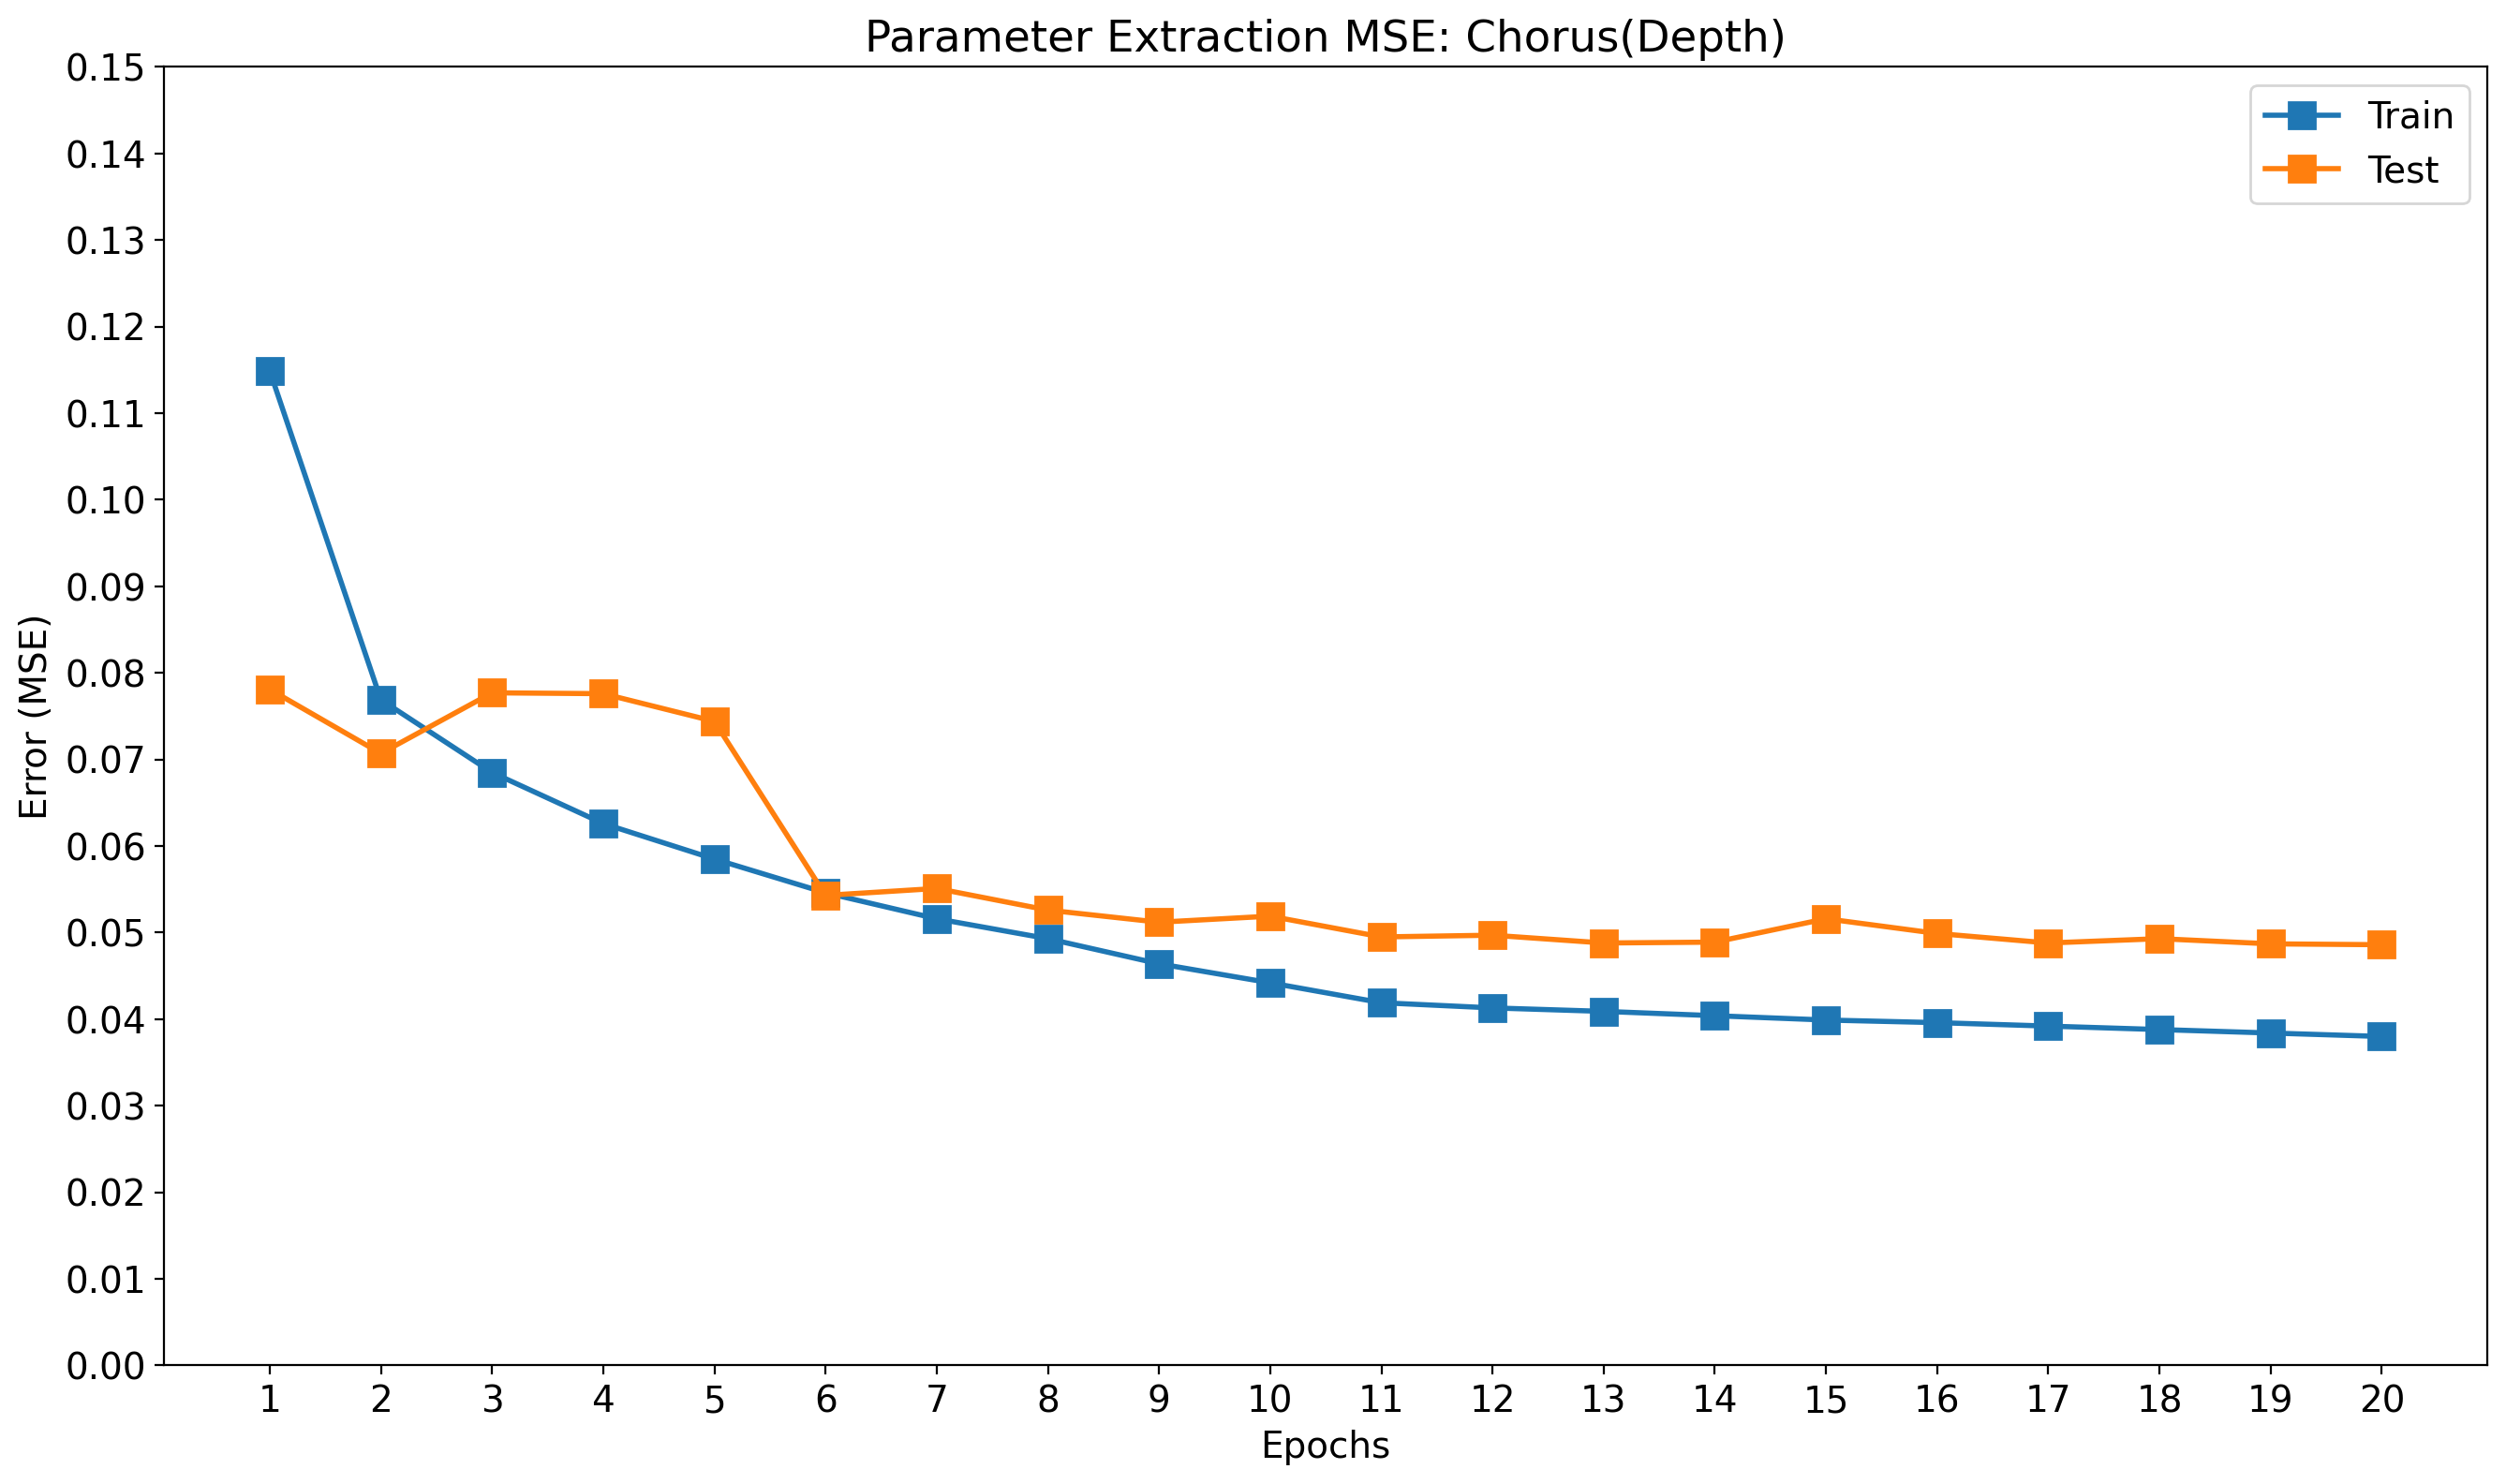

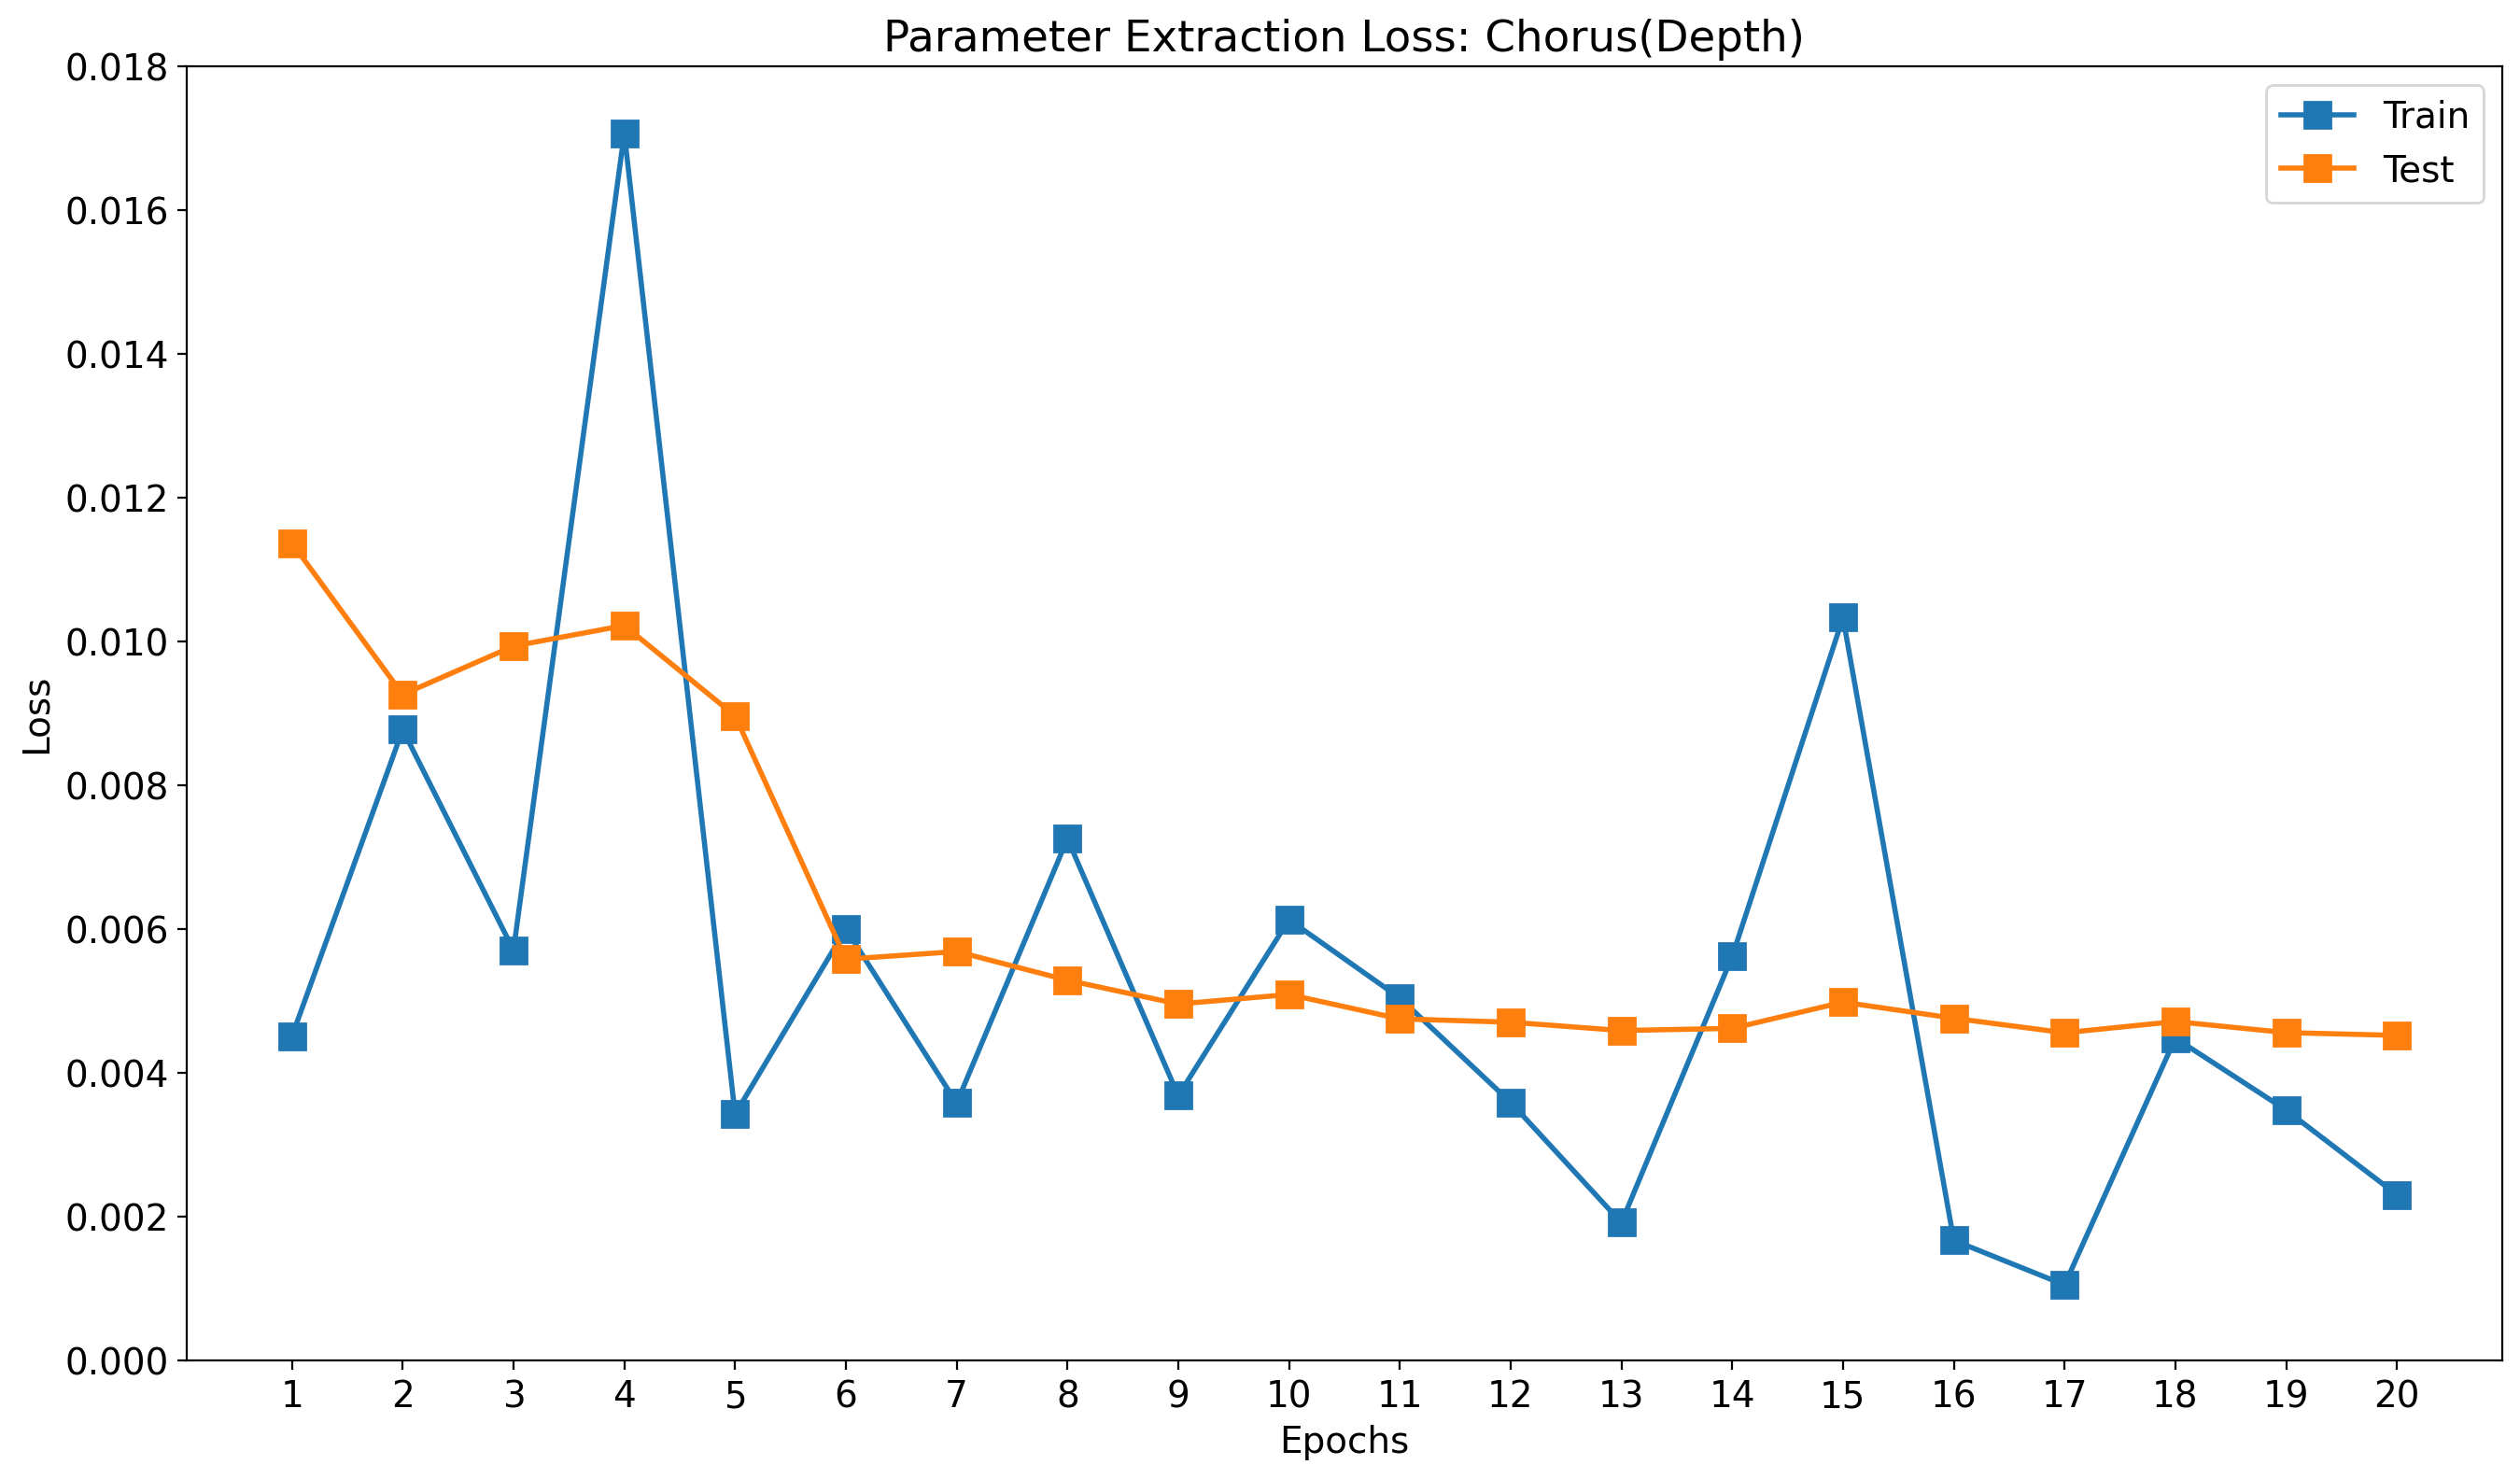

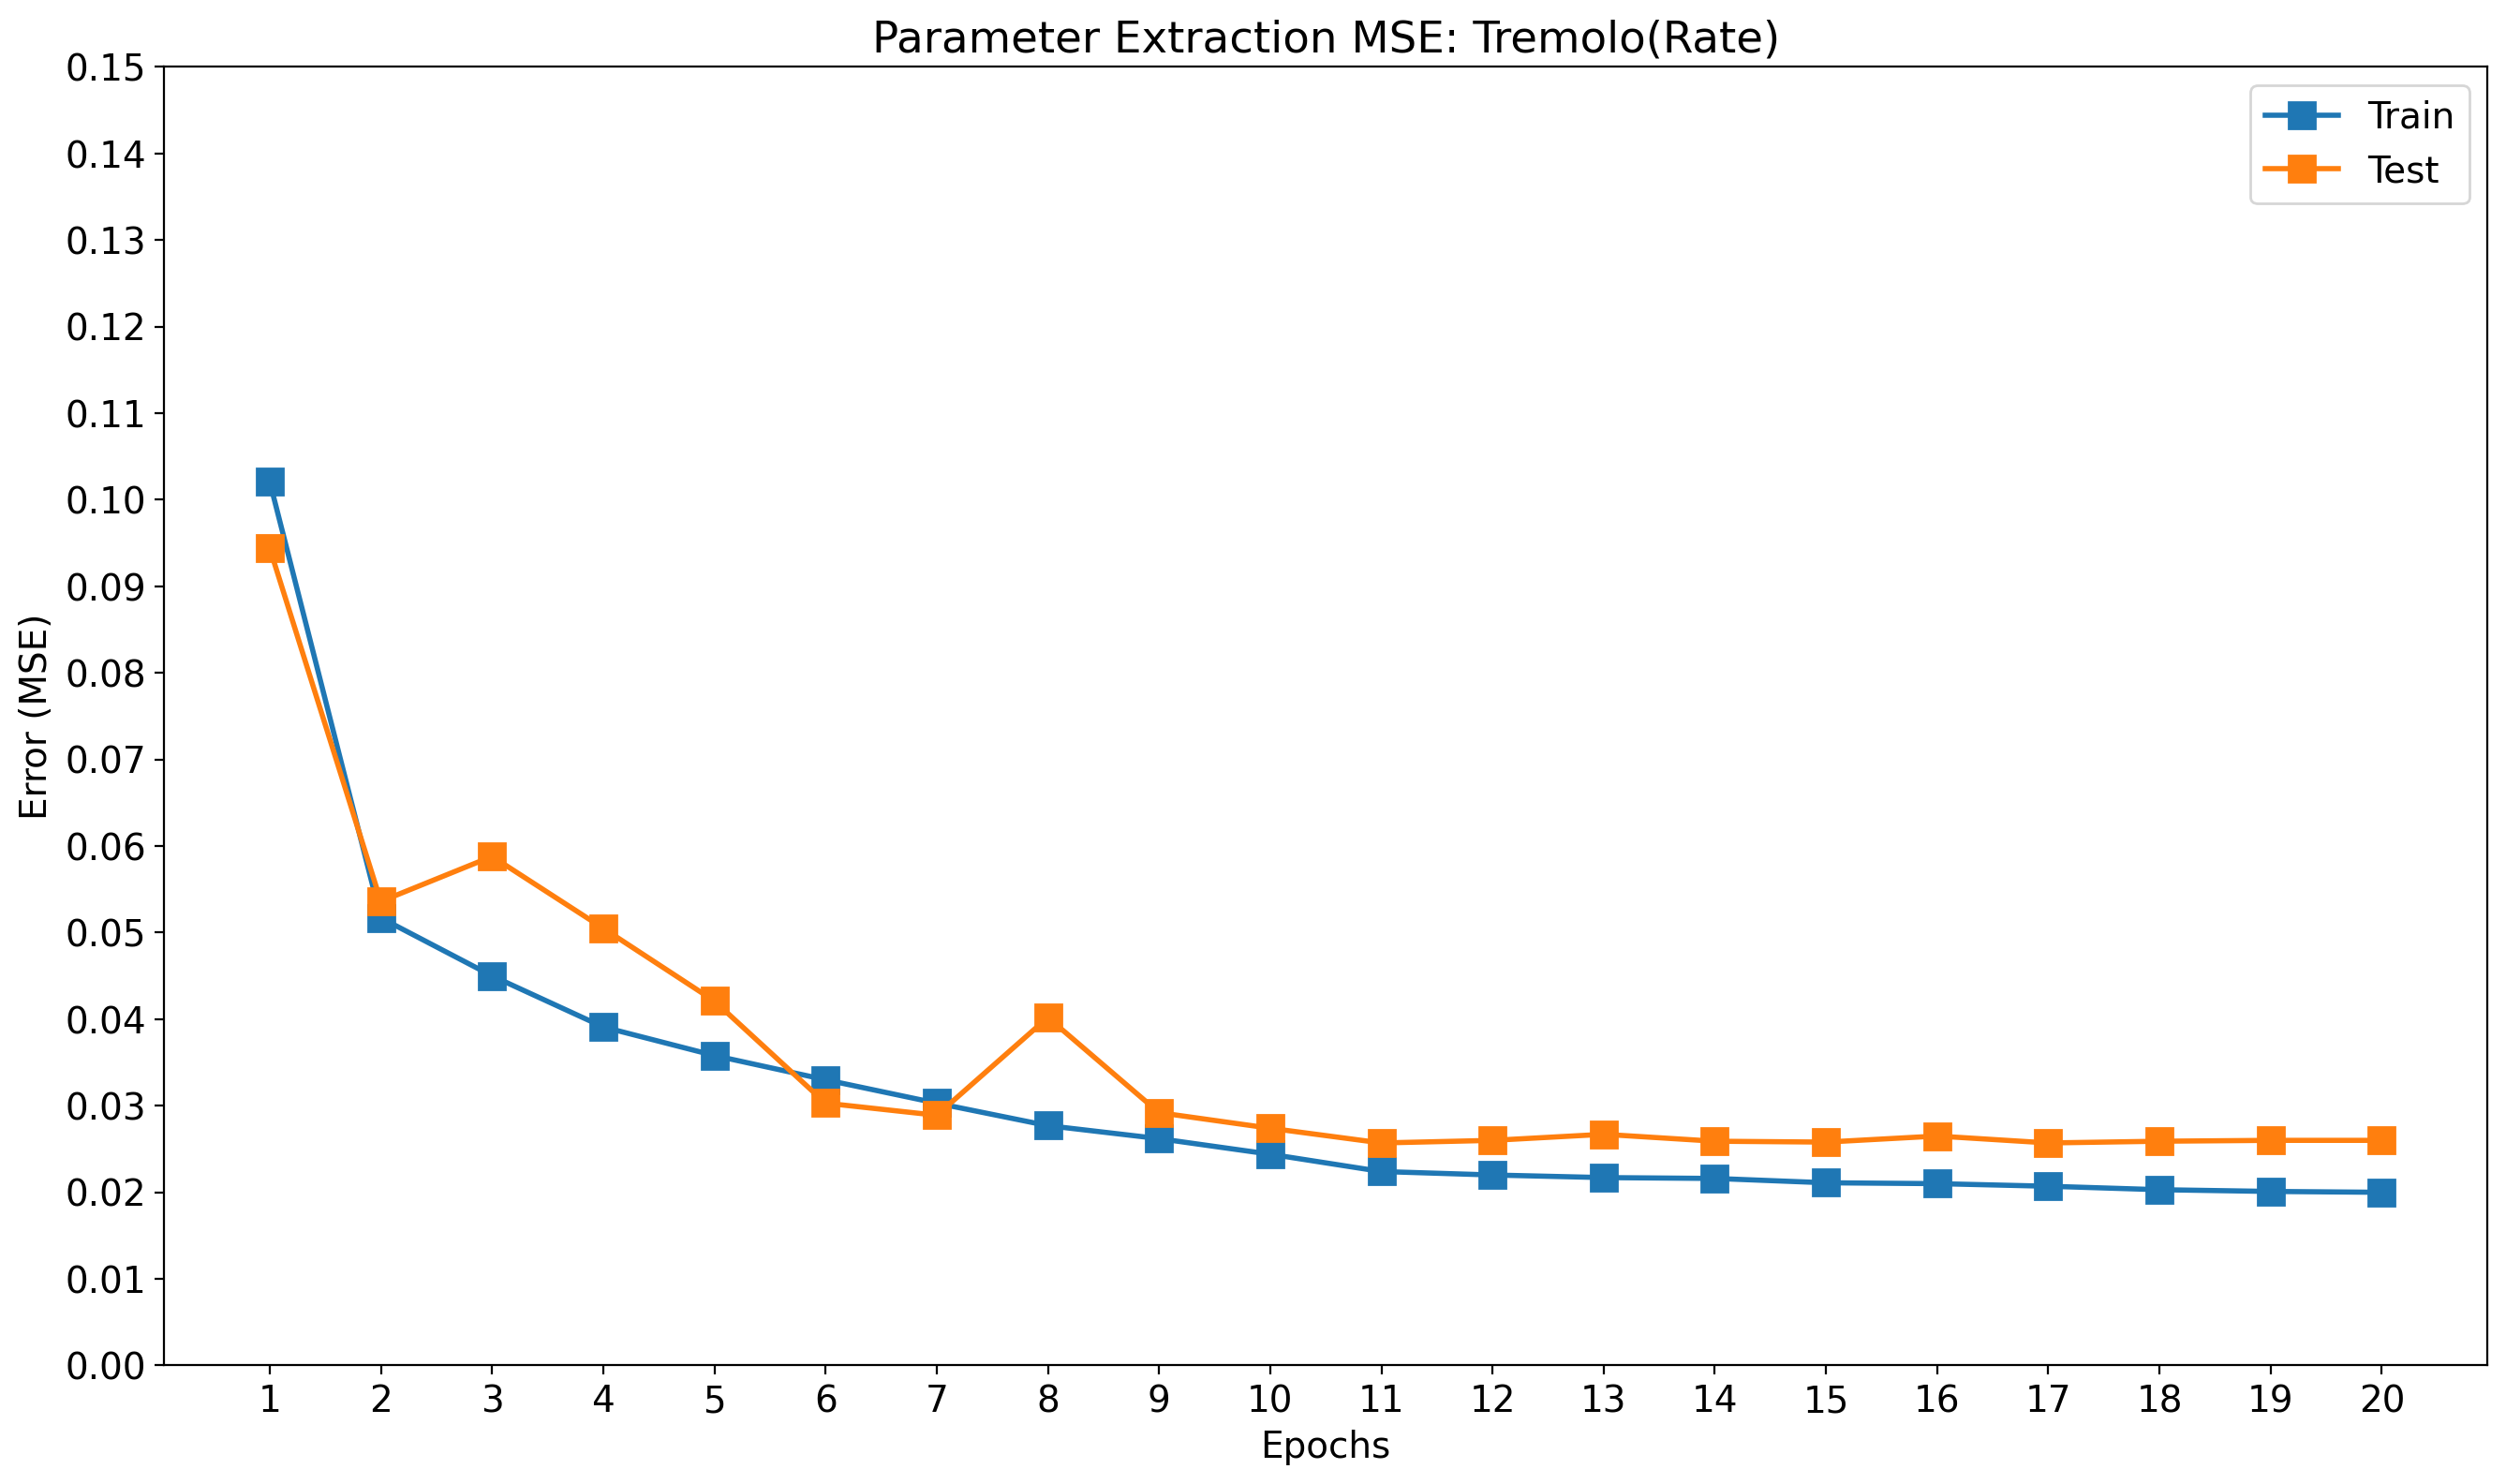

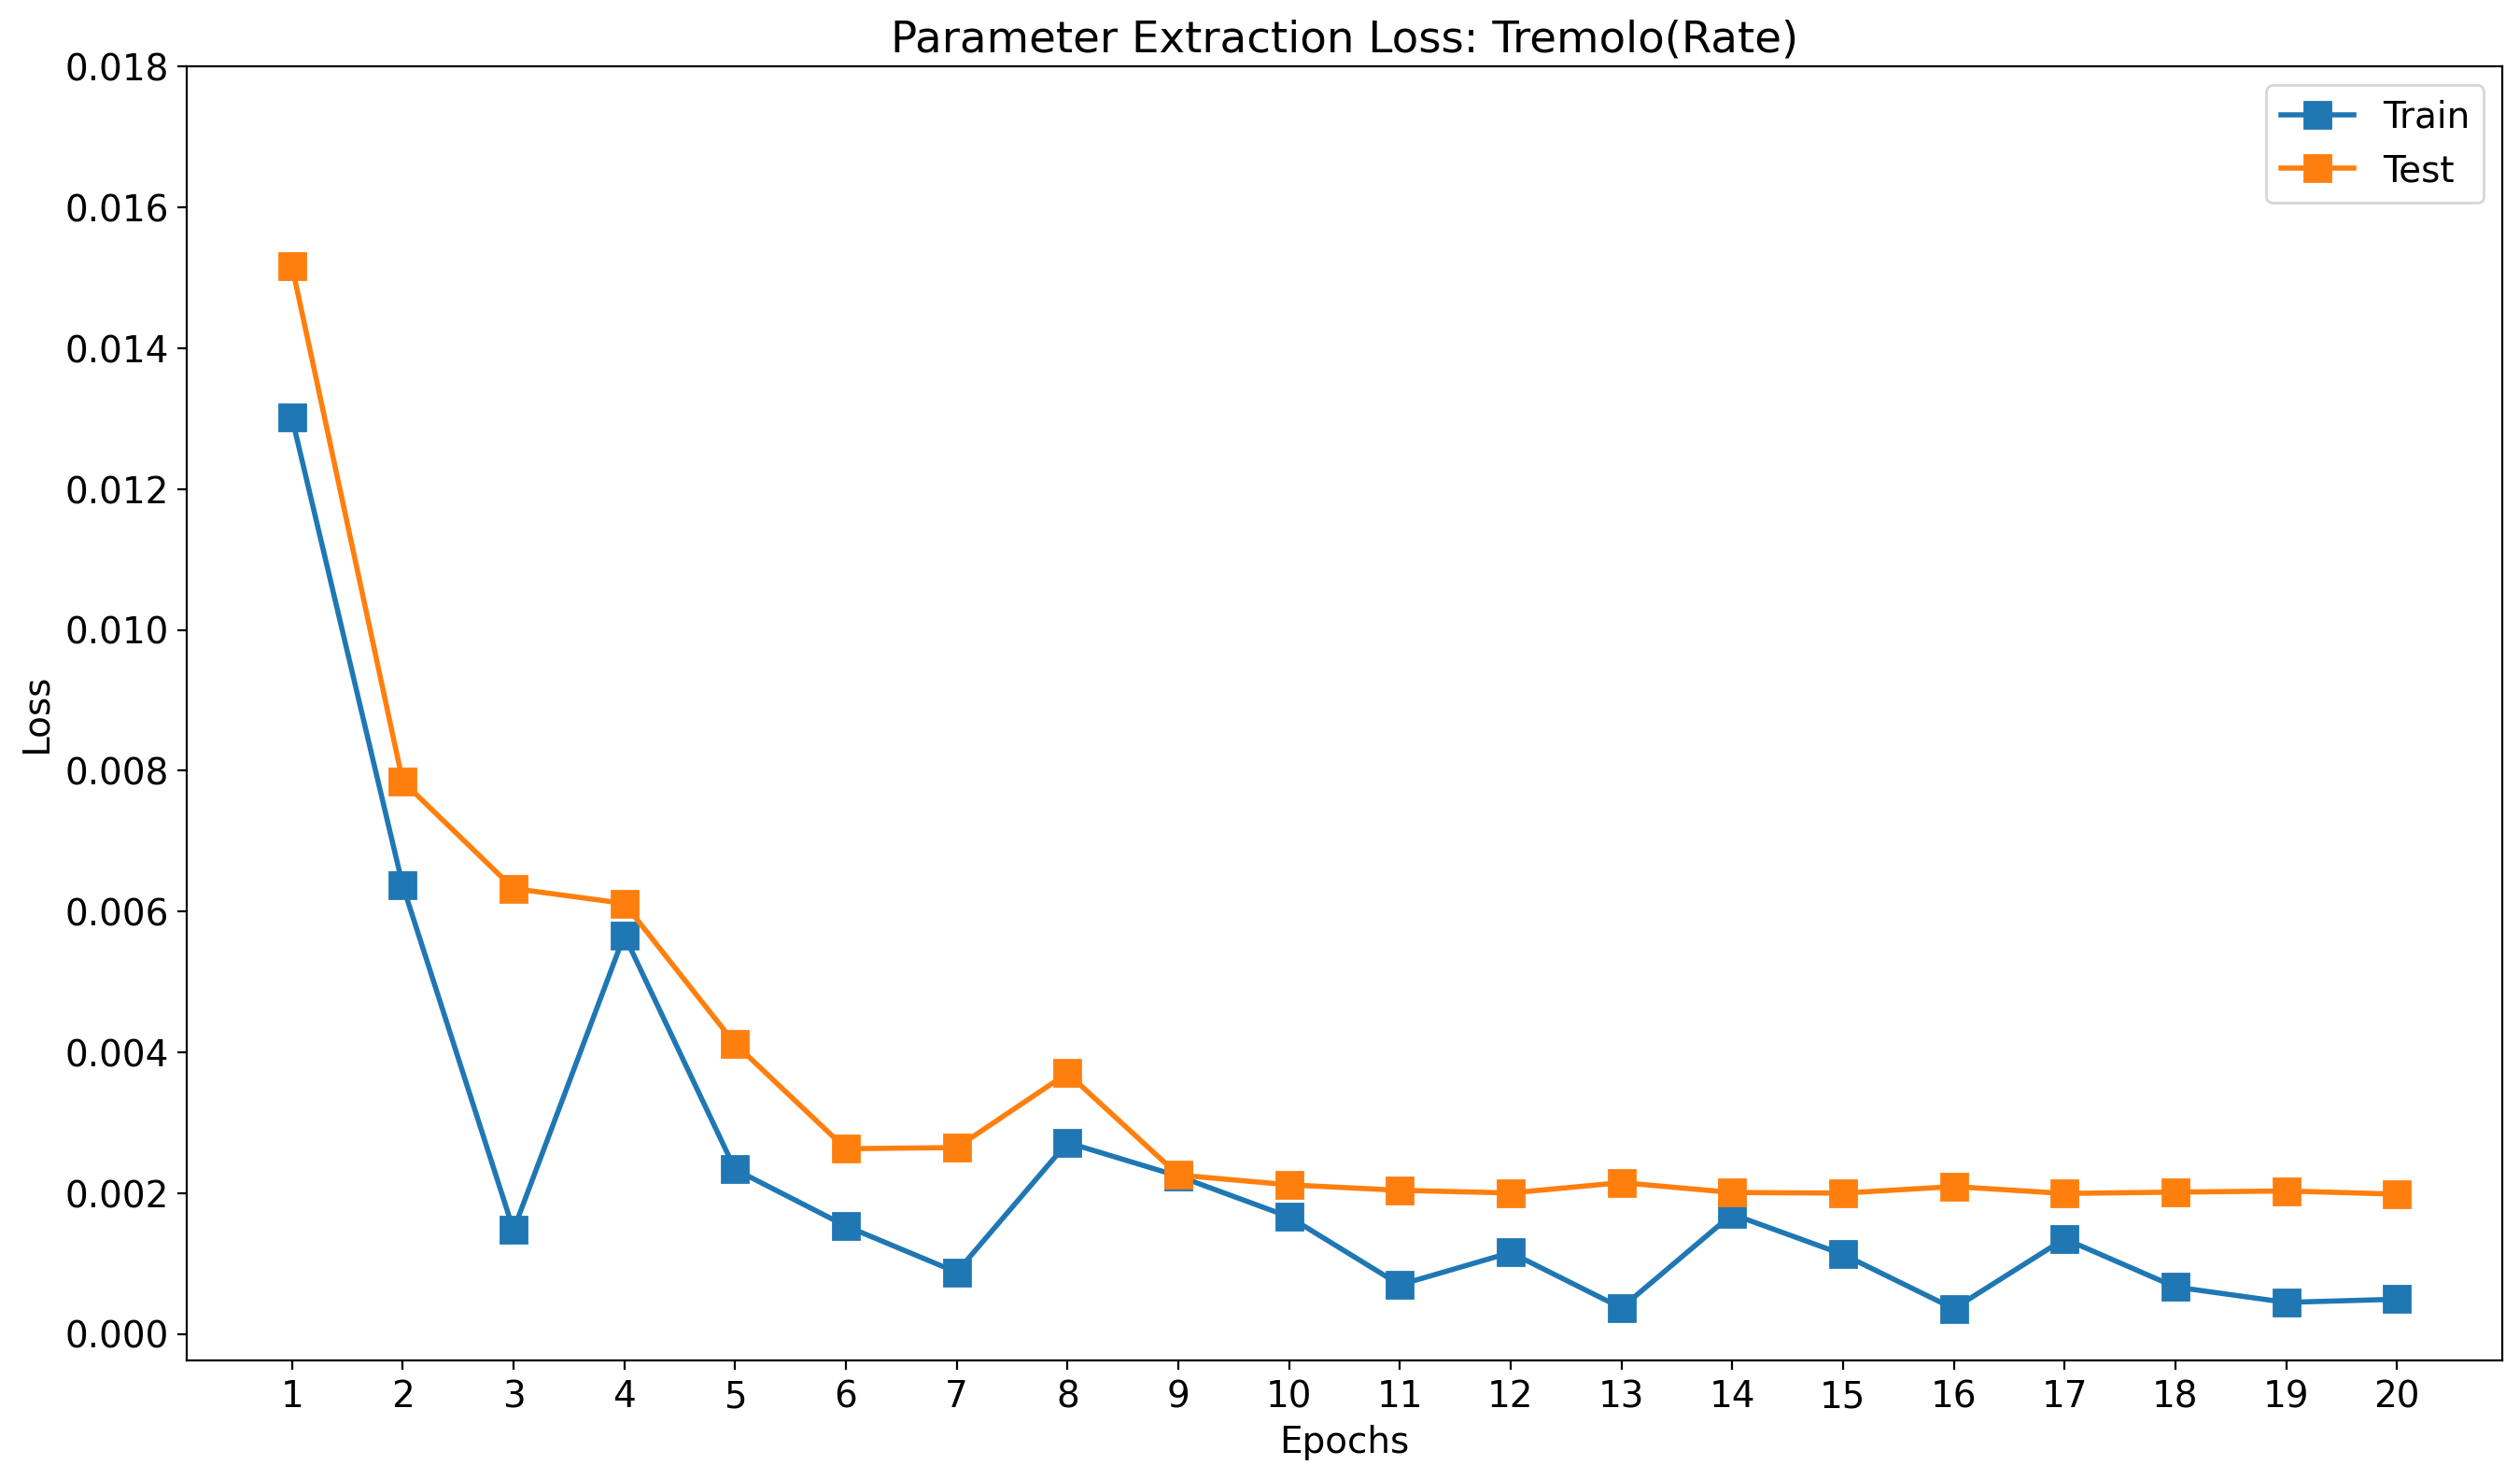

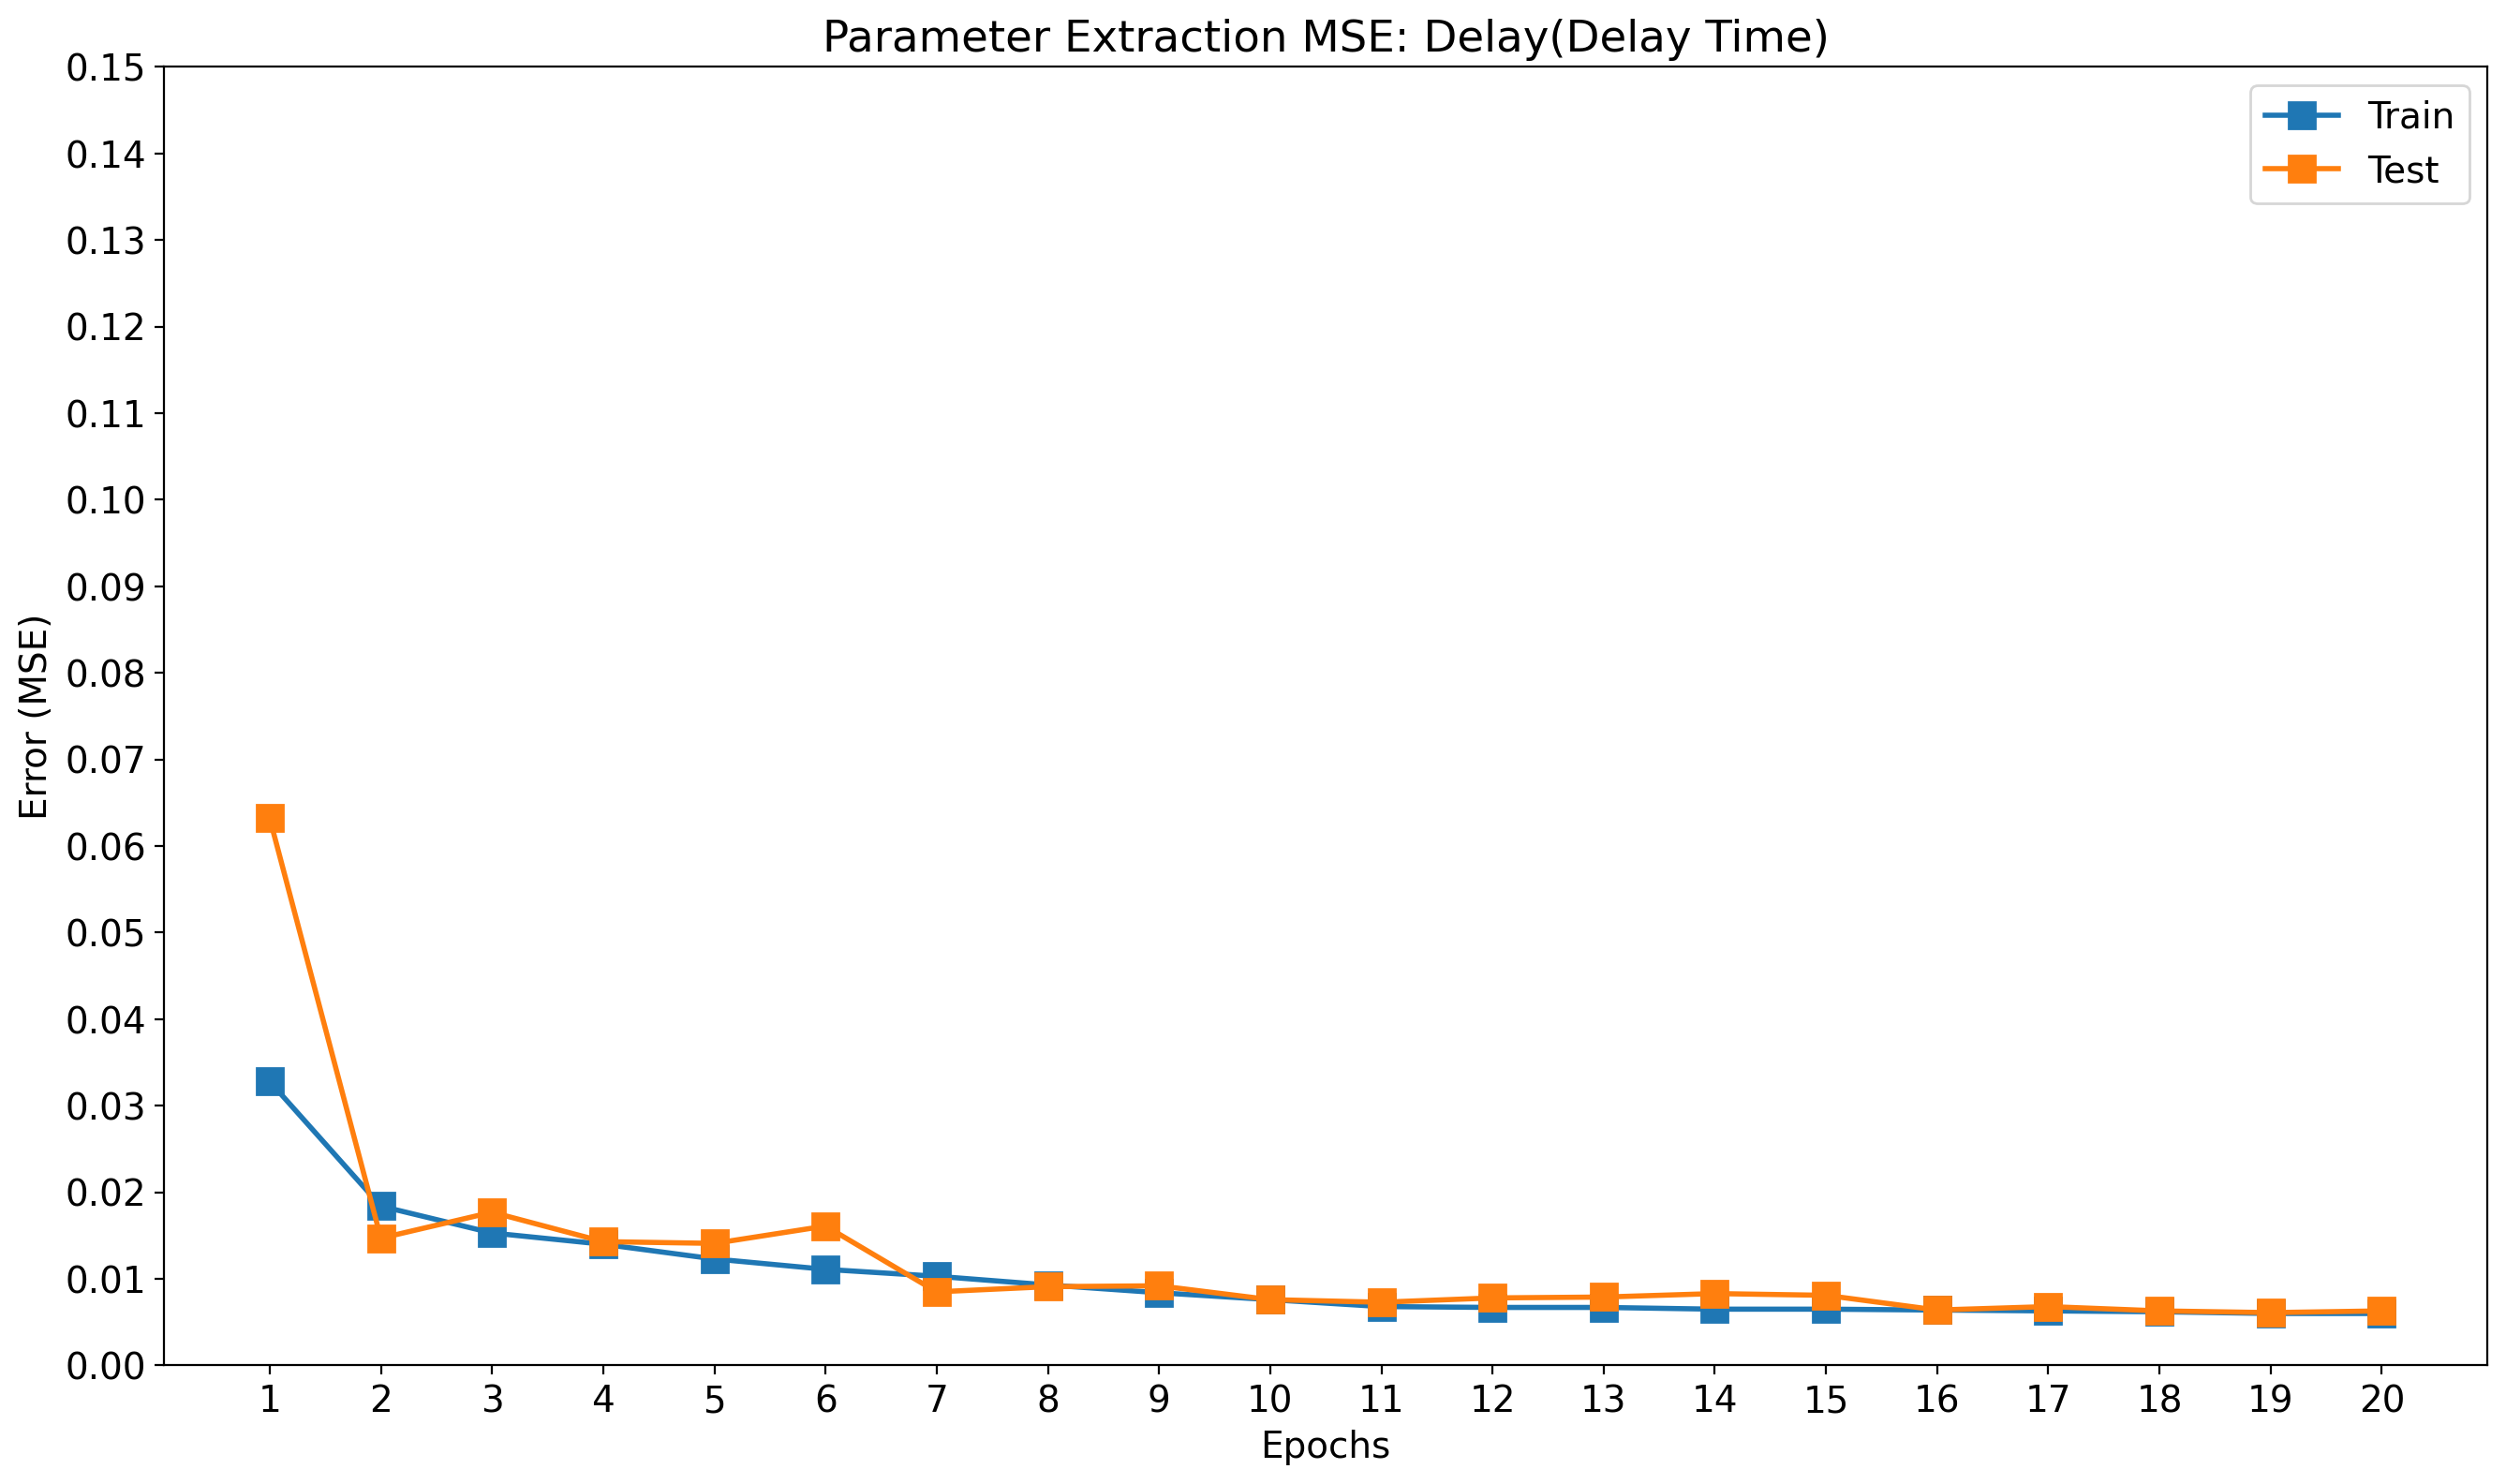

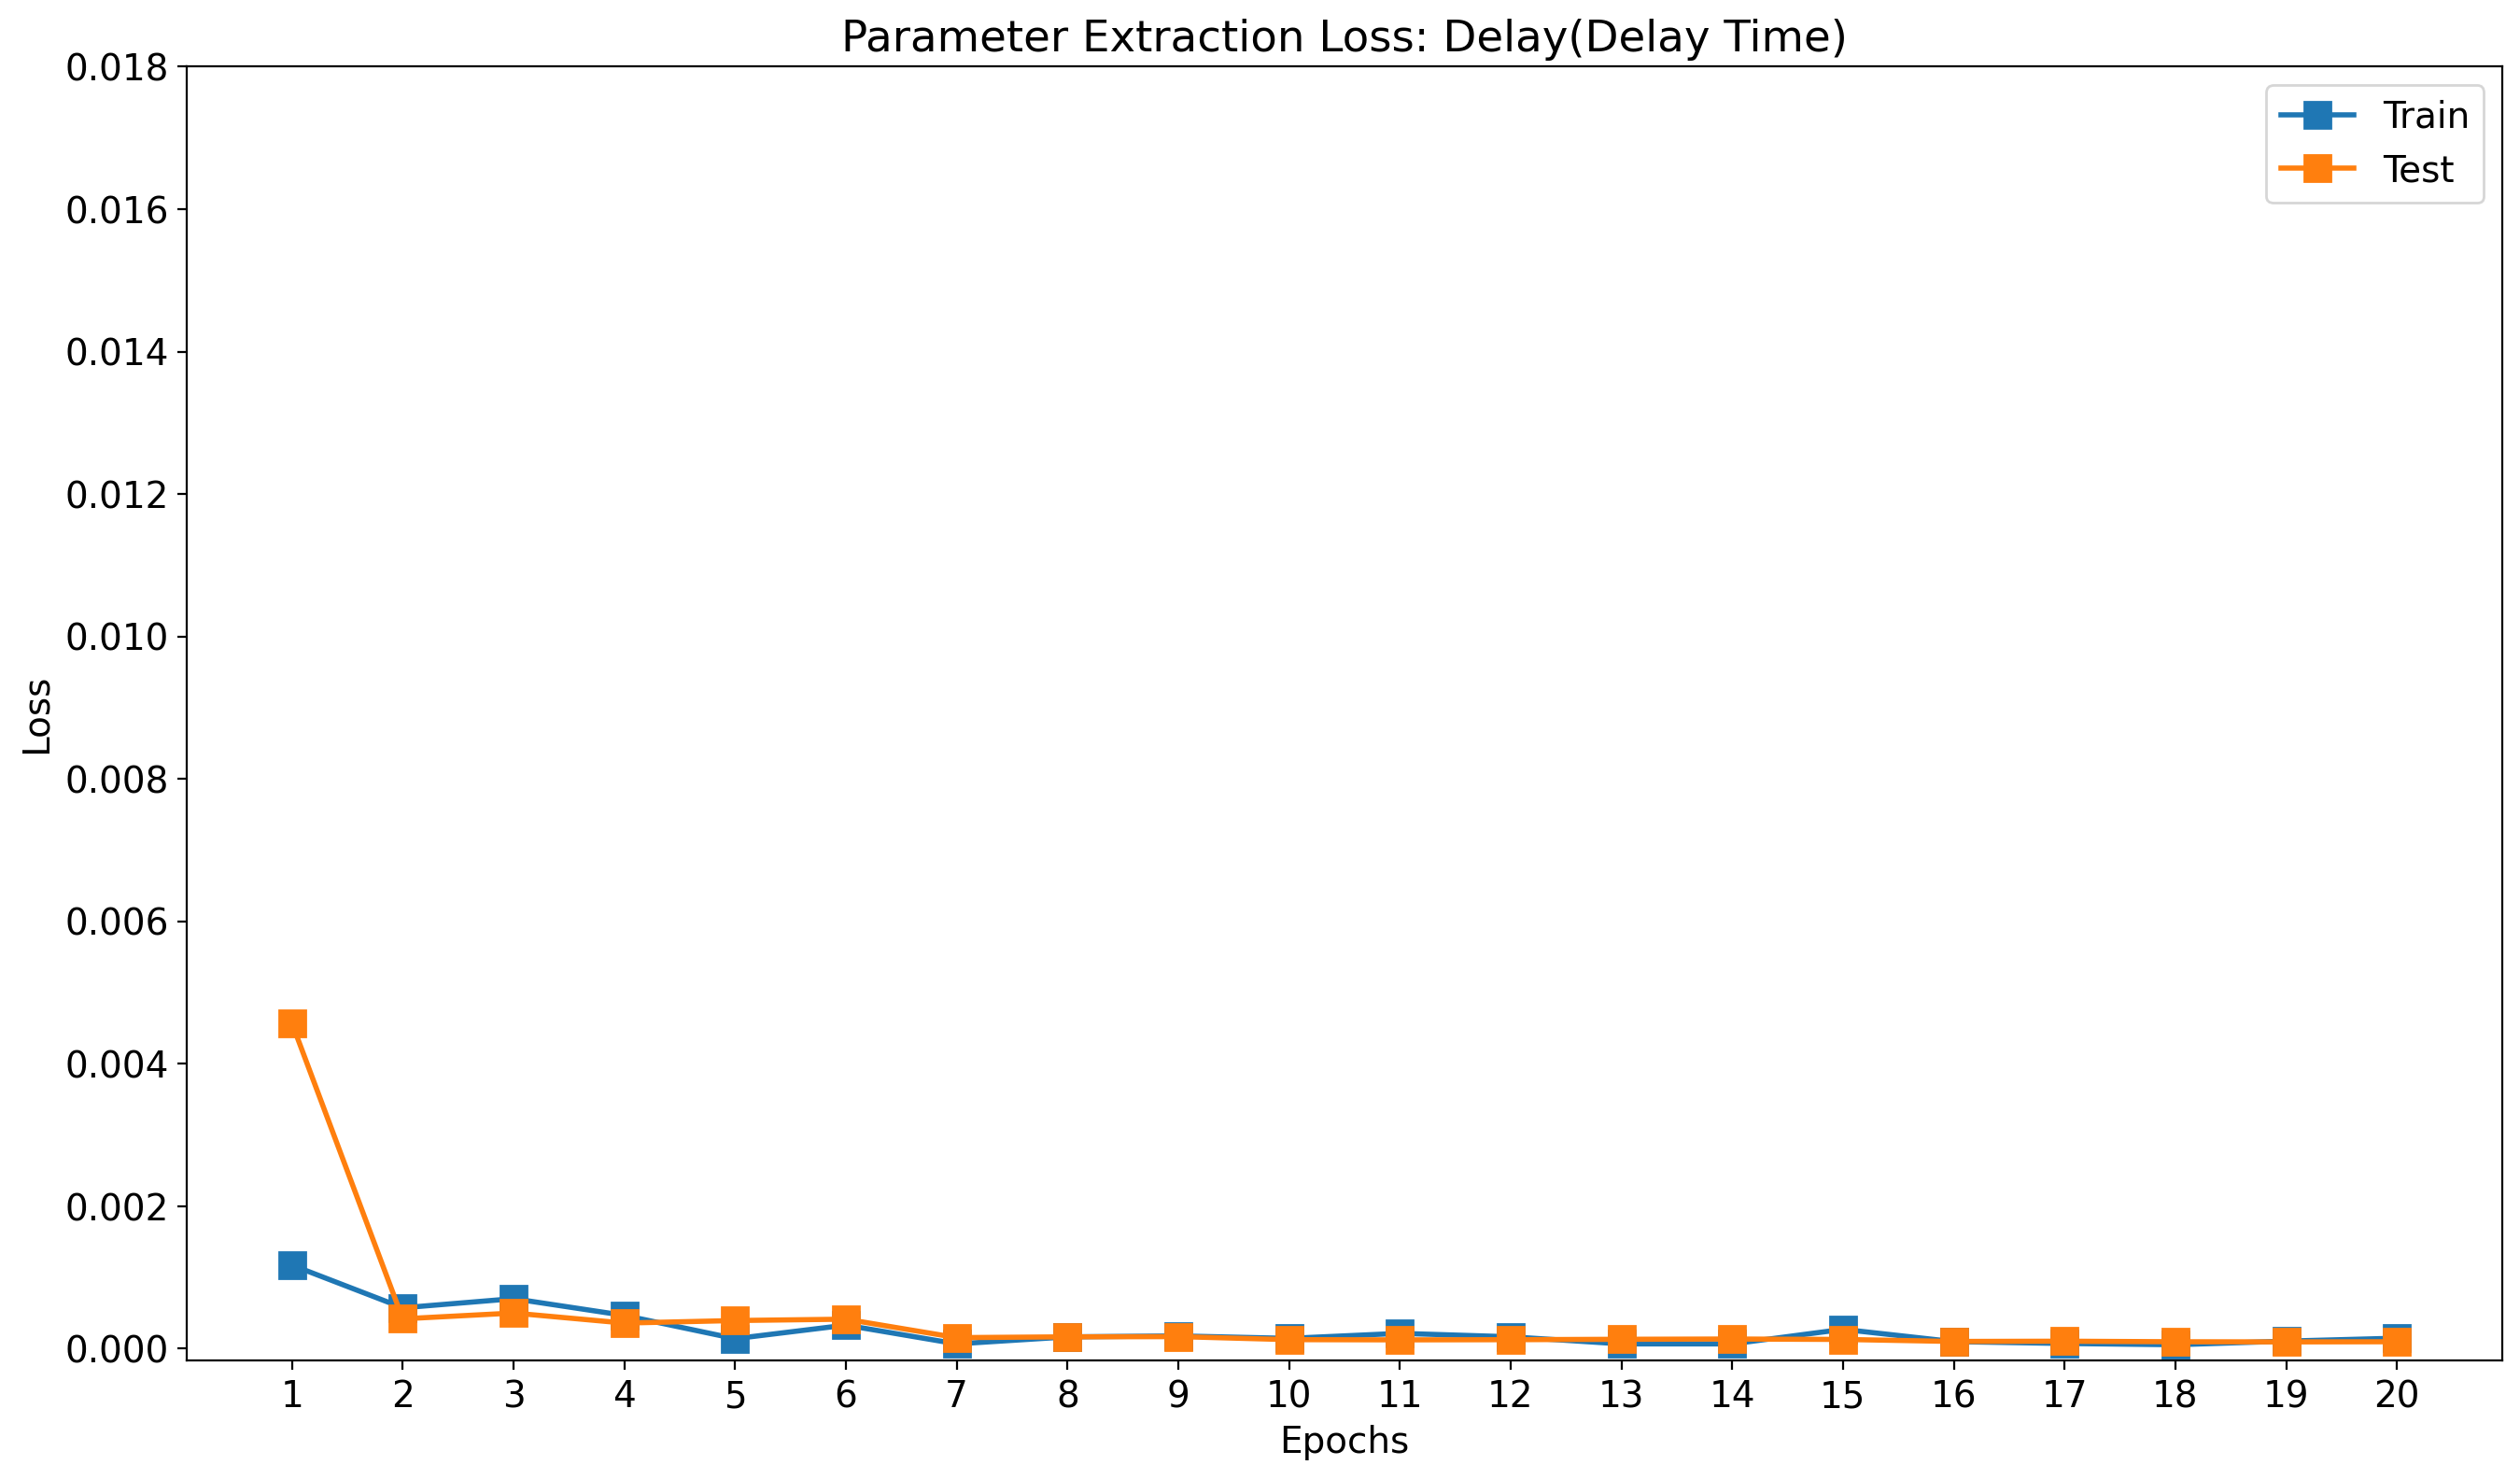

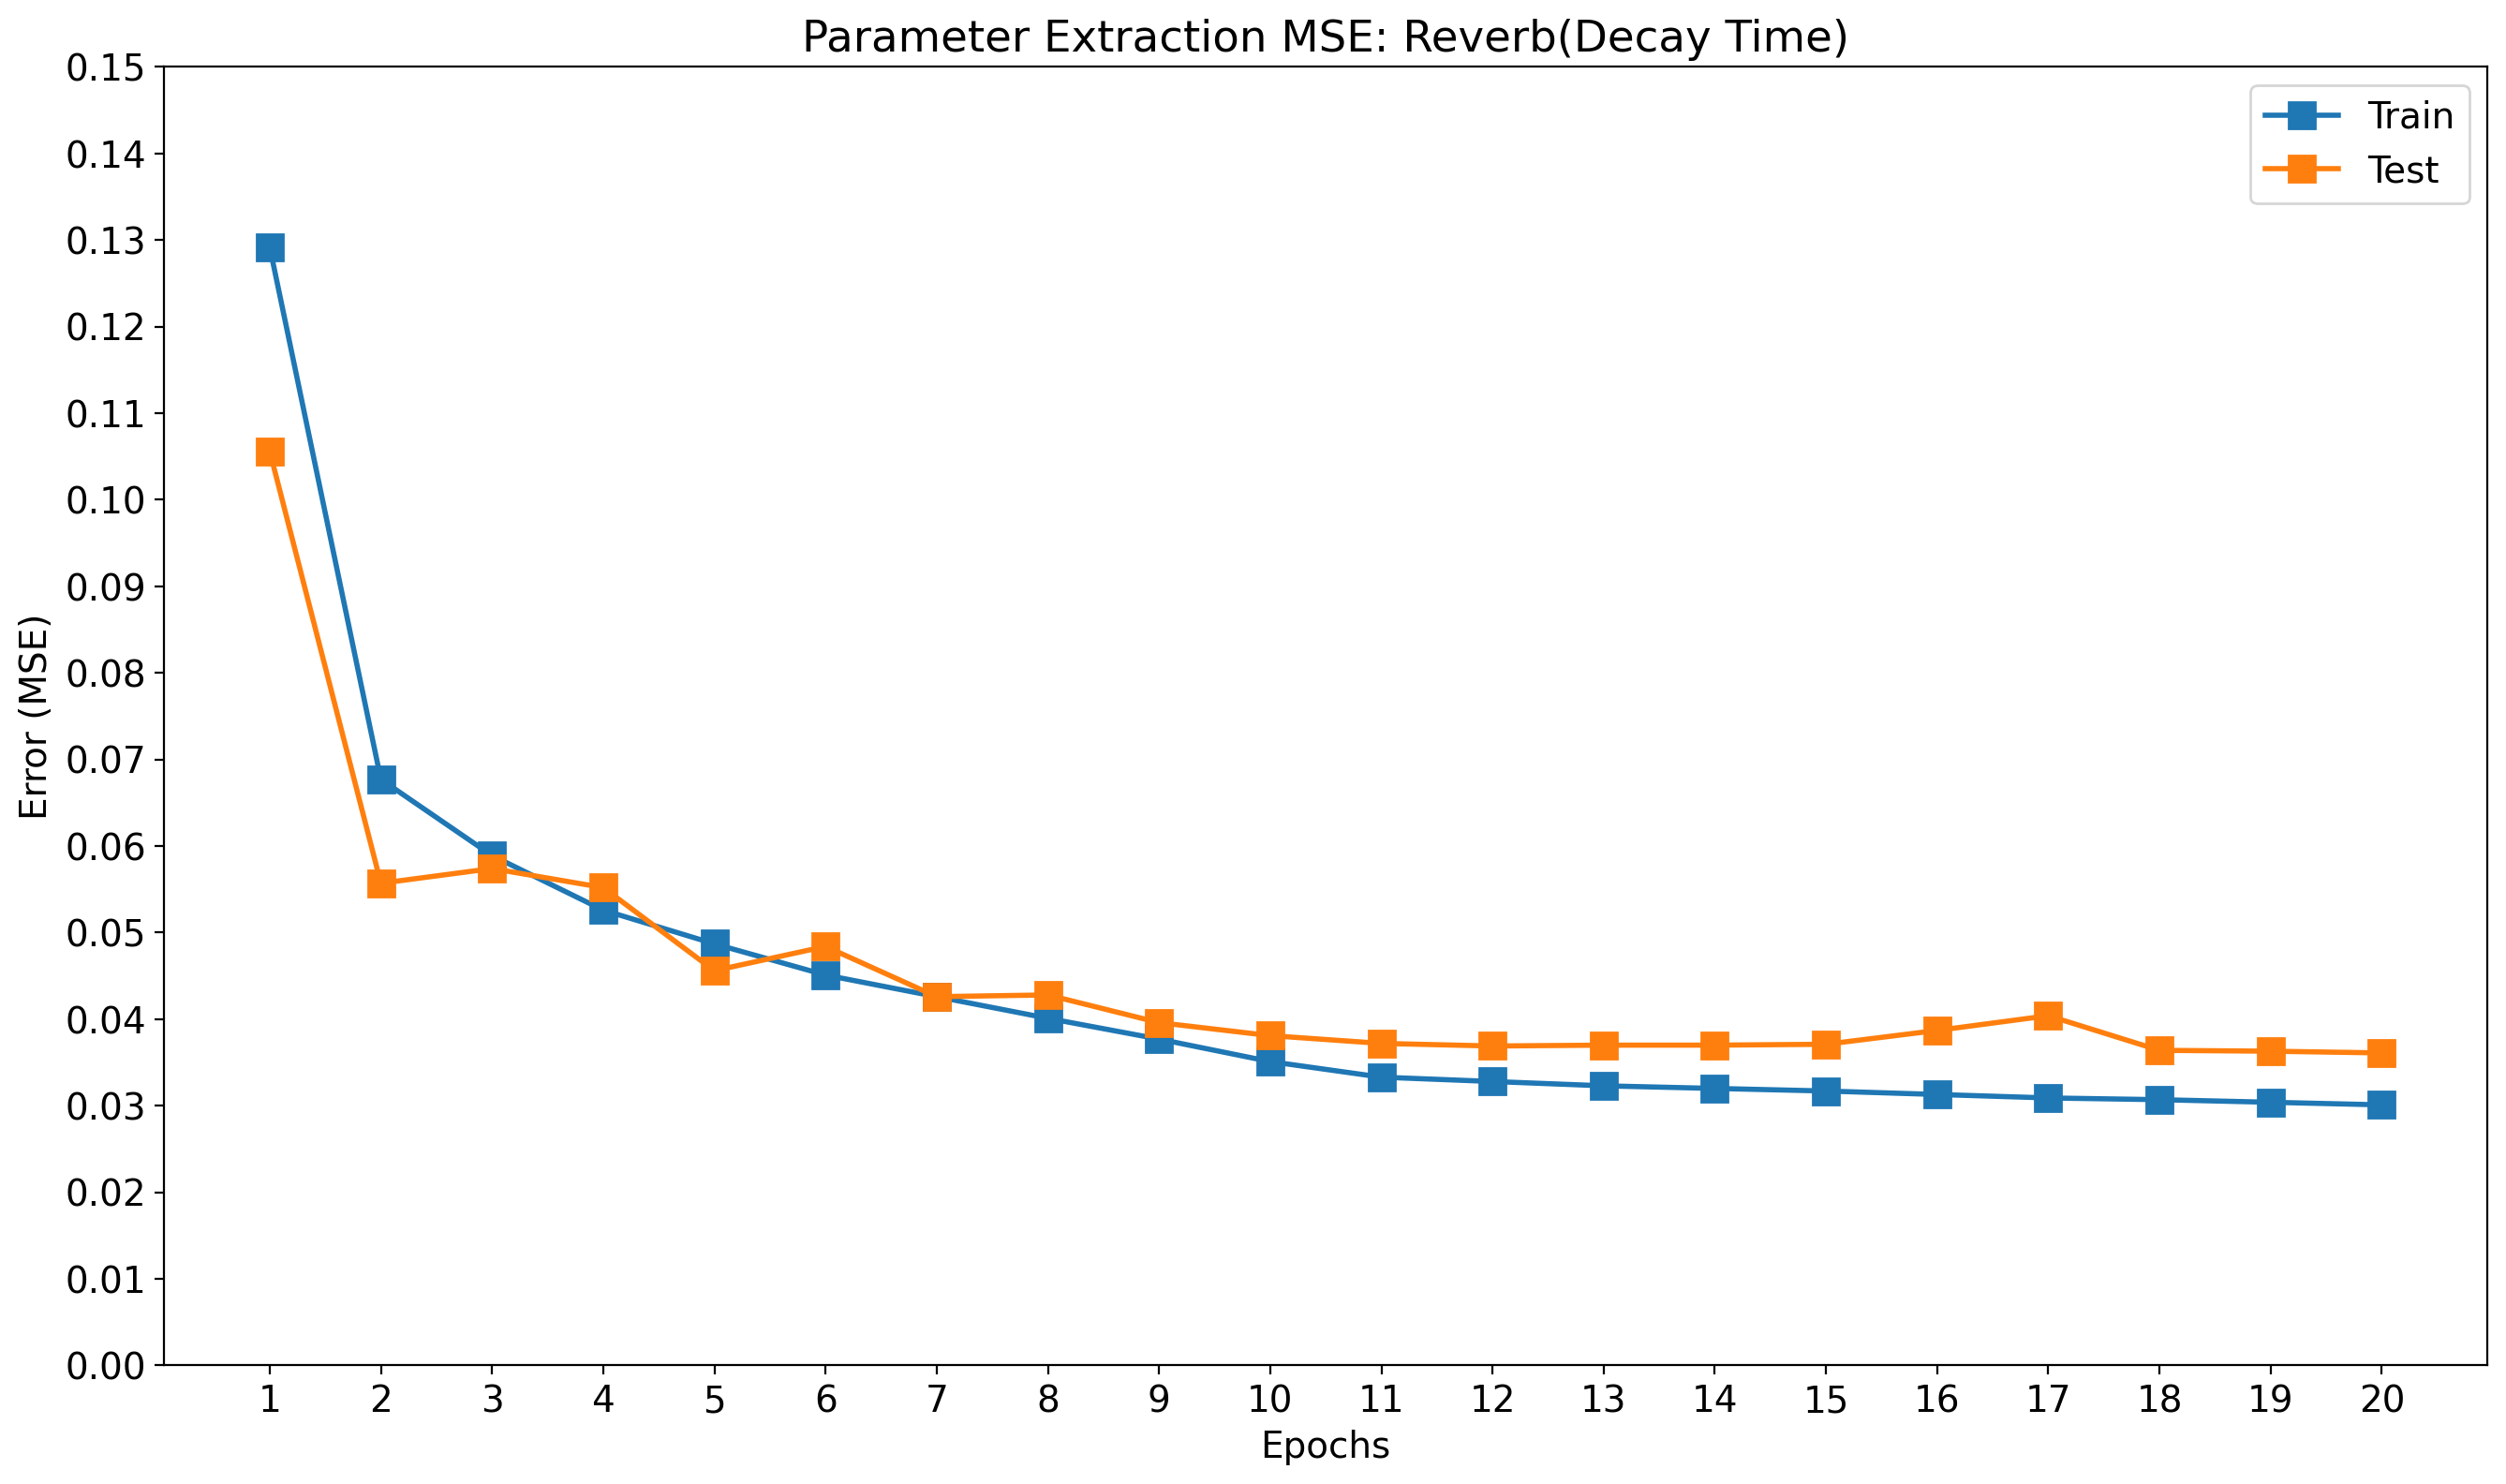

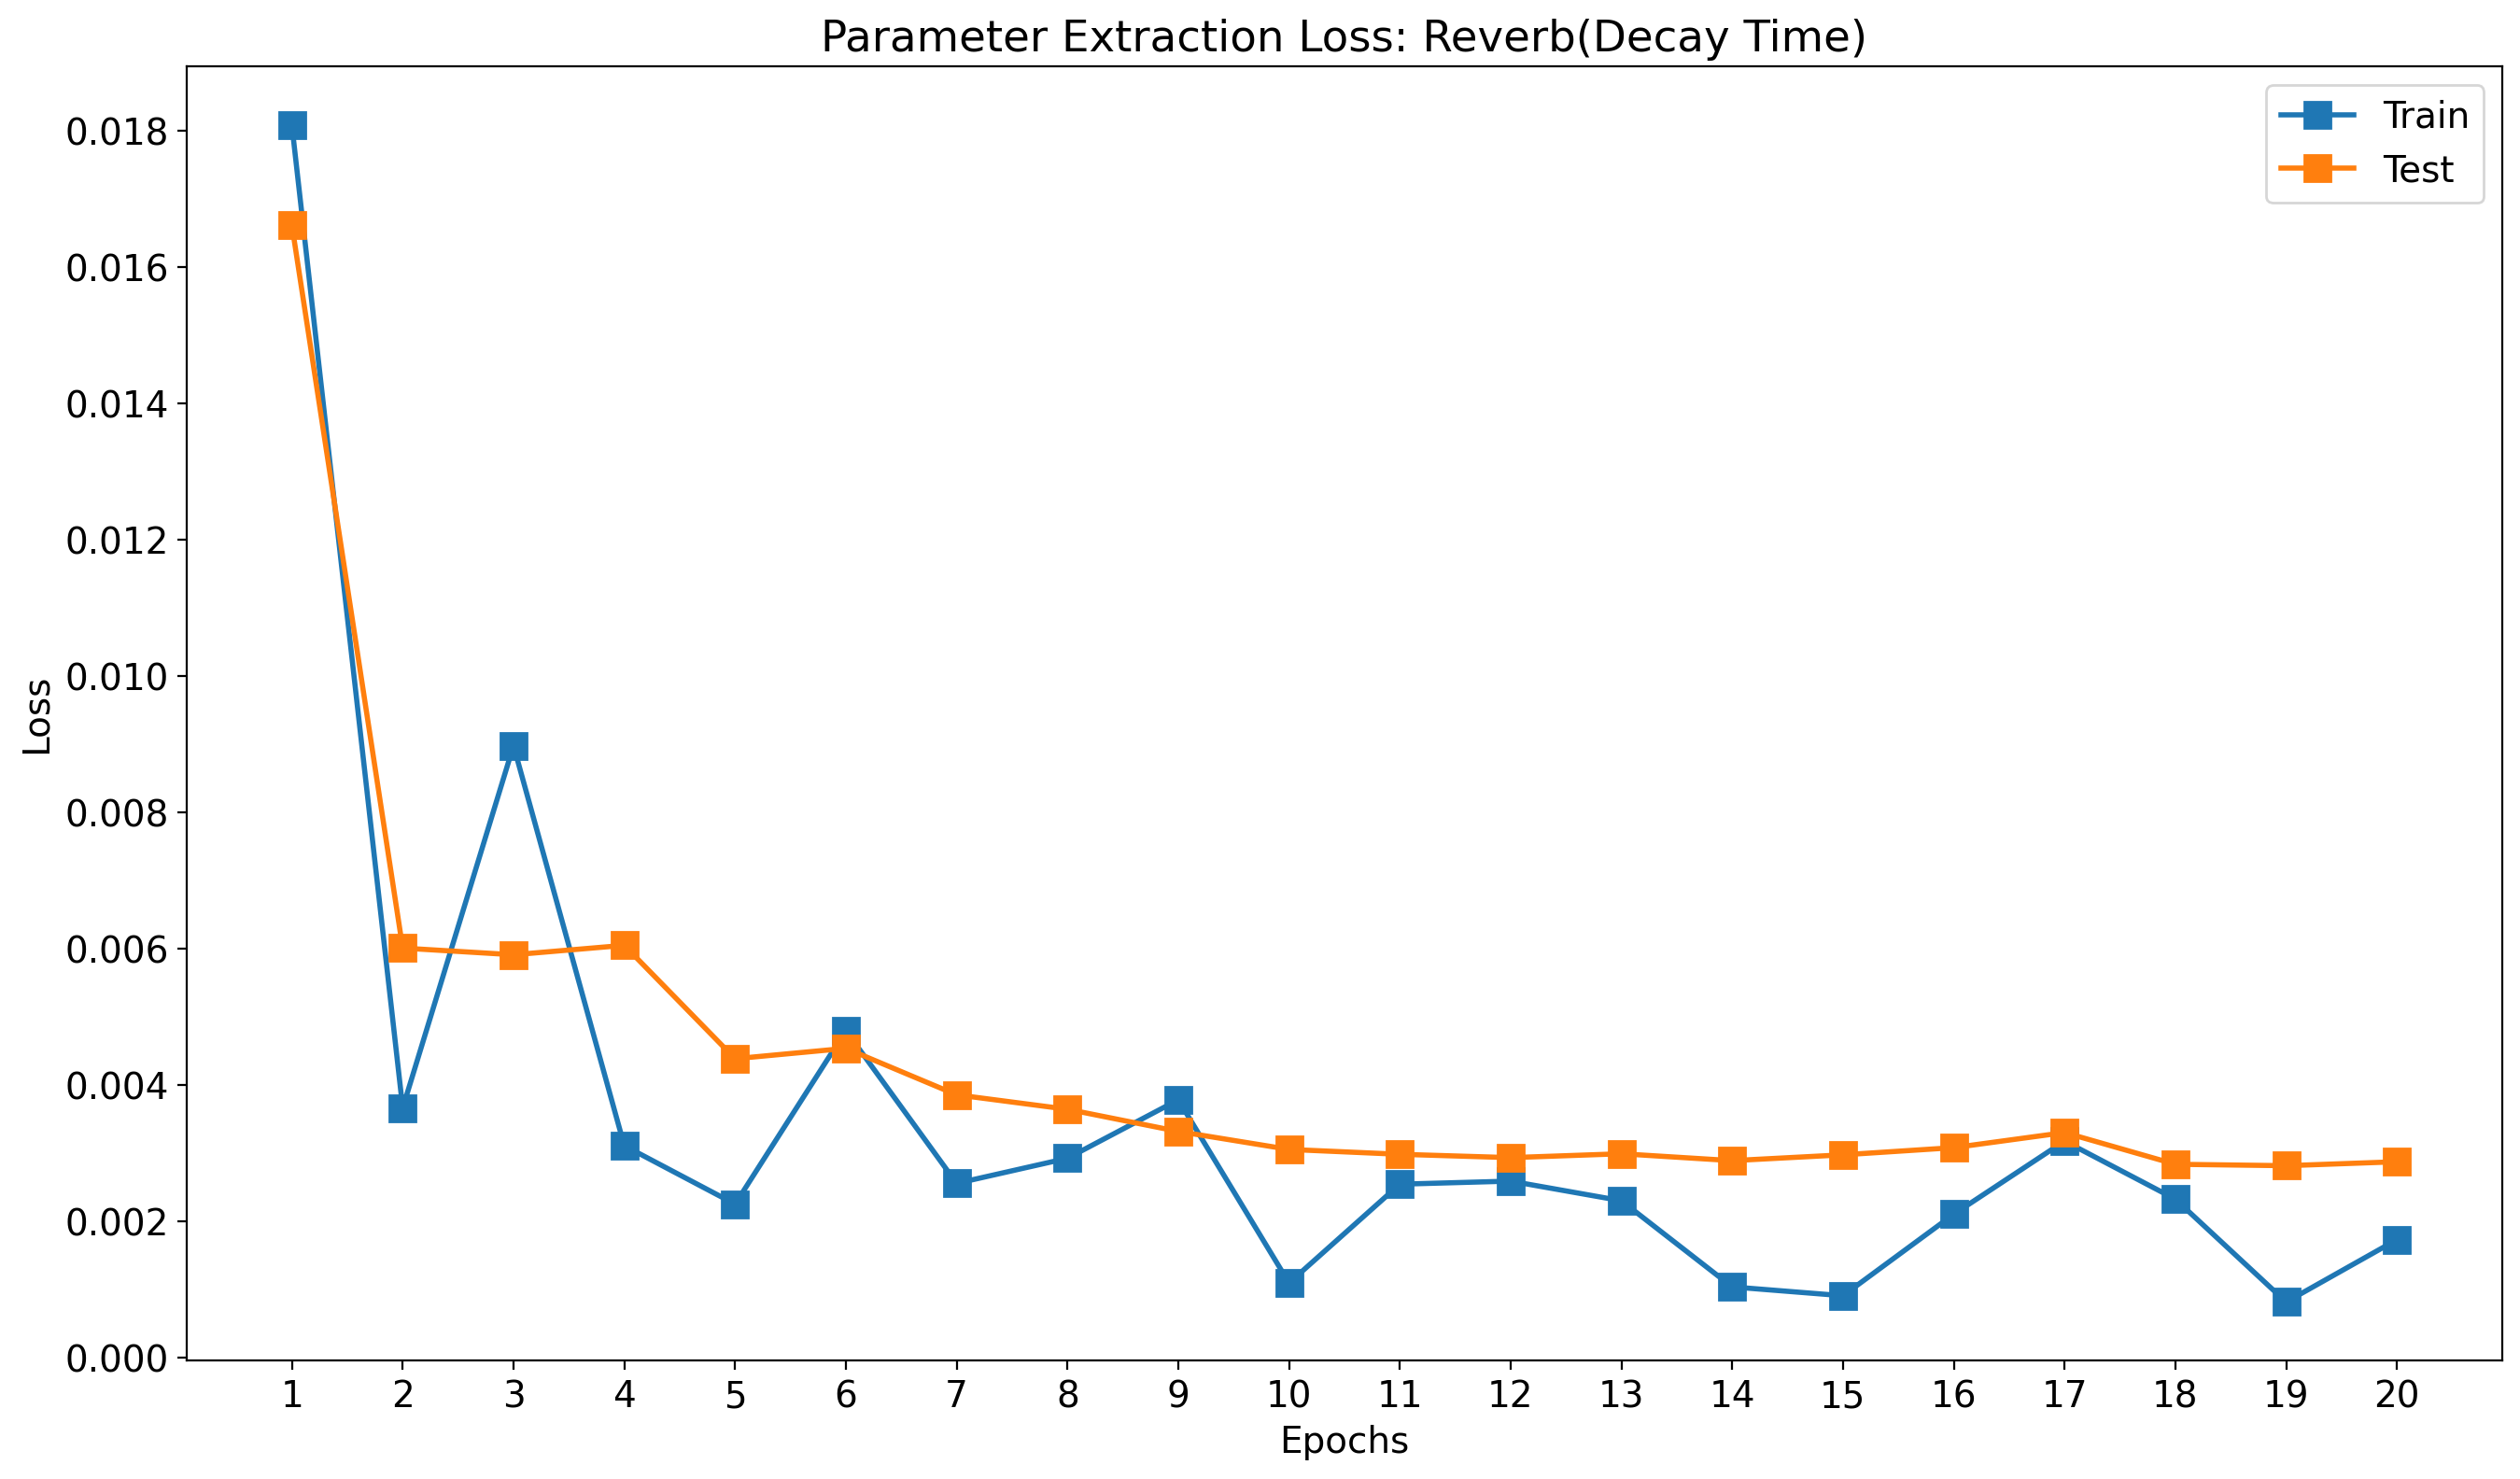

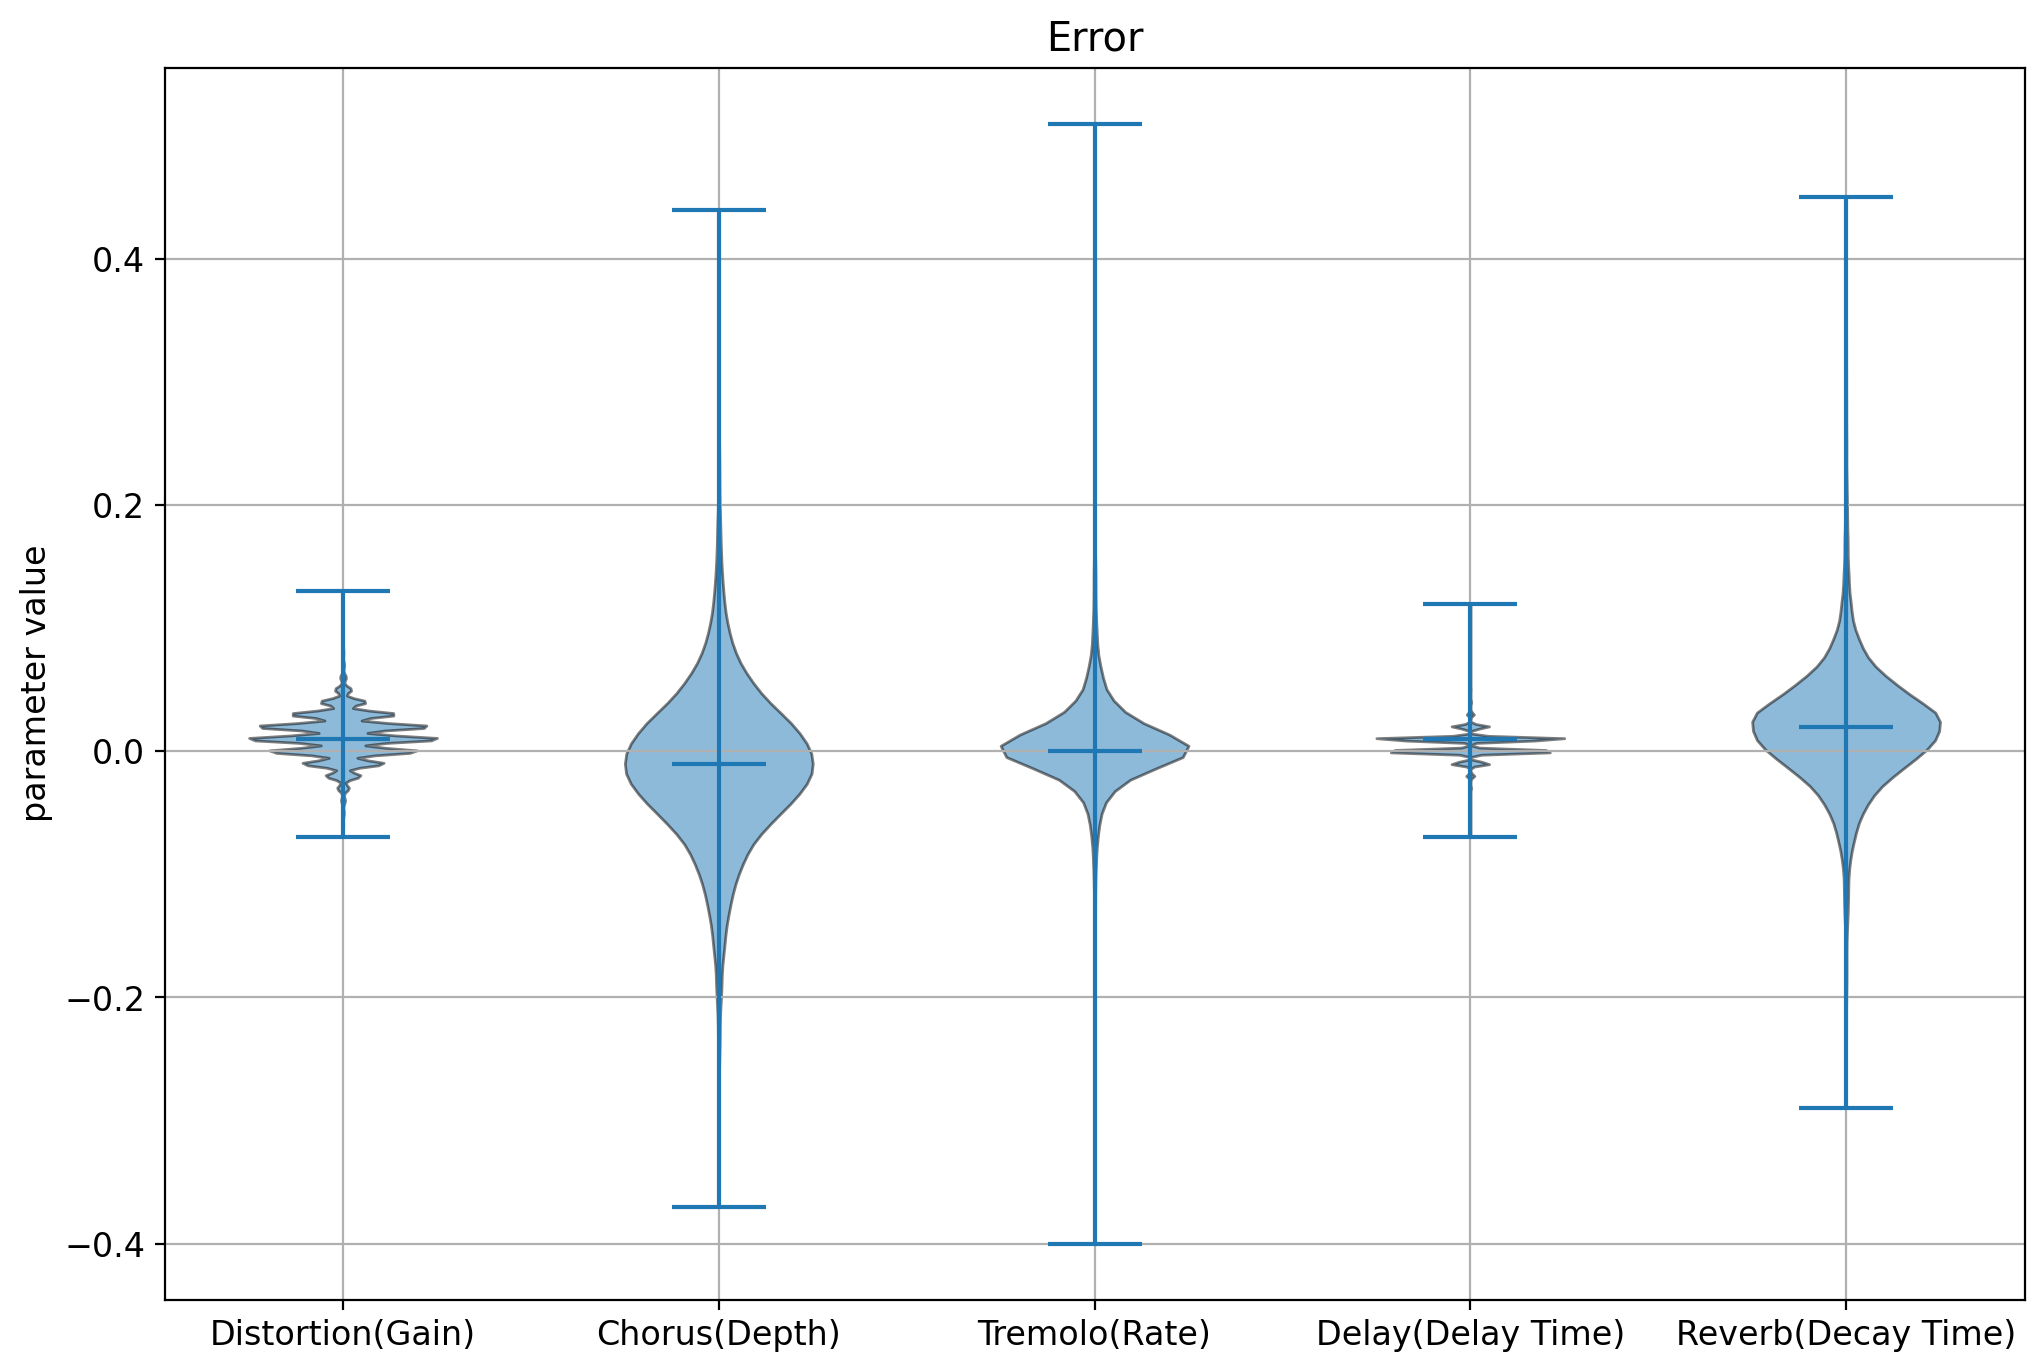

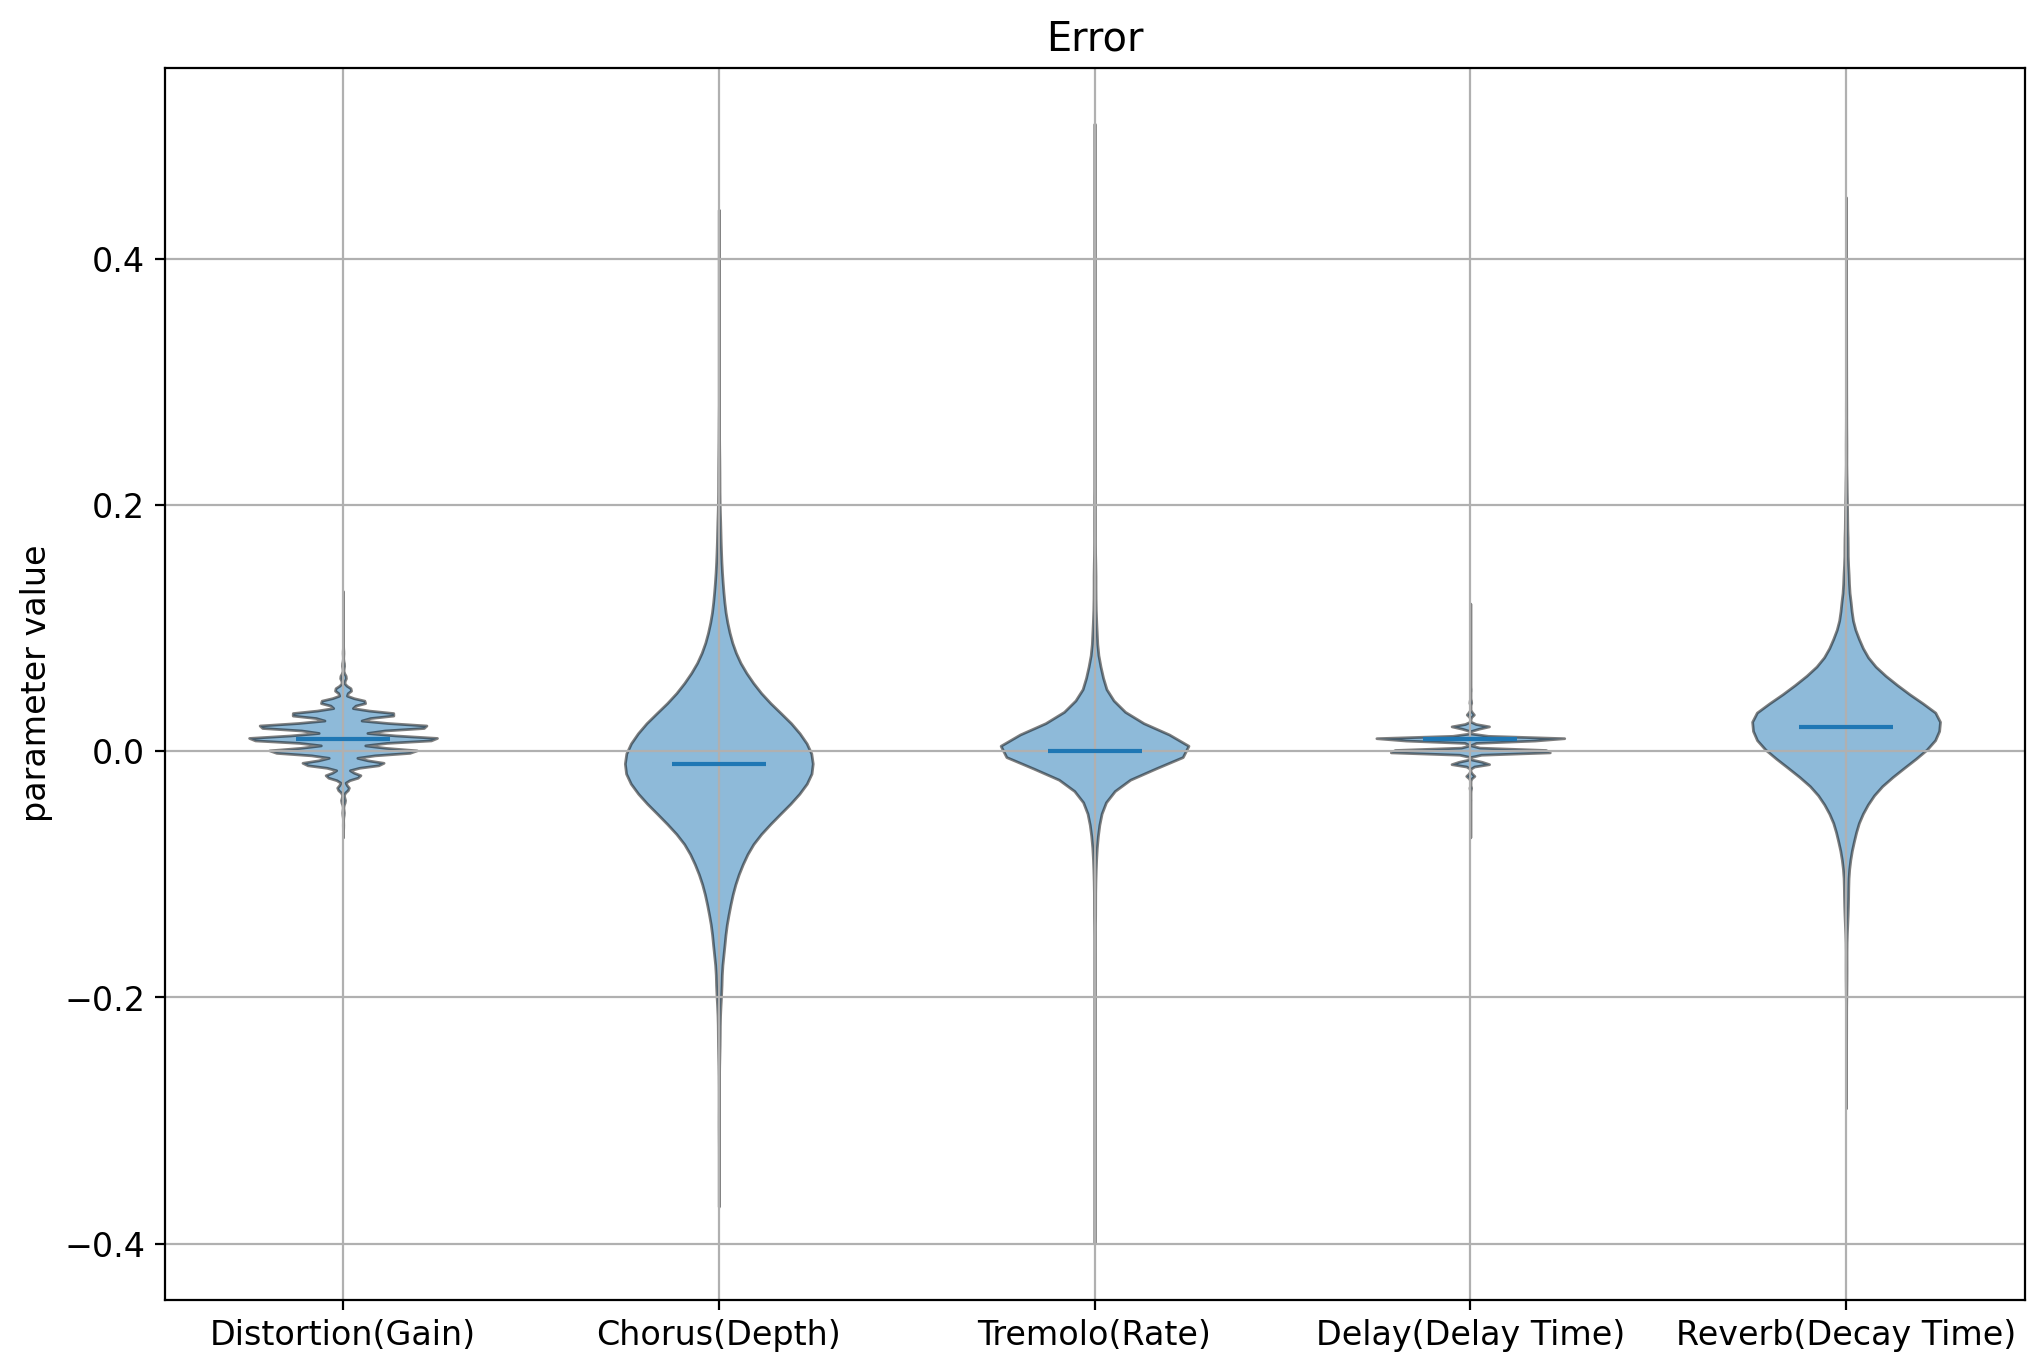

In [4]:
TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/c53_parameter/'

EFFECT_MAP = ["Distortion(Gain)", "Chorus(Depth)", "Tremolo(Rate)", "Delay(Delay Time)", "Reverb(Decay Time)"]

error_list = []

for i in range(5):

    mse, loss = load_train_data_error(TRAIN_DIR + 'c53_parameter/' + str(i) + '_')
    error = np.load(EVUAL_DIR + 'c53_parameter_' + str(i) + '_evaluation.npy')

    mse_fig = plot_train_line(data=mse,
                    num_subplot=1,
                    subtitle="Parameter Extraction MSE: " + EFFECT_MAP[i],
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Error (MSE)',
                    x_ticks=np.arange(1, 21, 1), 
                    y_ticks=np.arange(0, 0.16, 0.01),
                    hight=9, 
                    width=16)

    loss_fig = plot_train_line(data=loss,
                    num_subplot=1,
                    subtitle="Parameter Extraction Loss: " + EFFECT_MAP[i],
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Loss',
                    x_ticks=np.arange(1, 21, 1), 
                    y_ticks=np.arange(0, 0.02, 0.002),
                    hight=9, 
                    width=16)
    
    mse_fig.savefig(PLOT_DIR + 'parameter_mse_' + EFFECT_MAP[i] + '.png')
    loss_fig.savefig(PLOT_DIR + 'parameter_loss_' + EFFECT_MAP[i] + '.png')
    
    error_list.append(error)

box = plot_violin(error_list, title="Error", labels=EFFECT_MAP, ylabel="parameter value", outlier=True)
box2 = plot_violin(error_list, title="Error", labels=EFFECT_MAP, ylabel="parameter value", outlier=False)

box.savefig(PLOT_DIR + 'parameter_error_box.png')
box2.savefig(PLOT_DIR + 'parameter_error_box2.png')